In [1]:
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from astropy.io import fits
from lmfit import Model

import os
spec_dir = os.path.abspath("./../spec/") + "/"
plots_dir = os.path.abspath("./../plots/temp") + "/"

import sys
module_path = os.path.abspath("./../../module")
sys.path.append(module_path)
import redh3p as rhp

import warnings
from astropy.utils.exceptions import AstropyWarning
warnings.simplefilter("ignore", category=AstropyWarning)

##################


spec_dat = fits.open("h2_spec_to_fit.fits", ignore_missing_end=True)[0].data
wave_to_fit = fits.open("h2_wave_to_fit.fits", ignore_missing_end=True)[0].data
spec_dat2 = fits.open("h2_spec_to_fit_smoothed.fits", ignore_missing_end=True)[0].data


for i in range(len(spec_dat)):
    a = spec_dat[i][166][0:30]
    b = spec_dat[i][167][0:30]
    c = spec_dat[i][171][0:30]
    d = spec_dat[i][172][0:30]
    f = np.median((a, b, c, d), axis=0)
    spec_dat[i][168][0:30] = f * 1
    spec_dat[i][169][0:30] = f * 1
    spec_dat[i][170][0:30] = f * 1

spec_dat[:,:,48:50] = 0 

for i in range(len(spec_dat2)):
    a = spec_dat2[i][166][0:30]
    b = spec_dat2[i][167][0:30]
    c = spec_dat2[i][171][0:30]
    d = spec_dat2[i][172][0:30]
    f = np.median((a, b, c, d), axis=0)
    spec_dat2[i][168][0:30] = f * 1
    spec_dat2[i][169][0:30] = f * 1
    spec_dat2[i][170][0:30] = f * 1

# spec_dat2[:,:,48:50] = 0 

# for j in range(16,38):
#     spec_dat2.append(scipy.ndimage.shift(spec_dat[j], -10, order=0))
# spec_dat_new = np.array(spec_dat2)

# spec_dat_new = np.roll(spec_dat[16:], -1, axis=2)
# spec_dat2 = np.vstack((spec_dat[:16], spec_dat_new))

Text(0.5, 1.0, 'i = 30')

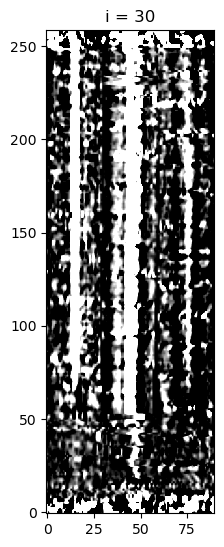

In [2]:
i = 30

fig = plt.figure(figsize=(6, 12), tight_layout=True)

fig.add_subplot(131)
plt.imshow(spec_dat2[i],
           # extent=[waverange36[0],waverange36[1001],30,240],
           aspect="equal",
           cmap="gist_gray",
           norm=colors.PowerNorm(gamma=1, vmin=0, vmax=0.00005), 
           origin="lower",
          )
plt.title('i = '+str(i))

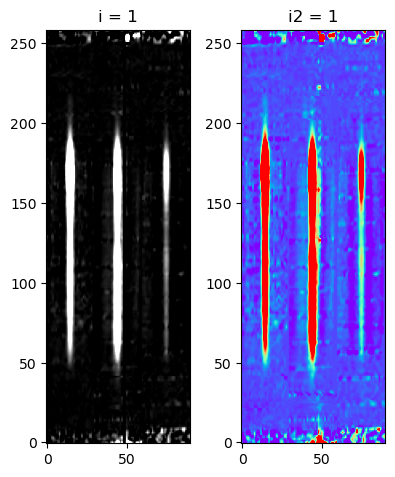

In [3]:
for i in range(1,2):

    fig = plt.figure(figsize=(6, 12), tight_layout=True)

    fig.add_subplot(131)
    plt.imshow(spec_dat[i],
               # extent=[waverange36[0],waverange36[1001],30,240],
               aspect="equal",
               cmap="gist_gray",
               # norm=colors.PowerNorm(gamma=0.4),
               vmin=0,
               vmax=0.001,
               origin="lower",
              )
    plt.title('i = '+str(i))
    # plt.ylabel("Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)", fontsize=12)
    # plt.xlabel("Pixel", fontsize=12)
    
    # abc = spec_dat2[30] *1
    # print(np.max(abc))
    # print(np.min(abc))
    # abc[abc>0.001] = 0
    # abc[abc<0] = 0
    
    fig.add_subplot(132)
    plt.imshow(spec_dat2[i],
    #            extent=[waverange36[0],waverange36[1001],30,240],
               aspect='equal',
               cmap='rainbow',
               vmax=0.001,
               vmin=-0.0001,
               # norm=colors.PowerNorm(gamma=0.8),
               origin='lower',
              )
    plt.title('i2 = '+str(i))
    # plt.ylabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=12)
    # plt.xlabel('Pixel', fontsize=12)

[h3ppy]  Spectrum parameters:
         Temperature    = 878.0 +/- 14.6 [K]
         Column density = 4.45E+24 +/-  7.38E+23 [m-2]
         ------------------------------
         background_0 = 0.00E+00
         offset_0 = 0.00E+00
         sigma_0 = 3.61E-05



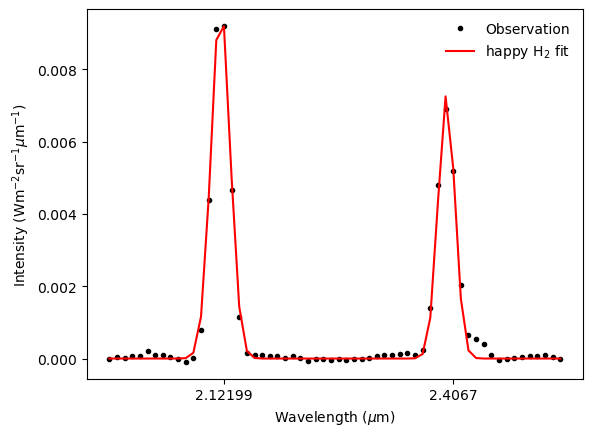

In [6]:
import h3ppy

import logging
logging.disable(logging.NOTSET)

# centers = [2.12199, 2.4067, 2.41357]
# cpos = np.arange(3) * 30 + 15

centers = [2.12199, 2.4067]
cpos = np.arange(2) * 30 + 15

h2 = h3ppy.h2()

wave = wave_to_fit[:60]
spec = spec_dat2[1][162][:60]

# avg_spec = np.mean(spec_dat2[22][80:140], axis=0)
# avg_spec

# wave = np.concatenate([wave_to_fit[:30], wave_to_fit[60:]])
# spec = np.concatenate([avg_spec[:30], avg_spec[60:]])

temp = 900
dens = 1e26
res = 25000

model = h2.model(density=dens, temperature=temp, R=res, wavelength=wave)

h2.set(wavelength=wave, data=spec, R=res, density=dens, temperature=temp)

# h2.guess_density()
fit = h2.fit(params_to_fit=["density", "temperature"])
vars, errs = h2.get_results()

xx = range(len(spec))

# fig = plt.figure(figsize=(12,12), tight_layout=True)

# fig.add_subplot(312)
# # plt.plot(wave_to_fit, spec_to_fit[120], label='Spec')
# plt.plot(wave_to_fit, model, label='Model')
# # plt.plot(wave_to_fit, fit, label='Fit')
# plt.legend()

# Plot the fit
fig, ax = plt.subplots()
ax.plot(xx, spec, "k.", label="Observation")
# ax.plot(xx, model * 1e3, "-", label="H2 Model")
ax.plot(xx, fit, 'r-', label="happy H$_2$ fit")
# ax.plot(xx, (spec - fit), label='spec-fit')
ax.set(xlabel=h2.xlabel(), ylabel=h2.ylabel(), xticks=cpos)
ax.set_xticklabels(centers)
ax.legend(frameon=False)

In [16]:
import h3ppy
import logging

logging.disable(logging.INFO)

centers = [2.12199, 2.4067]
cpos = np.arange(2) * 30 + 15

h2 = h3ppy.h2()

h2_dens_map = []
h2_dens_map_errs = []

h2_temp_map = []
h2_temp_map_errs = []

h2_radiance_map = []
h2_radiance_map_errs = []

wave = wave_to_fit[:60]

print("H3p LOOP START")
# for fn in range(len(spec_dat)):
for fn in range(0,16):
    print()
    print("Frame Number = " + str(fn))
    print()

    density = np.zeros(301)
    density_errs = np.zeros(301)

    temperature = np.zeros(301)
    temperature_errs = np.zeros(301)

    radiance = np.zeros(301)
    radiance_errs = np.zeros(301)

    # offset_0 = np.zeros(301)
    # sigma_0 = np.zeros(301)
    # background_0 = np.zeros(301)

    # for i in range(20, 240):
    for i in range(50, 210):
        spec = spec_dat[fn][i][:60]

        condition = np.nanmax(spec[:26]) / np.nanmax(spec[26:52])
        #         print('i = '+str(i)+', '+str(condition))

        if condition > 0.2 and condition < 0.5:
            temp = 600
            dens = 1e26

        if condition >= 0.5 and condition < 0.8:
            temp = 600
            dens = 1e26

        if condition >= 0.8 and condition < 0.98:
            temp = 750
            dens = 1e26

        if condition >= 0.98 and condition < 1.02:
            temp = 800
            dens = 1e25

        if condition >= 1.02 and condition < 1.1:
            temp = 780
            dens = 1e25

        if condition >= 1.1 and condition < 1.3:
            temp = 850
            dens = 1e25

        if condition >= 1.3 and condition < 1.5:
            temp = 900
            dens = 1e25

        if condition > 1.5:
            temp = 1000
            dens = 1e24

        model = h2.model(density=dens, temperature=temp, R=25000, wavelength=wave)

        h2.set(wavelength=wave, data=spec, R=25000, density=dens, temperature=temp)

        fit = h2.fit(params_to_fit=["density", "temperature"])

        rad = np.sum(fit * (wave[1] - wave[0]))
        rad_errs = np.std(spec[27:33] * (wave[1] - wave[0]))

        # rad = np.sum(fit)
        # rad_errs = np.std(spec[27:33])

        vars, errs = h2.get_results()

        xx = range(len(spec))

        if bool(vars) == False:
            print("i = " + str(i) + ", " + str(condition) + ", false fit")
            
        # fig, ax = plt.subplots()
        # ax.plot(xx, spec * 1e3, '-', label = 'Observation')
        # ax.plot(xx, model * 1e3, label = 'Model')
        # ax.plot(xx, fit * 1e3, label = 'H$_2$ fit')
        # ax.set_title('Spatial Row ' + str(i) + ", " + str(condition))
        # ax.set(xlabel = h2.xlabel(), ylabel = h2.ylabel(prefix = 'm'), xticks = cpos)
        # ax.set_xticklabels(centers)
        # ax.legend(frameon = False)

        if bool(vars) == True:
            print(
                "i = "
                + str(i)
                + ", "
                + str(condition)
                + ", dens = "
                + str(vars["density"])
                + ", temp = "
                + str(vars["temperature"])
                + ", rad = "
                + str(rad)
            )

            density[i] = vars["density"]
            density_errs[i] = errs["density"]

            temperature[i] = vars["temperature"]
            temperature_errs[i] = errs["temperature"]

            radiance[i] = rad
            radiance_errs[i] = rad_errs

    h2_dens_map.append(density)
    h2_dens_map_errs.append(density_errs)

    h2_temp_map.append(temperature)
    h2_temp_map_errs.append(temperature_errs)

    h2_radiance_map.append(radiance)
    h2_radiance_map_errs.append(radiance_errs)

print("DONE")

h2_density_1 = np.array(h2_dens_map)
h2_temperature_1 = np.array(h2_temp_map)
h2_density_errs_1 = np.array(h2_dens_map_errs)
h2_temperature_errs_1 = np.array(h2_temp_map_errs)
h2_radiance_1 = np.array(h2_radiance_map)
h2_radiance_errs_1 = np.array(h2_radiance_map_errs)

[h3ppy] Fit failed to converge - solution is numerially unstable 


H3p LOOP START

Frame Number = 0

i = 50, 0.815218410262301, dens = 7.673015807562868e+24, temp = 568.9141848358848, rad = 1.1183748622401552e-08
i = 51, 0.9702231787298152, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 52, 0.6247180160864505, false fit
i = 53, 0.4164086064430496, false fit
i = 54, 0.4722997657859257, false fit
i = 55, 0.4394125434506818, false fit
i = 56, 0.4689766266100492, dens = 3.545314916507323e+26, temp = 486.7149911276354, rad = 3.8008479503053326e-08
i = 57, 0.522986210610078, dens = 1.620327470817781e+26, temp = 513.5992335061409, rad = 4.469598440922999e-08
i = 58, 0.5782072061680708, dens = 1.069340685003131e+26, temp = 530.0090621155149, rad = 5.011319743654573e-08
i = 59, 0.6005696610916053, dens = 1.2825015543842233e+26, temp = 529.0508781131415, rad = 5.8323728295974295e-08
i = 60, 0.6620504077582706, dens = 1.247261763365189e+26, temp = 536.1340817398448, rad = 7.064946407760225e-08
i = 61, 0.589081236537318, dens = 3.7017913697411144e+26, temp = 511.03461300900796, rad = 9.370796365567503e-08
i = 62, 0.46927827889262363, dens = 1.8027031096512965e+27, temp = 476.1750058912162, rad = 1.2962277527447486e-07
i = 63, 0.4972667127824745, dens = 1.2549372486818305e+27,

[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 195, 1.323283881936115, dens = 2.8738050282208038e+23, temp = 883.6891252893536, rad = 1.0086234363727676e-07
i = 196, 1.3867159433011869, dens = 2.4028165946827962e+23, temp = 889.8398758016888, rad = 9.024740970015902e-08
i = 197, 1.5628384310599595, dens = 1.6980509194189633e+23, temp = 911.6101795241523, rad = 8.04582070946108e-08
i = 198, 1.596827435580298, dens = 1.380792987712536e+23, temp = 917.5019635407306, rad = 6.953481438319935e-08
i = 199, 1.316278250419065, dens = 2.9228583674982517e+23, temp = 835.1742998999032, rad = 5.795820741849838e-08
i = 200, 1.181948994198208, dens = 1.6738466214445277e+23, temp = 871.4809274544325, rad = 5.120046630733474e-08
i = 201, 1.4178312551072354, dens = 7.199597954666151e+22, temp = 949.712475202824, rad = 4.988613640132865e-08
i = 202, 1.6201468070941782, dens = 2.8763929218889068e+22, temp = 1035.480042205724, rad = 4.214796954248369e-08
i = 203, 1.7116002552776592, dens = 2.344092738898801e+22, temp = 1042.1485930563829, rad = 3.6

[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 189, 1.0982809723603932, dens = 4.34000431431756e+24, temp = 741.1004846365852, rad = 2.2836255128837568e-07
i = 190, 1.0419176033336643, dens = 6.180802328035824e+24, temp = 709.1642694500051, rad = 1.9099881392758203e-07
i = 191, 1.080107631954794, dens = 4.234678473614268e+24, temp = 723.843698124166, rad = 1.6812441380435283e-07
i = 192, 1.2168824157113187, dens = 1.1238124910093802e+24, temp = 802.8349370091444, rad = 1.4639856184023115e-07
i = 193, 1.3072706734097281, dens = 4.742523125183499e+23, temp = 861.3779398052894, rad = 1.2907071949250333e-07
i = 194, 1.3066285116533336, dens = 5.064692384579264e+23, temp = 845.6626274987826, rad = 1.142760622798015e-07
i = 195, 1.3284886765414612, dens = 3.426312128922087e+23, temp = 868.2043848223828, rad = 1.0094004022852199e-07
i = 196, 1.38248413148735, dens = 2.8416810346493123e+23, temp = 870.2414136082871, rad = 8.569866442669036e-08
i = 197, 1.4459622122054108, dens = 2.7293312170072037e+23, temp = 859.4873785406601, rad = 7

[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 207, 0.49292846191166667, dens = 3.880726964365352e+24, temp = 632.70492350306, rad = 2.6869138629076148e-08
i = 208, 1.1514714600952847, false fit
i = 209, 1.572247843047166, false fit

Frame Number = 2

i = 50, 0.5070670194597948, false fit
i = 51, 0.4670508810657881, false fit
i = 52, 0.44160313121440037, false fit
i = 53, 0.45407177142053307, false fit
i = 54, 0.46471303832850597, false fit
i = 55, 0.4724232813431739, false fit
i = 56, 0.4644414256912401, false fit
i = 57, 0.464768571917048, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 58, 0.4735023884728849, false fit
i = 59, 0.4796000578686395, false fit
i = 60, 0.5034559321900752, false fit
i = 61, 0.5005298316085098, false fit
i = 62, 0.48237636563706, false fit
i = 63, 0.4848705498215369, false fit
i = 64, 0.5380195292048235, false fit
i = 65, 0.5721915435741328, false fit
i = 66, 0.5774849396147306, false fit
i = 67, 0.5732246815583283, false fit
i = 68, 0.6085394597983517, false fit
i = 69, 0.6588178984649364, dens = 1.1651204843197944e+27, temp = 505.8683287784871, rad = 2.4742926741077236e-07
i = 70, 0.6949225921177982, dens = 8.477356261491461e+26, temp = 516.2637029741938, rad = 2.5544024935372744e-07
i = 71, 0.7394764889790758, dens = 4.9801487149641416e+26, temp = 534.4519886258678, rad = 2.679010351431477e-07
i = 72, 0.7746545141843533, dens = 2.9988350316463043e+26, temp = 551.4199562851327, rad = 2.6765554798181897e-07
i = 73, 0.7894450552568231, dens = 1.9513709244711614e+26, temp = 567.0024658458395, rad = 2.699754888134871e-07
i = 74, 0.7747920

[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 204, 1.5170551666883265, dens = 1.2321536980135799e+22, temp = 1063.159245299853, rad = 2.2378154205973193e-08
i = 205, 1.345826282590984, dens = 1.6453520969562903e+23, temp = 809.9480402305742, rad = 2.3578693333016397e-08
i = 206, 1.1813241323752957, dens = 2.5402372252948802e+23, temp = 774.273869264118, rad = 2.2159066658889008e-08
i = 207, 0.7670975844005904, dens = 4.686698989720902e+24, temp = 613.2250937291126, rad = 2.0871300025365088e-08
i = 208, 0.5204913416361739, false fit
i = 209, 0.8487719612168465, dens = 7.592302019160589e+24, temp = 590.0929720570834, rad = 1.9272850703537243e-08

Frame Number = 3



[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 50, 0.34506257680374147, false fit
i = 51, 0.3725659628623693, false fit
i = 52, 0.2911521613164201, false fit
i = 53, 0.25544483908126603, false fit
i = 54, 0.2772314982918121, false fit
i = 55, 0.31802347520857444, false fit
i = 56, 0.3719147009056902, false fit
i = 57, 0.3853216271414979, false fit
i = 58, 0.37310771975893586, false fit
i = 59, 0.39622366589709224, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 60, 0.45768641082274836, false fit
i = 61, 0.5422912133039881, false fit
i = 62, 0.5362688959182503, false fit
i = 63, 0.5382832362307193, false fit
i = 64, 0.550769310034413, false fit
i = 65, 0.6023719446852468, false fit
i = 66, 0.6835601907556298, dens = 8.28686020851714e+26, temp = 508.4176696718054, rad = 1.920021483004777e-07
i = 67, 0.6974425958530598, dens = 7.030806968986698e+26, temp = 514.1552974921609, rad = 1.97564897334209e-07
i = 68, 0.678871590077889, dens = 8.373104030504668e+26, temp = 509.1825691375089, rad = 1.991041812027787e-07
i = 69, 0.691876248536725, dens = 6.708399492234607e+26, temp = 516.2137310556178, rad = 2.0180498266480528e-07
i = 70, 0.732625779111612, dens = 4.263353451060336e+26, temp = 530.8980465726183, rad = 2.05424589813456e-07
i = 71, 0.7996914013894809, dens = 2.3421418173216605e+26, temp = 552.1948732192025, rad = 2.13775256628021e-07
i = 72, 0.8254142454819631, dens = 1.926965985877925e+26, temp = 560.0251798969224, rad = 2.1975085266494

[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 198, 1.4419141851809034, dens = 2.7909713177196295e+22, temp = 900.7389905448866, rad = 1.1792861657706668e-08
i = 199, 1.3162217829906515, dens = 2.02027259216157e+22, temp = 900.6338949811595, rad = 8.52681081118659e-09
i = 200, 1.2991238365332032, dens = 1.2452679407919865e+23, temp = 850.8490124316596, rad = 2.9914191543688436e-08
i = 201, 1.3400277066678166, dens = 1.021758588333847e+23, temp = 854.0878999387351, rad = 2.5514310658862598e-08
i = 202, 1.8689191420793316, false fit
i = 203, 2.080370554803085, false fit
i = 204, 1.4066216424589328, dens = 3.5720541339745546e+23, temp = 725.4734354428134, rad = 1.4572499004586111e-08
i = 205, 1.1421377155014627, false fit
i = 206, 1.0174761134727601, false fit
i = 207, 1.2780117106838438, false fit
i = 208, 0.810783794167613, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 209, 0.9858262130558856, false fit

Frame Number = 4

i = 50, 0.3128691469853913, false fit
i = 51, 0.3462987532357089, false fit
i = 52, 0.3220977430755249, false fit
i = 53, 0.32094238621935567, false fit
i = 54, 0.3461281025775658, false fit
i = 55, 0.3848293253099874, false fit
i = 56, 0.4289381559831398, false fit
i = 57, 0.45350333664487025, false fit
i = 58, 0.45693524255107726, false fit
i = 59, 0.5069210718044818, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 60, 0.5866580581871315, false fit
i = 61, 0.673199913460134, dens = 6.081094150460281e+26, temp = 510.2772810426519, rad = 1.5005828457934677e-07
i = 62, 0.6502528294564764, dens = 3.0625737979907083e+26, temp = 530.9491777902078, rad = 1.478021105880881e-07
i = 63, 0.6113155240002427, dens = 4.5189663351122436e+26, temp = 521.5286416603676, rad = 1.6170600792618087e-07
i = 64, 0.5991651258937636, false fit
i = 65, 0.6383795253824741, dens = 1.076264855804453e+27, temp = 499.5217176765864, rad = 1.8329038672066126e-07
i = 66, 0.7398467912984908, dens = 5.192245931777768e+26, temp = 519.7855430376665, rad = 1.7558674357107085e-07
i = 67, 0.764111703085352, dens = 4.469293848038878e+26, temp = 524.9255909397388, rad = 1.7836294159533022e-07
i = 68, 0.7567540895627817, dens = 4.4780214906883066e+26, temp = 525.7798315144041, rad = 1.8364109065805535e-07
i = 69, 0.7750279887393231, dens = 3.0912647357888178e+26, temp = 538.8112428823976, rad = 1.8996771420189233e-07
i = 70, 0.801660434

[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 190, 1.8746586722063217, dens = 3.6603447624347293e+22, temp = 1105.23178999157, rad = 9.014936118684036e-08
i = 191, 1.2887236684095573, dens = 6.129558616158305e+23, temp = 800.2775761401957, rad = 7.71252948219693e-08
i = 192, 0.9047548175121517, dens = 4.4789505709815095e+24, temp = 670.7057007677245, rad = 6.809538349148577e-08
i = 193, 0.9930041626151533, dens = 2.6511838183918355e+24, temp = 691.272589950213, rad = 5.948927694486548e-08
i = 194, 1.3751872796409046, dens = 2.542614339477734e+23, temp = 830.5997396333569, rad = 4.760625437385493e-08
i = 195, 1.3826136722555797, dens = 1.3086338732771504e+23, temp = 872.5376201514941, rad = 4.051477869690077e-08
i = 196, 1.5288293600080611, dens = 4.36401207808563e+22, temp = 982.7268875625422, rad = 4.1001370774759295e-08
i = 197, 2.286583558416475, false fit
i = 198, 2.130766891476646, false fit
i = 199, 1.3289358082068654, false fit
i = 200, 0.9958285454324468, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 201, 1.1856200145399343, dens = 2.7184514148039404e+23, temp = 745.3914059505564, rad = 1.5310066963663042e-08
i = 202, 1.4684296750525399, dens = 2.956682786766667e+22, temp = 900.0397084611874, rad = 1.2400111929669727e-08
i = 203, 1.7827014132980132, dens = 6.76138276787568e+21, temp = 1056.7110507583668, rad = 1.1693268654183244e-08
i = 204, 1.4948005324943694, false fit
i = 205, 1.369689156717545, false fit
i = 206, 0.8605236509380856, false fit
i = 207, 0.45592159758164, dens = 6.820035682154708e+24, temp = 542.6942919732643, rad = 4.7102696655309476e-09
i = 208, 0.3044104351412438, false fit
i = 209, 0.3300757092690866, dens = 1.1651046129916865e+25, temp = 543.7903112429204, rad = 8.313967597769968e-09

Frame Number = 5



[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 50, 0.42703269509415925, false fit
i = 51, 0.4458422932016506, false fit
i = 52, 0.39549051099328475, false fit
i = 53, 0.38874854114483354, false fit
i = 54, 0.419638016143051, false fit
i = 55, 0.4878433487192431, false fit
i = 56, 0.5155493712722224, dens = 1.912016102309967e+27, temp = 475.0181497753236, rad = 1.314449194682208e-07
i = 57, 0.561129584405565, dens = 8.50441096233262e+26, temp = 497.55148786998967, rad = 1.3508643066745714e-07
i = 58, 0.5965025971706313, dens = 7.104583268530835e+26, temp = 502.80436694228575, rad = 1.357192369508758e-07
i = 59, 0.5950605532747153, dens = 8.873257916994542e+26, temp = 497.6307226134361, rad = 1.4134240729928296e-07
i = 60, 0.6342041924514942, dens = 6.384259876299778e+26, temp = 507.84605828433934, rad = 1.4506936712568116e-07
i = 61, 0.6892834826156292, dens = 3.543223476049583e+26, temp = 525.7457581803269, rad = 1.4514834349164233e-07
i = 62, 0.6880225235858525, dens = 1.2596365911487328e+26, temp = 558.4457409041053, rad = 1.

[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 192, 0.7675717139885571, dens = 4.17862702644372e+24, temp = 638.6885275779384, rad = 3.2952082653895085e-08
i = 193, 1.183222293880193, dens = 2.193106596383382e+23, temp = 801.4844744171138, rad = 2.805136431134343e-08
i = 194, 2.1686183763576157, false fit
i = 195, 1.5670802206122785, dens = 2.167809500594273e+22, temp = 994.3721155874381, rad = 2.256266312859867e-08
i = 196, 1.4690853008448772, dens = 8.792761805377592e+22, temp = 861.9800225069808, rad = 2.4099162746614718e-08
i = 197, 1.7479018449344548, dens = 3.9476615497562295e+22, temp = 947.5074815103118, rad = 2.6781610907126936e-08
i = 198, 1.2723852979723718, dens = 2.0627017077944144e+23, temp = 779.243207180661, rad = 1.9335532919235328e-08
i = 199, 1.0837339592960968, dens = 2.1742751735509466e+24, temp = 616.3950667102831, rad = 1.0423556889902681e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 200, 1.240499256001669, false fit
i = 201, 1.0055233517763709, dens = 1.0366962500895517e+23, temp = 791.4510968636145, rad = 1.155099149739389e-08
i = 202, 0.9893539926904658, dens = 4.133917057163929e+23, temp = 707.4842063537292, rad = 1.24050939823589e-08
i = 203, 0.9869891119763388, dens = 2.77349336488216e+22, temp = 800.5465014785651, rad = 3.5025510563464845e-09
i = 204, 2.6827011538145795, false fit
i = 205, 2.3059084595831254, false fit
i = 206, 1.1638813908849794, false fit
i = 207, 0.4980520074783253, false fit
i = 208, 0.4324960563072912, false fit
i = 209, 0.35620335943939596, false fit

Frame Number = 6

i = 50, 0.5553186143664978, dens = 1.1861423052507082e+27, temp = 482.5351821314885, rad = 1.0876024216043845e-07
i = 51, 0.648970238659385, false fit
i = 52, 0.5241066485346229, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 53, 0.41744308650188566, false fit
i = 54, 0.49791384376166686, dens = 2.4207508019187957e+27, temp = 464.0243310851971, rad = 1.0740729778159675e-07
i = 55, 0.5320768170856925, dens = 1.6240796629513468e+27, temp = 474.97230998531785, rad = 1.1145127772462965e-07
i = 56, 0.5223189935469829, dens = 1.4159999820226837e+27, temp = 480.30078581115737, rad = 1.192951747155428e-07
i = 57, 0.5525235271529221, dens = 8.21619518329566e+26, temp = 496.08171264247716, rad = 1.2385539471036727e-07
i = 58, 0.6243464595292503, dens = 4.092696105456305e+26, temp = 516.32047228262, rad = 1.2355242904026336e-07
i = 59, 0.6727495635382478, dens = 3.314379826570649e+26, temp = 523.7458615254873, rad = 1.273746490215187e-07
i = 60, 0.7214154424260606, dens = 2.307252488504793e+26, temp = 536.8586143269404, rad = 1.336161518282796e-07
i = 61, 0.7081472849165735, dens = 2.4067330898790332e+26, temp = 537.0799472134823, rad = 1.40321276948467e-07
i = 62, 0.664870014949956, dens = 3.379848318542119e+26, 

[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 63, 0.6800364115768099, dens = 2.8571777399090508e+26, temp = 534.9857993208971, rad = 1.562425396959412e-07
i = 64, 0.7724434270896371, dens = 1.2037958186310703e+26, temp = 564.8308993437774, rad = 1.5690568095988827e-07
i = 65, 0.8328513025307396, dens = 1.2366386862501697e+26, temp = 565.269023185183, rad = 1.6314356855266257e-07
i = 66, 0.835533217798775, false fit
i = 67, 0.862135565371156, dens = 1.4012316860878356e+26, temp = 562.6463754632341, rad = 1.7192570111238079e-07
i = 68, 0.858603168927908, dens = 9.26619116155572e+25, temp = 579.3972994772753, rad = 1.7864621336232846e-07
i = 69, 0.864302999341367, dens = 7.798059874484033e+25, temp = 586.9503098357934, rad = 1.8277022980353862e-07
i = 70, 0.9009486790225982, dens = 6.121918523993609e+25, temp = 596.4174894720804, rad = 1.8200753177900603e-07
i = 71, 0.994675151401645, dens = 3.318392538812562e+25, temp = 623.4277859135568, rad = 1.8685101294158176e-07
i = 72, 1.073448194552222, dens = 2.1754580156831697e+25, temp

[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 188, 1.4441159676913005, dens = 1.9281528656698653e+23, temp = 868.0882577766934, rad = 5.672793785857463e-08
i = 189, 1.7021862096268368, dens = 8.614893902601778e+22, temp = 926.5443375758887, rad = 4.756030220320222e-08
i = 190, 1.147896485627578, dens = 1.5334301118132078e+23, temp = 854.2486250686085, rad = 3.836461167194125e-08
i = 191, 0.9760396274018278, dens = 3.3089604256636073e+24, temp = 650.497283737479, rad = 3.349560645060251e-08
i = 192, 0.8925084103440993, dens = 1.5557682914016157e+24, temp = 678.5043346443834, rad = 2.7492327387790527e-08
i = 193, 1.156660356964218, false fit
i = 194, 4.307151081359221, false fit
i = 195, 2.0365235777317943, false fit
i = 196, 1.5023932360133099, dens = 8.109654304164477e+22, temp = 855.6657385536284, rad = 2.0634046478580335e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 197, 1.3403342849326019, dens = 4.950332473220843e+23, temp = 717.464754116679, rad = 1.7648619710642947e-08
i = 198, 0.6452179080572995, dens = 2.1137642575087603e+25, temp = 535.7922608748606, rad = 1.1848491351340787e-08
i = 199, 1.1000702179118806, false fit
i = 200, 1.361543284146251, dens = 1.0370669299845748e+23, temp = 779.4149906742897, rad = 9.745399718676212e-09
i = 201, 1.0877211497166546, false fit
i = 202, 0.8396425971814679, dens = 2.2875903687372204e+23, temp = 749.9346330316142, rad = 1.3832952719534514e-08
i = 203, 0.8993185327683129, dens = 4.9030760029368966e+23, temp = 749.7316314679917, rad = 2.9555159052235357e-08
i = 204, 2.4225049548828794, false fit
i = 205, 2.4917900533731414, false fit
i = 206, 1.047190642060322, false fit
i = 207, 0.7985434858200225, false fit
i = 208, 0.3501581667295032, false fit
i = 209, 0.20024734815892217, dens = 1.9108144564970735e+24, temp = 569.3493865682902, rad = 2.8181970903887903e-09

Frame Number = 7

i = 50, 0.575499889967

[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 191, 1.2663255400122748, dens = 5.2565750958828025e+23, temp = 729.2800504660345, rad = 2.2839395579348e-08
i = 192, 0.8245278668067676, dens = 1.5005692874772345e+25, temp = 561.7552462467759, rad = 1.796048082665404e-08
i = 193, 1.09835546200119, dens = 3.904953073120466e+23, temp = 722.6839645408594, rad = 1.5205190471391653e-08
i = 194, 1.598001992777064, dens = 7.627721699459137e+21, temp = 1055.9632134737858, rad = 1.311631035674562e-08
i = 195, 1.4894042668250782, dens = 2.419515771696134e+22, temp = 900.0643759304262, rad = 1.0149938353671204e-08
i = 196, 1.184996729456986, dens = 2.618392226258924e+24, temp = 611.0943755502532, rad = 1.1091957655973622e-08
i = 197, 1.102931539601829, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 198, 0.8880449129870668, false fit
i = 199, 0.5259279208295083, false fit
i = 200, 0.4216710094340289, false fit
i = 201, 0.7329621549795526, false fit
i = 202, 0.6538325521568937, false fit
i = 203, 0.5709506704506179, false fit
i = 204, 1.6364096211101078, dens = 9.40503546890398e+22, temp = 810.8119361413217, rad = 1.3633299665306667e-08
i = 205, 1.399466742788852, dens = 2.6893223910937415e+23, temp = 756.2288034385165, rad = 1.791992959407406e-08
i = 206, 0.7523853210193107, dens = 1.3486196268707654e+25, temp = 558.6962804774199, rad = 1.4815742468354986e-08
i = 207, 0.7218367856942347, dens = 1.5880072370823204e+25, temp = 530.9851182036186, rad = 7.672432094696978e-09
i = 208, 0.24203651211600194, false fit
i = 209, 0.1947740911171817, dens = 5.1503661923584335e+25, temp = 457.890633490781, rad = 1.7737422543945265e-09

Frame Number = 8

i = 50, 0.6241799837711903, dens = 4.7324017026354395e+26, temp = 507.7328666094185, rad = 1.071202280750401e-07
i = 51, 0.653009189727988

[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 179, 1.2997585446052526, dens = 8.157438140554887e+23, temp = 802.950537537902, rad = 1.0643294027477633e-07
i = 180, 1.3711430778748899, dens = 4.152025129591423e+23, temp = 834.6388860439611, rad = 8.1783319394623e-08
i = 181, 1.4542204736594688, dens = 3.076331164303998e+23, temp = 848.586027387627, rad = 7.191447151447849e-08
i = 182, 1.6462915693307667, dens = 1.234672699330966e+23, temp = 921.4211054122336, rad = 6.471843912797383e-08
i = 183, 1.5490980932163032, dens = 1.3599159430209672e+23, temp = 885.6331519038691, rad = 4.876803913097987e-08
i = 184, 1.255012713250425, dens = 2.909519560164234e+23, temp = 799.2114009498931, rad = 3.608064600574772e-08
i = 185, 1.2716047526943441, false fit
i = 186, 1.7098513075332564, false fit
i = 187, 1.528440324203519, false fit
i = 188, 2.1129635512195253, false fit
i = 189, 1.9324922785923502, dens = 1.7183611507368645e+22, temp = 1019.5013067988764, rad = 2.21203713862649e-08
i = 190, 2.054795718359641, dens = 4.036344742509652e+22

[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 192, 0.8076625623042145, false fit
i = 193, 0.873858957442567, dens = 1.3751542014903443e+23, temp = 749.9995771839215, rad = 8.323896886802122e-09
i = 194, 1.170900259626376, dens = 2.6744914638526822e+22, temp = 850.0619634537719, rad = 6.364263659080513e-09
i = 195, 0.8558289245739258, false fit
i = 196, 1.3726112686128036, false fit
i = 197, 1.0680402167327097, dens = 2.7319683566796025e+23, temp = 702.420560453784, rad = 7.497532889146929e-09
i = 198, 0.9489420900203153, dens = 1.2648830859861147e+23, temp = 750.0026789027106, rad = 7.656788558750552e-09
i = 199, 0.6198008332275092, dens = 1.8695665787084722e+24, temp = 592.8158924495265, rad = 5.082069561920487e-09


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 200, 0.6295952051011001, false fit
i = 201, 0.9761788199467509, dens = 4.031072014350467e+23, temp = 749.7062640946808, rad = 2.4289246865758727e-08
i = 202, 1.0112864651310949, false fit
i = 203, 0.9351673712753649, false fit
i = 204, 1.4677197782260687, dens = 3.0432334617391515e+23, temp = 718.0676358375667, rad = 1.0961374176173842e-08
i = 205, 1.2051881674876006, dens = 9.975936220601076e+21, temp = 850.4387117266969, rad = 2.3846660936125314e-09
i = 206, 0.6996846814218081, dens = 5.922093675392883e+24, temp = 566.6360354943176, rad = 8.111541566626653e-09


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 207, 0.5864407438651761, false fit
i = 208, 0.37570524321240706, false fit
i = 209, 0.7401841130068908, false fit

Frame Number = 9

i = 50, 0.6535527538600325, dens = 4.710022225316596e+26, temp = 506.55385333323176, rad = 1.024032679380309e-07
i = 51, 0.68338696291346, dens = 6.0091501855243416e+26, temp = 501.01969189318226, rad = 1.0786413635554405e-07
i = 52, 0.6270335947043927, dens = 5.0868034638123956e+26, temp = 506.26353422110304, rad = 1.0950014885390224e-07
i = 53, 0.6803041864617071, dens = 2.081233339734614e+26, temp = 532.9770576453693, rad = 1.0697426976474186e-07
i = 54, 0.7867650538837595, dens = 1.015029738799995e+26, temp = 557.8975697501181, rad = 1.0902488222507178e-07
i = 55, 0.808537659739885, dens = 8.166054172286901e+25, temp = 567.588982309396, rad = 1.148043466531466e-07
i = 56, 0.7659474272893666, dens = 1.0181532439399259e+26, temp = 560.9305141144835, rad = 1.1909064875160452e-07
i = 57, 0.7301822484790731, dens = 1.2390407280364045e+26, temp = 553.88

[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 186, 1.2369864617751125, dens = 6.695242236371291e+23, temp = 690.620320254014, rad = 1.4844321297249166e-08
i = 187, 1.2528274113741775, dens = 3.6601835223738246e+23, temp = 720.5083561984428, rad = 1.3739877886534947e-08
i = 188, 0.6554334880339209, dens = 5.35440921927951e+25, temp = 510.77082004492644, rad = 1.3434379234439845e-08
i = 189, 0.49645473780015537, false fit
i = 190, 0.38477065510013814, false fit
i = 191, 0.11911535483001556, false fit
i = 192, 0.5171924257400755, dens = 8.377653351338934e+25, temp = 469.4627331238969, rad = 4.627877117743647e-09


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 193, 0.7454784835901653, dens = 2.6914437207476673e+24, temp = 561.6059682964226, rad = 3.208036260512585e-09
i = 194, 0.7676815457218328, false fit
i = 195, 0.7518445337350352, false fit
i = 196, 0.900507579212675, false fit
i = 197, 0.7770107698395425, false fit
i = 198, 0.728347668708759, dens = 8.153066158929152e+24, temp = 549.1792037934821, rad = 6.818407284830124e-09
i = 199, 0.870744521772627, false fit
i = 200, 1.4114441079119364, false fit
i = 201, 1.2051606809507909, false fit
i = 202, 1.501137438199523, false fit
i = 203, 0.6565899596711288, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 204, 1.5811101498630666, false fit
i = 205, 0.9677803213651481, dens = 2.8309204080464062e+23, temp = 749.9275463765642, rad = 1.7116559372466938e-08
i = 206, 0.3717162832614283, dens = 8.676766382171661e+25, temp = 483.4150067195414, rad = 8.223918466164045e-09
i = 207, 0.23658826349041953, false fit
i = 208, 1.5528441992895856, false fit
i = 209, 0.5343683525658354, false fit

Frame Number = 10

i = 50, 0.7097490593984791, dens = 2.9474310214525062e+26, temp = 517.8182440097052, rad = 9.347035201250871e-08
i = 51, 0.6905085040392867, dens = 7.838998176832505e+26, temp = 490.9183205258859, rad = 9.808525679110225e-08
i = 52, 0.6615795173908823, dens = 1.1803487523741231e+27, temp = 480.8755537969755, rad = 1.0163937828663452e-07
i = 53, 0.6858742179625866, dens = 4.013430308172245e+26, temp = 511.6868731989644, rad = 1.0384894167158462e-07
i = 54, 0.732143403185225, dens = 1.7498357914074906e+26, temp = 538.239025101548, rad = 1.0568310642142075e-07
i = 55, 0.7502669471406768, den

[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 166, 1.220901054481122, dens = 3.8967569939504895e+24, temp = 787.987562832603, rad = 4.1363871022819006e-07
i = 167, 1.1695518842622032, dens = 4.175327378700813e+24, temp = 777.6231723657785, rad = 3.8235748413898225e-07
i = 168, 0.9697054921280441, dens = 1.6008624523434414e+25, temp = 682.8421077121384, rad = 3.07116092852678e-07
i = 169, 1.1074668268630257, dens = 4.822156976500249e+24, temp = 748.7694734690491, rad = 2.863481914972397e-07
i = 170, 1.3037961569158218, dens = 1.050638363945241e+24, temp = 854.5656017661166, rad = 2.638507074706661e-07
i = 171, 0.9663223825617843, false fit
i = 172, 0.876501215183606, false fit
i = 173, 0.7833159920296361, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 174, 0.786767867697989, false fit
i = 175, 1.0496824802127527, dens = 2.435452162697025e+24, temp = 710.8621520138779, rad = 7.751504281808391e-08
i = 176, 1.3813296803672888, dens = 8.714882657923504e+23, temp = 749.0293076985971, rad = 5.196066641334311e-08
i = 177, 1.557811559092874, dens = 2.7041175008943005e+23, temp = 805.419210973457, rad = 3.64756504041336e-08
i = 178, 1.2730572343229258, dens = 5.22556307858917e+23, temp = 741.6877353695141, rad = 2.7754184827045912e-08
i = 179, 1.2905368316742298, dens = 1.2914846558660019e+23, temp = 822.6418887112567, rad = 2.1849258286520133e-08
i = 180, 1.6791612578466324, false fit
i = 181, 2.2557858023551676, false fit
i = 182, 3.130399722453643, false fit
i = 183, 3.939598010246924, false fit
i = 184, 3.8837114455813073, false fit
i = 185, 2.556862575711056, false fit
i = 186, 1.9803412619003322, false fit
i = 187, 2.269598098811314, false fit
i = 188, 0.7392973863293779, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 189, 0.5107142429360375, dens = 1.5742888058352773e+25, temp = 539.344634279635, rad = 9.831896512195847e-09
i = 190, 1.358866411078815, dens = 8.594075955348063e+22, temp = 785.6659003294892, rad = 8.828771911660313e-09
i = 191, 0.8193829344987964, false fit
i = 192, 1.014047365564758, false fit
i = 193, 3.0832441860376876, false fit
i = 194, 1.6025858354562246, false fit
i = 195, 2.38456134109668, dens = 1.3432387979748898e+21, temp = 999.8598283597452, rad = 1.4658734982050854e-09
i = 196, 3.493595945147627, false fit
i = 197, 3.948864289752898, false fit
i = 198, 3.880081717486739, dens = 7.463411374644253e+22, temp = 764.5780365902708, rad = 5.642339965300229e-09


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 199, 3.059309874034957, false fit
i = 200, 1.3512317235716276, dens = 1.6752019537485722e+21, temp = 900.074010845132, rad = 7.028246391149175e-10
i = 201, 0.678524255388242, dens = 1.1070253802861753e+22, temp = 600.105164132611, rad = 3.60334275110083e-11
i = 202, 3.2605348495732924, false fit
i = 203, 1.882530784731293, false fit
i = 204, 1.0467684999983284, dens = 1.0241038376636645e+23, temp = 711.8080187188601, rad = 3.3133387067648452e-09
i = 205, 0.7877987389120011, false fit
i = 206, 0.40503603041045627, false fit
i = 207, 0.305365820095168, false fit
i = 208, 0.3591873762036239, false fit
i = 209, 0.24114007003341353, false fit

Frame Number = 11

i = 50, 0.8860407445803116, dens = 7.332586506921395e+25, temp = 572.2381193071272, rad = 1.1691654676997731e-07
i = 51, 0.865962371736999, dens = 8.126613971582175e+25, temp = 568.4297527759122, rad = 1.1689855615617973e-07
i = 52, 0.7849717930720567, dens = 7.5358934968717555e+25, temp = 570.1335631821297, rad = 1.135311606769

[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 162, 0.8903686249776384, dens = 3.6185319619425023e+24, temp = 695.8869232479203, rad = 8.832233629034204e-08
i = 163, 0.9692809199452237, dens = 1.4068708535566072e+24, temp = 736.1751182700754, rad = 6.84024153350918e-08
i = 164, 1.1328769455646963, dens = 2.669443669790842e+23, temp = 828.7421848128912, rad = 4.882061543084249e-08
i = 165, 1.1630956561452, dens = 1.031415224694226e+23, temp = 883.4488198926616, rad = 3.610325075140469e-08
i = 166, 0.9935967176984072, false fit
i = 167, 1.1064843533693292, dens = 2.45103799354359e+24, temp = 651.8695237192607, rad = 2.5526511564121012e-08
i = 168, 0.8767968040505794, dens = 5.170418308077002e+24, temp = 615.2623704606913, rad = 2.414482627665482e-08
i = 169, 0.9022452599773448, dens = 5.138970380606914e+24, temp = 615.5074480532533, rad = 2.4134886367795596e-08
i = 170, 1.0989787369252086, dens = 8.087464144273139e+23, temp = 700.625641334934, rad = 2.1496437901339614e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 171, 0.9180348220994106, false fit
i = 172, 0.9443971287276409, false fit
i = 173, 0.2933152550409917, false fit
i = 174, 0.4130887487135562, false fit
i = 175, 0.9263584254328707, false fit
i = 176, 0.8224759969768035, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 177, 0.9574765843863572, dens = 4.5540119984733705e+23, temp = 749.847218164035, rad = 2.7500483046526385e-08
i = 178, 0.4658072715852759, dens = 1.0814962398660141e+26, temp = 477.9569551804843, rad = 8.329959038620091e-09
i = 179, 0.40579536808038746, false fit
i = 180, 0.5954451484286603, dens = 1.9048999555666475e+25, temp = 520.7730426393022, rad = 6.651768240469853e-09


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 181, 0.17697209737081243, false fit
i = 182, 0.2593170210616961, false fit
i = 183, 0.24193862981825465, false fit
i = 184, 0.8647104716004664, dens = 2.707663920808142e+23, temp = 749.8829216306061, rad = 1.6359947510860442e-08
i = 185, 0.906349369758036, false fit
i = 186, 0.7358448082126483, dens = 1.2026000562170525e+24, temp = 615.3939116126038, rad = 5.633086019974199e-09
i = 187, 0.994276430929179, false fit
i = 188, 0.7446072924673238, false fit
i = 189, 0.46554455947201323, false fit
i = 190, 0.36641191575877946, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 191, 0.2630658277762977, false fit
i = 192, 0.36237769104663164, false fit
i = 193, 0.2434864349820464, false fit
i = 194, 0.3386935807123367, false fit
i = 195, 0.7439890966788721, false fit
i = 196, 0.22614508265895883, false fit
i = 197, 0.34971286286384673, false fit
i = 198, 0.1720731376245457, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 199, 0.538907477185353, dens = 1.5595860182323618e+25, temp = 501.69955171773483, rad = 2.8667863402179944e-09
i = 200, 0.6895576363455621, dens = 4.715401208874733e+24, temp = 556.0338483393956, rad = 4.804169567444274e-09
i = 201, 0.25681055155788846, false fit
i = 202, 0.36657143865229697, false fit
i = 203, 0.5898642139418689, false fit
i = 204, 1.5684149844660344, false fit
i = 205, 0.8248378146893383, false fit
i = 206, 0.3503334345692868, false fit
i = 207, 0.19796960933504615, dens = 1.2424734324473964e+23, temp = 600.1880761545394, rad = 4.052423743275716e-10
i = 208, 0.452433109102707, false fit
i = 209, 0.32289575859006353, false fit

Frame Number = 12

i = 50, 0.8185865620788344, dens = 5.802113054464489e+25, temp = 566.9273083897315, rad = 8.01083687449622e-08
i = 51, 0.8153157788706806, false fit
i = 52, 0.68033115980697, dens = 5.818920216998726e+26, temp = 495.14656130604897, rad = 8.483172991775846e-08
i = 53, 0.62414324598474, dens = 3.601694524068012e+26, temp = 

[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 62, 0.5613744461527694, dens = 4.39480533956027e+25, temp = 577.4958127768413, rad = 8.059836507571672e-08
i = 63, 0.49971865990053693, dens = 2.9989945617503448e+26, temp = 513.4915913804558, rad = 8.242953086075702e-08
i = 64, 0.566260481288099, dens = 9.146957911047842e+26, temp = 484.1039814136413, rad = 8.896689826959838e-08
i = 65, 0.7515637631140889, dens = 2.4273201294118625e+26, temp = 520.8278213775685, rad = 8.49107639875683e-08
i = 66, 0.8888021688966041, false fit
i = 67, 0.8559975423157677, false fit
i = 68, 0.8670801886822005, false fit
i = 69, 0.7821348084296288, dens = 2.304801599612569e+26, temp = 519.0751306568701, rad = 7.615829737966503e-08
i = 70, 0.7317355367124813, dens = 2.0168814017849873e+26, temp = 523.6915365727818, rad = 7.737582622634475e-08
i = 71, 0.743364573087629, dens = 1.903202676965685e+26, temp = 524.931093712944, rad = 7.596734497325345e-08
i = 72, 0.8168928199488045, dens = 8.290741120571226e+25, temp = 552.8872179876139, rad = 7.71966932129

[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 162, 1.0390767251594422, dens = 5.250093136325395e+23, temp = 786.2311861846365, rad = 5.4367262696288145e-08
i = 163, 1.1555133249490857, dens = 2.157257334868679e+23, temp = 833.7023141188168, rad = 4.1997163247280216e-08
i = 164, 1.299009290148593, dens = 1.1065141831641624e+23, temp = 866.0053968022814, rad = 3.1781001896386734e-08
i = 165, 1.2960161451546377, dens = 1.36609638381341e+21, temp = 850.8942434617362, rad = 3.2834579059877663e-10
i = 166, 1.372319499953867, dens = 4.4867349660940475e+21, temp = 900.4012398031256, rad = 1.8889855111120543e-09
i = 167, 1.964640259064035, false fit
i = 168, 1.8043814613611726, false fit
i = 169, 2.17002775254219, false fit
i = 170, 2.1562063615978975, false fit
i = 171, 2.0476260836450204, false fit
i = 172, 1.9103556554800638, false fit
i = 173, 0.20886398027996878, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 174, 0.23814047861950716, false fit
i = 175, 0.3095087947248418, false fit
i = 176, 0.4249109324746483, false fit
i = 177, 0.37298107463014846, false fit
i = 178, 0.9005132529090998, false fit
i = 179, 1.8734902064141563, false fit
i = 180, 1.2694087515431858, false fit
i = 181, 1.4526145595807947, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 182, 1.2210755614331446, dens = 1.3552828118367759e+23, temp = 749.8813581047513, rad = 8.188541407692546e-09
i = 183, 1.0730757334969947, dens = 7.068951486967731e+23, temp = 645.5653274050901, rad = 6.454235865955633e-09
i = 184, 1.4807175968369541, false fit
i = 185, 0.9190254767057096, false fit
i = 186, 1.1400782444052866, false fit
i = 187, 1.9511556405476502, false fit
i = 188, 0.46300178973832296, dens = 2.594777337300514e+24, temp = 558.7472220357131, rad = 2.8546821867787882e-09
i = 189, 0.771569510593881, false fit
i = 190, 0.8490325802265017, dens = 1.698086840722046e+23, temp = 749.9336856387524, rad = 1.0268101603543217e-08
i = 191, 0.47657537806972905, false fit
i = 192, 0.6858254820128079, false fit
i = 193, 0.8068857223554109, dens = 1.8909300857835034e+23, temp = 749.9218529879824, rad = 1.1432089748341773e-08
i = 194, 0.4673519084283795, false fit
i = 195, 0.5624625901499499, false fit
i = 196, 0.8537033811372061, dens = 1.1658295445909131e+23, temp = 749.9594360

[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 197, 1.716280917070208, false fit
i = 198, 2.257158180786479, false fit
i = 199, 3.300651512504852, dens = 3.274110267106932e+21, temp = 999.4548337746493, rad = 3.560624760188696e-09
i = 200, 7.679010170669137, false fit
i = 201, 2.897974717406552, false fit
i = 202, 0.6872936163742533, false fit
i = 203, 0.6693141790585689, false fit
i = 204, 0.3135061204811083, false fit
i = 205, 0.2529603804381461, false fit
i = 206, 0.07627757497419745, dens = 4.109002888643645e+24, temp = 574.8648685560674, rad = 7.02835567981054e-09


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 207, 0.09193030452065169, dens = 1.9048929362583864e+25, temp = 522.5677888427049, rad = 7.048814247795765e-09
i = 208, 0.7446802329104583, dens = 3.133606546093198e+24, temp = 581.4974510429395, rad = 6.381823297364521e-09
i = 209, 2.264686931946719, false fit

Frame Number = 13

i = 50, 0.7260410837170831, dens = 2.7188306857864312e+26, temp = 510.6008054204301, rad = 6.782656985037942e-08
i = 51, 0.5821487900837576, false fit
i = 52, 0.4190559657958114, false fit
i = 53, 0.4787525424519106, dens = 1.350805594967621e+27, temp = 462.9886232349156, rad = 5.745129760448457e-08
i = 54, 0.6341961796562955, dens = 2.2503152185746174e+26, temp = 511.5283561914363, rad = 5.79186234168271e-08
i = 55, 0.7408213457433547, dens = 8.893382464000782e+25, temp = 544.4033470909609, rad = 6.462778950896783e-08
i = 56, 0.6744555583964459, dens = 1.5094067476619339e+26, temp = 529.3801812481428, rad = 6.935590966815567e-08
i = 57, 0.6614212509183665, dens = 9.738828210708114e+25, temp = 542.2355841

[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 61, 0.6926242952149116, dens = 1.7669578384814714e+26, temp = 517.1350575407608, rad = 5.479182682487152e-08
i = 62, 0.5011821228537451, dens = 6.715545331190732e+26, temp = 481.1944347875741, rad = 5.8531460312759356e-08
i = 63, 0.5021990762596201, dens = 5.380583344878523e+26, temp = 487.3080805476337, rad = 5.8965026256088415e-08
i = 64, 0.5989562100678432, dens = 1.3308570167773348e+26, temp = 527.1700720213695, rad = 5.703850227202129e-08
i = 65, 0.7572481645233275, dens = 7.385042807430481e+25, temp = 548.1682221404237, rad = 5.996380629476289e-08
i = 66, 0.8986666477303833, dens = 6.173013258068492e+25, temp = 555.6195668424353, rad = 6.215479544106493e-08
i = 67, 0.9370475116701008, dens = 4.348087649196725e+25, temp = 569.7893506797926, rad = 6.489804922799309e-08
i = 68, 0.8572345703933066, false fit
i = 69, 0.8483582327661039, false fit
i = 70, 0.8579617782179089, false fit
i = 71, 0.8219966788917271, false fit
i = 72, 0.7668229911524684, dens = 1.5104877603382376e+26, t

[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 141, 1.1426450281871032, dens = 1.843107908650656e+24, temp = 791.6441961715188, rad = 2.059142898695232e-07
i = 142, 1.1345730196234605, dens = 1.8705788751100047e+24, temp = 795.3321417368176, rad = 2.199419508689852e-07
i = 143, 1.1604693250291596, dens = 1.5401641781338294e+24, temp = 814.65428604043, rad = 2.348677892171299e-07
i = 144, 1.17069074499936, dens = 1.2449051996029727e+24, temp = 835.6508630705546, rad = 2.4832680321104837e-07
i = 145, 1.1555856965868048, dens = 1.4487830487658714e+24, temp = 825.7259509702621, rad = 2.549883277713945e-07
i = 146, 1.1353465200312751, dens = 1.630371403203317e+24, temp = 816.9171691850755, rad = 2.5609974583267817e-07
i = 147, 1.1267123151490188, dens = 1.4611668160274602e+24, temp = 826.6509010939312, rad = 2.602200020732578e-07
i = 148, 1.113984145698898, dens = 1.3540769046369682e+24, temp = 835.0277248062323, rad = 2.6801338694099995e-07
i = 149, 1.0624921614165983, dens = 1.9444082436873728e+24, temp = 805.1243944361796, rad = 

[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 162, 1.1225288880891042, dens = 1.1396954269712389e+23, temp = 809.7228688884418, rad = 1.6283598644984712e-08
i = 163, 1.2576594277360702, dens = 1.99182761893096e+22, temp = 850.3080443715688, rad = 4.753832766075842e-09
i = 164, 1.7088972251255066, dens = 2.5724552170676892e+20, temp = 1001.3094755049935, rad = 2.842406668814551e-10
i = 165, 1.7370374495068386, false fit
i = 166, 1.8770536861760587, false fit
i = 167, 2.0669504296752272, false fit
i = 168, 1.9063633772416941, dens = 1.176763404436486e+22, temp = 942.6442773872974, rad = 7.617135713483866e-09
i = 169, 1.450436083969553, dens = 4.523690121534159e+22, temp = 899.7628863630131, rad = 1.891594860472899e-08
i = 170, 1.142542412848091, dens = 2.1280070406347568e+23, temp = 726.7769066988654, rad = 8.87140411763239e-09
i = 171, 0.7417399815950246, false fit
i = 172, 0.4679353777860498, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 173, 0.02171208593879904, false fit
i = 174, 0.1484188138037324, false fit
i = 175, 0.3187405686781194, false fit
i = 176, 0.32819174850863203, false fit
i = 177, 0.2106430721857732, false fit
i = 178, 0.48584965761141946, dens = 1.8483587487465314e+24, temp = 576.2881334028333, rad = 3.2833187819893947e-09
i = 179, 0.731528756712048, false fit
i = 180, 0.8404355500193849, false fit
i = 181, 1.0487313587612488, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 182, 0.6623176796168957, false fit
i = 183, 1.1354342717280812, false fit
i = 184, 1.466631985717983, false fit
i = 185, 0.8049127171412519, false fit
i = 186, 0.46139149719153083, false fit
i = 187, 0.6309464677844296, false fit
i = 188, 0.47411170337116804, false fit
i = 189, 0.5985236096537818, false fit
i = 190, 0.489408889007727, false fit
i = 191, 0.3501247787688776, false fit
i = 192, 0.5187209795482398, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 193, 0.27384540395786156, false fit
i = 194, 0.3471029142480986, false fit
i = 195, 0.9573599341804779, dens = 1.646044180137499e+23, temp = 749.901587326609, rad = 9.948434663592951e-09
i = 196, 0.6470214183437549, false fit
i = 197, 0.6287662306191413, false fit
i = 198, 0.34127360018661373, false fit
i = 199, 1.6714971798000884, false fit
i = 200, 1.7845877056359312, false fit
i = 201, 0.3052976457388815, false fit
i = 202, 1.403117753295246, false fit
i = 203, 2.112750940004302, dens = 2.9633072382033747e+21, temp = 999.2476835395831, rad = 3.2168906945367664e-09
i = 204, 1.8257772886642145, dens = 1.6770564797723344e+22, temp = 872.1213469287504, rad = 5.167512287577627e-09


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 205, 1.0116658669448098, dens = 5.354544818263901e+24, temp = 589.0205936588898, rad = 1.3228526502153229e-08
i = 206, 0.39188364408572124, false fit
i = 207, 0.14745809589674094, false fit
i = 208, 0.8021418420735491, false fit
i = 209, 0.9213383142908778, false fit

Frame Number = 14

i = 50, 0.5286227940610666, dens = 4.719278316677628e+26, temp = 485.58236062929274, rad = 4.8508625437446146e-08
i = 51, 0.6132770849983772, dens = 1.673978631804299e+27, temp = 453.19818584588796, rad = 4.727520464301061e-08
i = 52, 0.5102465715900532, false fit
i = 53, 0.431436931488195, dens = 2.792505406685159e+27, temp = 441.8889154269337, rad = 4.805723021566785e-08
i = 54, 0.5225641343955278, dens = 1.0476413015703011e+27, temp = 464.8000365176463, rad = 4.797411369256138e-08
i = 55, 0.5970044691853702, dens = 2.932191252086586e+26, temp = 499.0133829302442, rad = 4.9049011664025905e-08
i = 56, 0.6096165423125117, dens = 1.8871138594866245e+26, temp = 513.0374024243833, rad = 5.1088613904366

[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 120, 0.9509396423511973, dens = 5.363251034299044e+24, temp = 693.649629794303, rad = 1.256931680203612e-07
i = 121, 0.9688111335502781, dens = 5.768088652603688e+24, temp = 691.3707152211904, rad = 1.2966208290128132e-07
i = 122, 0.9767671731195887, dens = 5.874572828602419e+24, temp = 691.630995001259, rad = 1.3268785453811778e-07
i = 123, 0.9575907611125681, dens = 4.657690075114555e+24, temp = 703.5698331002569, rad = 1.3045731153657912e-07
i = 124, 0.918509191313845, dens = 3.966280246203919e+24, temp = 711.3568421658606, rad = 1.2732491863039514e-07
i = 125, 0.8434145789591535, dens = 6.742259085511731e+24, temp = 681.5232583271501, rad = 1.2616941819459145e-07
i = 126, 0.7840830722134725, false fit
i = 127, 0.7773560164308921, dens = 1.957412243812345e+25, temp = 627.7999027604927, rad = 1.2158798463955523e-07
i = 128, 0.845941920232958, dens = 1.8480387286233408e+25, temp = 628.1632921363353, rad = 1.1572752825466969e-07
i = 129, 0.9079707930575588, dens = 1.440323135560219

[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fi

i = 160, 1.2409297388439142, false fit
i = 161, 1.4409939304049209, false fit
i = 162, 1.8664146122576728, false fit
i = 163, 2.0653046467097242, false fit
i = 164, 1.5722414927617507, false fit
i = 165, 1.2815967283943368, false fit
i = 166, 2.130811282247589, false fit
i = 167, 4.646632750723508, false fit
i = 168, 3.354675461010049, false fit
i = 169, 1.8639652324000255, false fit
i = 170, 1.1117535825120348, false fit
i = 171, 1.5628369074698398, dens = 2.0799295492842827e+21, temp = 1000.1002123488355, rad = 2.2745080120471544e-09
i = 172, 0.9151724348198321, false fit
i = 173, 0.30426248894196595, false fit
i = 174, 0.33090107198521906, false fit
i = 175, 0.3691663106066858, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 176, 0.20082707110009831, false fit
i = 177, 0.30233241710786285, false fit
i = 178, 0.457871000475031, false fit
i = 179, 0.6332375319844094, false fit
i = 180, 1.4135797195554358, false fit
i = 181, 1.9150325093778828, false fit
i = 182, 2.57955445301799, dens = 1.9084612704988058e+21, temp = 1000.219510223698, rad = 2.089134130974234e-09
i = 183, 1.6054119096171073, false fit
i = 184, 1.9706359549177643, dens = 2.893098436524427e+22, temp = 804.7015567493956, rad = 3.8649886301902724e-09
i = 185, 1.5120375373155355, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 186, 1.080212422702076, false fit
i = 187, 1.0285500960597493, false fit
i = 188, 0.4916867834639286, false fit
i = 189, 0.6085255199804194, false fit
i = 190, 0.7637224623021053, false fit
i = 191, 0.4389334052929356, false fit
i = 192, 1.0128865830882112, false fit
i = 193, 1.0028722425699506, false fit
i = 194, 1.3436791754664865, false fit
i = 195, 1.4162926655568706, false fit
i = 196, 1.1244814552067035, false fit
i = 197, 4.6331118025432785, false fit
i = 198, 4.682536267960931, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 199, 3.169311830543909, false fit
i = 200, 2.528649782074516, false fit
i = 201, 0.9370169010421963, false fit
i = 202, 1.5099433005191663, false fit
i = 203, 1.303503241489903, false fit
i = 204, 0.5369722543730453, false fit
i = 205, 0.3202635950720968, false fit
i = 206, 0.250241562366401, false fit
i = 207, 0.27610642458080625, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 208, 0.7940491697222137, false fit
i = 209, 2.5421214812693504, false fit

Frame Number = 15

i = 50, 0.6298038443974546, false fit
i = 51, 0.4874620629874749, dens = 5.582450081332296e+25, temp = 536.2662666445754, rad = 3.1749093526851563e-08
i = 52, 0.4408418140115736, dens = 1.4857492638606012e+25, temp = 577.6361040900058, rad = 2.7348822283161465e-08
i = 53, 0.48249057472715157, false fit
i = 54, 0.6352722487137021, false fit
i = 55, 0.7618900715900049, false fit
i = 56, 0.8418366374680801, false fit
i = 57, 0.9141293598595408, false fit
i = 58, 0.8666526030483385, false fit
i = 59, 0.8950858022271189, false fit
i = 60, 1.021407281727603, false fit
i = 61, 1.035211778338379, false fit
i = 62, 0.9300611284819637, dens = 3.81276623443365e+24, temp = 675.9469417968043, rad = 6.415828464090058e-08
i = 63, 0.8451935654847966, dens = 1.2033602540442567e+25, temp = 624.236387783986, rad = 6.90072692283224e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fi

i = 64, 0.8229222296088895, false fit
i = 65, 1.0380774244579112, false fit
i = 66, 1.3394397225837875, false fit
i = 67, 1.311298248384272, false fit
i = 68, 1.2154504922221545, false fit
i = 69, 1.2366404981292716, false fit
i = 70, 1.3203502479905365, false fit
i = 71, 1.3260792856385204, false fit
i = 72, 1.3236707768125848, false fit
i = 73, 1.3859778698014753, false fit
i = 74, 1.386097640169734, false fit
i = 75, 1.2778816267899322, false fit
i = 76, 1.2383794843160125, false fit
i = 77, 1.3356187379369078, false fit
i = 78, 1.526090920422612, false fit
i = 79, 1.1711360867543992, false fit
i = 80, 0.9683510260308518, dens = 1.236221508576889e+25, temp = 644.3279536844143, rad = 1.0996026800852382e-07


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 81, 0.9303847350073289, false fit
i = 82, 0.9954898210131936, false fit
i = 83, 1.1335418596026623, false fit
i = 84, 1.130388190656656, false fit
i = 85, 1.0786402940455846, false fit
i = 86, 1.0839882236264908, false fit
i = 87, 1.09358239788015, false fit
i = 88, 1.1077429068379934, dens = 5.968934783077105e+24, temp = 682.3056293412602, rad = 1.1335936686887733e-07
i = 89, 1.1187874777634343, dens = 6.227076801679582e+24, temp = 682.2239482913614, rad = 1.1807982579878937e-07
i = 90, 1.1555107156052988, false fit
i = 91, 1.1519541183725919, false fit
i = 92, 1.141522454292628, dens = 6.542052803132279e+24, temp = 684.2401321273024, rad = 1.2884413796233447e-07


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 93, 1.2256732286650547, false fit
i = 94, 1.267384566120942, false fit
i = 95, 1.0991959560939246, false fit
i = 96, 0.9421637000879634, false fit
i = 97, 0.8804094450766413, false fit
i = 98, 0.9586767351208324, false fit
i = 99, 1.0637788149537601, false fit
i = 100, 1.1307845822689835, dens = 8.695667797094939e+24, temp = 670.3486945371128, rad = 1.3128559800008542e-07
i = 101, 1.0989954816244456, dens = 1.0296841928504627e+25, temp = 661.7436702268819, rad = 1.311149048586018e-07
i = 102, 1.0323643566461176, dens = 1.179255372335682e+25, temp = 655.4438245448879, rad = 1.3217812531182765e-07
i = 103, 0.9614515231792441, dens = 1.517627153588382e+25, temp = 643.3256737347982, rad = 1.3215349537026635e-07
i = 104, 0.9436287795064662, dens = 1.4123710655464116e+25, temp = 647.9085904988897, rad = 1.3546050072244643e-07
i = 105, 0.9660299673344241, dens = 1.2332878884766893e+25, temp = 654.5344446169094, rad = 1.3568461369507104e-07
i = 106, 1.0115790839449612, dens = 1.28231851686

[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 139, 1.138562337282753, dens = 1.1351246835327793e+24, temp = 815.8819108120042, rad = 1.759094327331264e-07
i = 140, 1.1555085293515654, dens = 1.2252092289661775e+24, temp = 814.2866261858278, rad = 1.8593840636214965e-07
i = 141, 1.2407456238933745, dens = 1.139048058941014e+24, temp = 822.3728094431788, rad = 1.9203698252000785e-07
i = 142, 1.3463907409260985, dens = 1.0373347417291267e+24, temp = 832.3989764058741, rad = 1.9867303059890513e-07
i = 143, 1.2383764494258922, dens = 8.034753612343895e+23, temp = 853.9217314839896, rad = 2.0023865797338527e-07
i = 144, 1.0664924119095374, false fit
i = 145, 1.0108862974243271, dens = 1.1925994183139676e+24, temp = 818.4267814789404, rad = 1.910556697476923e-07
i = 146, 0.9927192787998964, dens = 1.6151860326011828e+24, temp = 790.2720296495722, rad = 1.7702958409858142e-07
i = 147, 0.9567840897500081, false fit
i = 148, 0.8668101753514168, dens = 1.9550546898367864e+24, temp = 753.0501405231224, rad = 1.240658836608259e-07
i = 149,

[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fi

i = 153, 1.0067230766440443, dens = 9.000952341064423e+23, temp = 724.2494244797375, rad = 3.597845801328947e-08
i = 154, 0.829668688564748, dens = 8.833353135008684e+23, temp = 704.6503177285811, rad = 2.5218630664917644e-08
i = 155, 0.8145930104193451, dens = 2.080470671203703e+24, temp = 645.1233931105138, rad = 1.8819256554487388e-08
i = 156, 1.0735154927245958, dens = 9.191329754687334e+23, temp = 682.124485821923, rad = 1.7396231081815246e-08
i = 157, 0.5945323009928327, false fit
i = 158, 0.3543981450913981, false fit
i = 159, 1.3630543239448922, false fit
i = 160, 2.4975714985310247, false fit
i = 161, 1.7380521747435547, false fit
i = 162, 2.4557056082249975, false fit
i = 163, 2.3568194345799687, false fit
i = 164, 0.8508851854148669, false fit
i = 165, 1.362177116516101, false fit
i = 166, 1.1706468561902124, false fit
i = 167, 3.3801198293309076, false fit
i = 168, 1.787092457946904, false fit
i = 169, 0.8458626514529113, false fit
i = 170, 0.6158551837242633, false fit
i =

[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 173, 0.2179300975529656, false fit
i = 174, 0.279080201822649, false fit
i = 175, 0.3847537401434614, false fit
i = 176, 0.26017674561899257, false fit
i = 177, 0.6932572581844428, false fit
i = 178, 1.2112078326922586, false fit
i = 179, 0.4881432343697802, false fit
i = 180, 0.48006402343690807, false fit
i = 181, 0.6057462298808536, false fit
i = 182, 1.534349927478733, false fit
i = 183, 1.4148413463376128, false fit
i = 184, 2.549945813959889, false fit
i = 185, 0.6793353246326221, false fit
i = 186, 1.8097542386062935, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 187, 0.9727572072125555, false fit
i = 188, 0.44417155888588616, false fit
i = 189, 0.1744273033968203, false fit
i = 190, 0.39108918517261126, false fit
i = 191, 0.18663152561032886, false fit
i = 192, 0.6308806332552422, false fit
i = 193, 0.4970272909956306, false fit
i = 194, 0.9108246289183998, dens = 1.4967135390185925e+23, temp = 749.8782934560495, rad = 9.042628888386633e-09
i = 195, 1.1506950300728989, dens = 8.076819012417594e+21, temp = 849.946805039185, rad = 1.9193126483863833e-09


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 196, 2.1549968871228065, false fit
i = 197, 2.2445407652548326, false fit
i = 198, 1.6702600750696956, false fit
i = 199, 1.2964562944163178, false fit
i = 200, 1.6838153880238014, dens = 8.265864920442203e+20, temp = 999.7976419576296, rad = 9.015698295725109e-10
i = 201, 0.7556382865409987, false fit
i = 202, 0.13860847968074913, false fit
i = 203, 0.3818327322216708, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 204, 0.47943134175205016, dens = 1.2837416681422146e+26, temp = 460.8791982738567, rad = 5.00614851401775e-09
i = 205, 0.22342321800430154, false fit
i = 206, 0.09450496687460169, false fit
i = 207, 0.09762611312679488, false fit
i = 208, 0.8114385485567356, false fit
i = 209, 0.8428083844020687, false fit
DONE


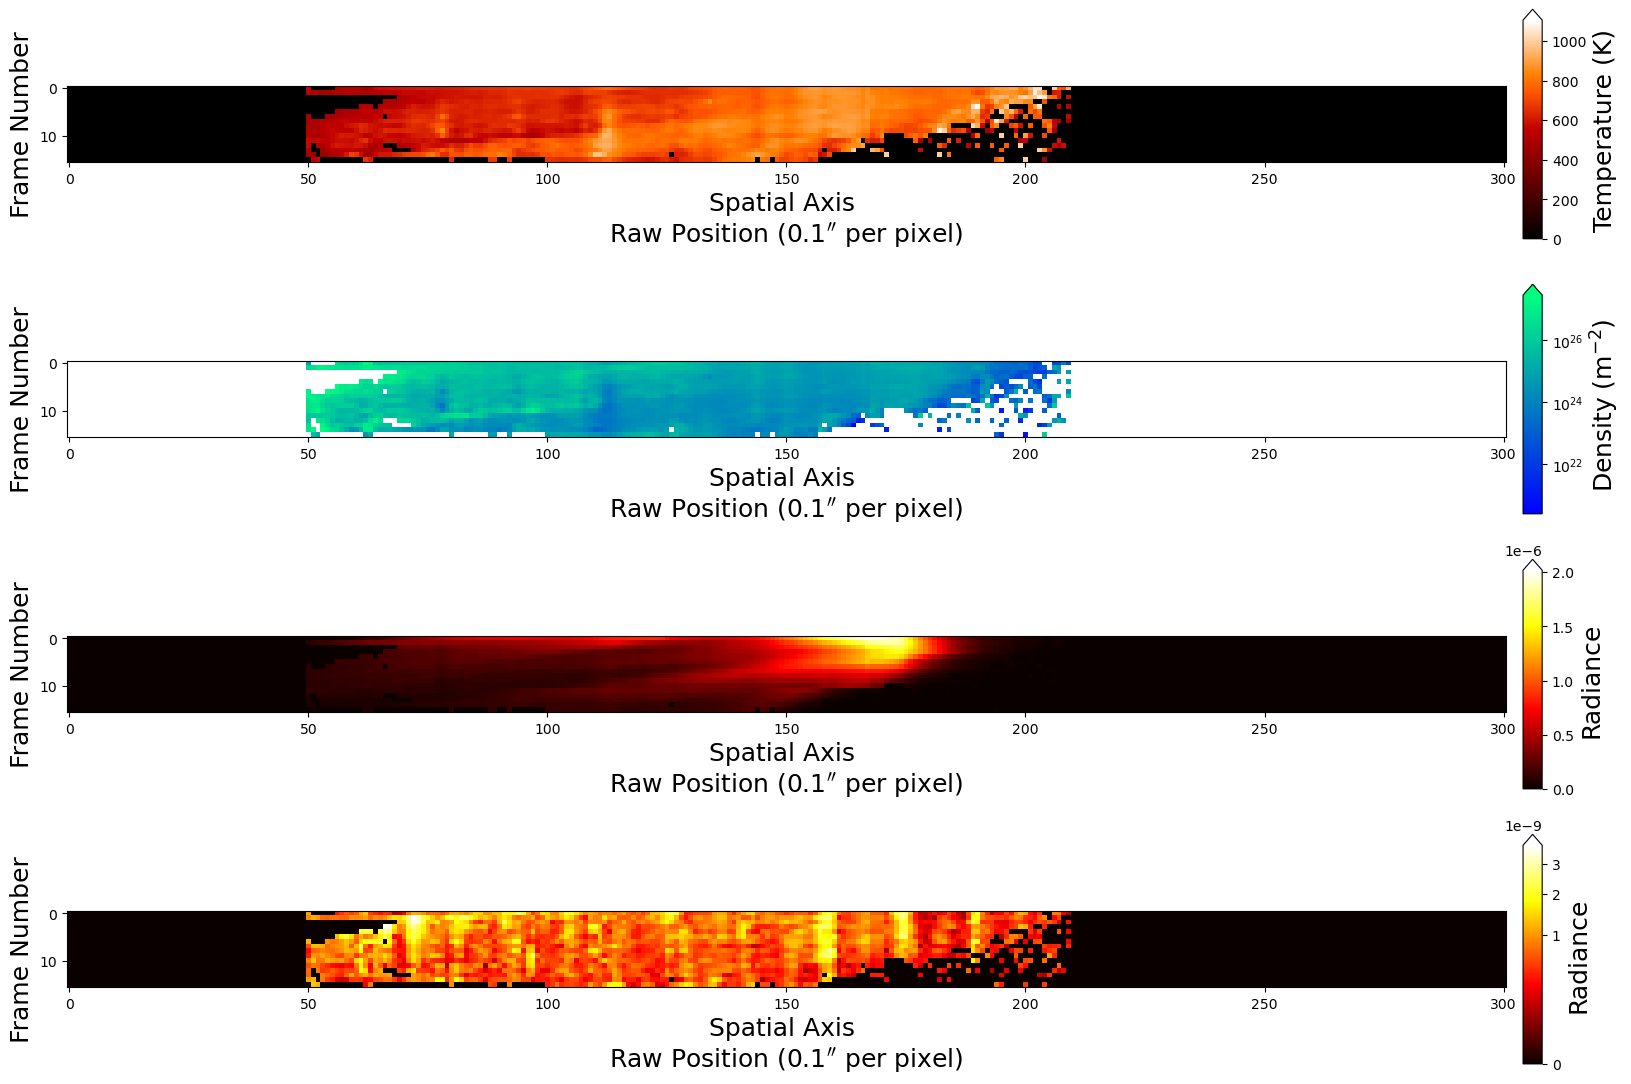

In [17]:
fig = plt.figure(figsize=(18, 11), tight_layout=True)

fig.add_subplot(411)
plt.imshow(h2_temperature_1, cmap="gist_heat", norm=colors.PowerNorm(gamma=1))
plt.xlabel("Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)", fontsize=18)
plt.ylabel("Frame Number", fontsize=18)
# plt.title('a) H$_3^{+}$ - tempensity', loc='left', fontsize=18)
plt.colorbar(extend="max", aspect=12, pad=0.01).set_label(
    label="Temperature (K)", size=18
)

fig.add_subplot(412)
plt.imshow(h2_density_1, cmap="winter", norm=colors.LogNorm())
plt.xlabel("Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)", fontsize=18)
plt.ylabel("Frame Number", fontsize=18)
# plt.title('a) H$_3^{+}$ - tempensity', loc='left', fontsize=18)
plt.colorbar(extend="max", aspect=12, pad=0.01).set_label(
    label="Density (m$^{-2}$)", size=18
)

fig.add_subplot(413)
plt.imshow(h2_radiance_1, cmap="hot", norm=colors.PowerNorm(gamma=1))
plt.xlabel("Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)", fontsize=18)
plt.ylabel("Frame Number", fontsize=18)
# plt.title('a) H$_3^{+}$ - tempensity', loc='left', fontsize=18)
plt.colorbar(extend="max", aspect=12, pad=0.01).set_label(
    label="Radiance", size=18
)

fig.add_subplot(414)
plt.imshow(h2_radiance_errs_1, cmap="hot", norm=colors.PowerNorm(gamma=0.4))
plt.xlabel("Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)", fontsize=18)
plt.ylabel("Frame Number", fontsize=18)
# plt.title('a) H$_3^{+}$ - tempensity', loc='left', fontsize=18)
plt.colorbar(extend="max", aspect=12, pad=0.01).set_label(
    label="Radiance", size=18
)

In [18]:
import h3ppy
import logging

logging.disable(logging.INFO)

centers = [2.12199, 2.4067]
cpos = np.arange(2) * 30 + 15

h2 = h3ppy.h2()

h2_dens_map = []
h2_dens_map_errs = []

h2_temp_map = []
h2_temp_map_errs = []

h2_radiance_map = []
h2_radiance_map_errs = []

wave = wave_to_fit[:60]

print("H3p LOOP START")
# for fn in range(len(spec_dat)):
for fn in range(16,38):
    print()
    print("Frame Number = " + str(fn))
    print()

    density = np.zeros(301)
    density_errs = np.zeros(301)

    temperature = np.zeros(301)
    temperature_errs = np.zeros(301)

    radiance = np.zeros(301)
    radiance_errs = np.zeros(301)

    # offset_0 = np.zeros(301)
    # sigma_0 = np.zeros(301)
    # background_0 = np.zeros(301)

    for i in range(80, 240):
        spec = spec_dat[fn][i][:60]

        condition = np.nanmax(spec[:26]) / np.nanmax(spec[26:52])
        #         print('i = '+str(i)+', '+str(condition))

        if condition > 0.2 and condition < 0.5:
            temp = 600
            dens = 1e26

        if condition >= 0.5 and condition < 0.8:
            temp = 600
            dens = 1e26

        if condition >= 0.8 and condition < 0.98:
            temp = 750
            dens = 1e26

        if condition >= 0.98 and condition < 1.02:
            temp = 800
            dens = 1e25

        if condition >= 1.02 and condition < 1.1:
            temp = 780
            dens = 1e25

        if condition >= 1.1 and condition < 1.3:
            temp = 850
            dens = 1e25

        if condition >= 1.3 and condition < 1.5:
            temp = 900
            dens = 1e25

        if condition > 1.5:
            temp = 1000
            dens = 1e24

        model = h2.model(density=dens, temperature=temp, R=25000, wavelength=wave)

        h2.set(wavelength=wave, data=spec, R=25000, density=dens, temperature=temp)

        fit = h2.fit(params_to_fit=["density", "temperature"])

        rad = np.sum(fit * (wave[1] - wave[0]))
        rad_errs = np.std(spec[27:33] * (wave[1] - wave[0]))

        # rad = np.sum(fit)
        # rad_errs = np.std(spec[27:33])

        vars, errs = h2.get_results()

        xx = range(len(spec))

        if bool(vars) == False:
            print("i = " + str(i) + ", " + str(condition) + ", false fit")
            
        # fig, ax = plt.subplots()
        # ax.plot(xx, spec * 1e3, '-', label = 'Observation')
        # ax.plot(xx, model * 1e3, label = 'Model')
        # ax.plot(xx, fit * 1e3, label = 'H$_2$ fit')
        # ax.set_title('Spatial Row ' + str(i) + ", " + str(condition))
        # ax.set(xlabel = h2.xlabel(), ylabel = h2.ylabel(prefix = 'm'), xticks = cpos)
        # ax.set_xticklabels(centers)
        # ax.legend(frameon = False)

        if bool(vars) == True:
            print(
                "i = "
                + str(i)
                + ", "
                + str(condition)
                + ", dens = "
                + str(vars["density"])
                + ", temp = "
                + str(vars["temperature"])
                + ", rad = "
                + str(rad)
            )

            density[i] = vars["density"]
            density_errs[i] = errs["density"]

            temperature[i] = vars["temperature"]
            temperature_errs[i] = errs["temperature"]

            radiance[i] = rad
            radiance_errs[i] = rad_errs

    h2_dens_map.append(density)
    h2_dens_map_errs.append(density_errs)

    h2_temp_map.append(temperature)
    h2_temp_map_errs.append(temperature_errs)

    h2_radiance_map.append(radiance)
    h2_radiance_map_errs.append(radiance_errs)

print("DONE")

h2_density_2 = np.array(h2_dens_map)
h2_temperature_2 = np.array(h2_temp_map)
h2_density_errs_2 = np.array(h2_dens_map_errs)
h2_temperature_errs_2 = np.array(h2_temp_map_errs)
h2_radiance_2 = np.array(h2_radiance_map)
h2_radiance_errs_2 = np.array(h2_radiance_map_errs)

[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


H3p LOOP START

Frame Number = 16

i = 80, 0.21548312980885123, false fit
i = 81, 1.323505837986933, false fit
i = 82, 1.0678587652989262, false fit
i = 83, 0.8925148332504013, false fit
i = 84, 0.8117484836380517, dens = 3.5696757182622557e+24, temp = 609.8964328968686, rad = 1.4700424219205353e-08
i = 85, 0.48003994561854135, dens = 4.435487842710224e+25, temp = 515.4553088404722, rad = 1.3012849471599937e-08
i = 86, 0.8353223033158821, dens = 3.602809745529209e+23, temp = 749.867524761841, rad = 2.1763286996490825e-08
i = 87, 1.0785513796706263, dens = 2.0637935135187986e+23, temp = 718.7558905650654, rad = 7.520907495721619e-09
i = 88, 0.9451371492670817, dens = 1.0916784300173959e+25, temp = 553.3122929957108, rad = 1.0289805661563216e-08
i = 89, 0.7492366582634523, dens = 4.0040960457447975e+25, temp = 518.7636169978823, rad = 1.3096983508168122e-08
i = 90, 0.7194936384896802, dens = 1.875830374578597e+26, temp = 477.17137014046386, rad = 1.4017622401709613e-08
i = 91, 0.79860048

[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 93, 0.3779266100600491, false fit
i = 94, 0.3083567847146275, false fit
i = 95, 0.45774457282847036, dens = 4.030043641087914e+26, temp = 482.8794903816696, rad = 3.743515555117863e-08
i = 96, 1.0121649924072469, dens = 5.1282763718028525e+23, temp = 751.2306381665285, rad = 3.164079967835164e-08
i = 97, 1.5129383753809946, false fit
i = 98, 1.6517539106645922, dens = 8.210467336585612e+22, temp = 919.2077812895544, rad = 4.2076067514307286e-08
i = 99, 1.2449500564424703, dens = 5.2206393168245155e+23, temp = 779.1704081484125, rad = 4.8886484141996266e-08
i = 100, 1.0747415840270282, dens = 1.1472792192660438e+24, temp = 734.8676123484969, rad = 5.461312778690339e-08
i = 101, 0.9974322636138359, dens = 2.877920234939521e+24, temp = 687.2254965176398, rad = 5.992674295518626e-08
i = 102, 1.0057819476140628, dens = 3.927359223689161e+24, temp = 676.5682415403926, rad = 6.68792809687239e-08
i = 103, 1.0457496733271496, dens = 2.634482553843873e+24, temp = 705.6598694818083, rad = 7.6

[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 80, 0.9786156511013644, false fit
i = 81, 0.8498668762551462, false fit
i = 82, 1.447553272505688, false fit
i = 83, 1.0362599999742799, false fit
i = 84, 0.5512788491556155, false fit
i = 85, 0.7933991825907056, dens = 5.794325846566526e+24, temp = 594.1006610818696, rad = 1.6264261874464427e-08
i = 86, 1.107449446911499, dens = 5.1506846006217946e+23, temp = 703.9153366425534, rad = 1.4515060709775664e-08
i = 87, 1.0612370209523423, dens = 9.353053858703165e+23, temp = 673.4099606576654, rad = 1.4987191950989465e-08
i = 88, 0.8852451322246223, dens = 4.773953560040783e+24, temp = 608.8821729808049, rad = 1.919335679835526e-08
i = 89, 0.7892753474959556, dens = 3.0816022277472806e+25, temp = 543.5090391640143, rad = 2.1806474794881978e-08
i = 90, 0.9788603740150522, dens = 9.868925086966504e+23, temp = 710.3543879074862, rad = 3.113499423364888e-08
i = 91, 1.3692776581406485, dens = 2.1308094077617056e+23, temp = 812.3356871793592, rad = 3.151674266685794e-08
i = 92, 1.06212849709

[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 235, 1.6516910790534667, dens = 3.059476450135181e+23, temp = 844.4462542358904, rad = 6.801700090232933e-08
i = 236, 1.7537676741402628, dens = 1.0480412004016908e+23, temp = 934.8592046772635, rad = 6.285987176139379e-08
i = 237, 1.5011665791801818, dens = 9.869023743348302e+22, temp = 929.4836716015761, rad = 5.611405168926632e-08
i = 238, 1.1428903864110551, false fit
i = 239, 1.0033576447714132, dens = 3.5730182687414734e+23, temp = 785.3357864469323, rad = 3.6534891862274065e-08

Frame Number = 18

i = 80, 0.43638596819413156, false fit
i = 81, 0.8587711943724634, false fit
i = 82, 0.9647389626854467, dens = 2.222851493262858e+24, temp = 633.7764630318359, rad = 1.57561299955051e-08
i = 83, 1.1286185095745722, dens = 1.1012674897287786e+23, temp = 821.9459358754548, rad = 1.8464909403805055e-08
i = 84, 0.8528403631777437, dens = 2.568403860893754e+24, temp = 641.6493699176244, rad = 2.158152533951422e-08
i = 85, 0.8727768688052141, dens = 6.14872651842825e+24, temp = 599.3597

[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 80, 0.2604180667928174, false fit
i = 81, 0.5194713678336401, dens = 8.007919890675682e+25, temp = 505.4569108141013, rad = 1.676712035615218e-08
i = 82, 0.5414674498366493, dens = 3.6313506168852513e+25, temp = 534.0970161037478, rad = 1.9321977729832415e-08
i = 83, 0.5814732904389593, dens = 1.3731468782265409e+25, temp = 580.2539517821109, rad = 2.707329481475374e-08
i = 84, 0.5424934870172965, dens = 3.1934061151279058e+25, temp = 559.275692086583, rad = 3.565911947815744e-08
i = 85, 0.7060520585931981, dens = 1.2683770979416231e+25, temp = 599.9127811206073, rad = 4.109185874003348e-08
i = 86, 1.0241838696838728, dens = 2.3566358361130915e+24, temp = 683.5183081328248, rad = 4.578907088817056e-08
i = 87, 1.0206819047295983, dens = 2.3377346953086606e+24, temp = 692.877858509845, rad = 5.402088027276351e-08
i = 88, 0.9903184562819902, dens = 2.994053333859629e+24, temp = 690.9294990680346, rad = 6.676081921533677e-08
i = 89, 1.0398051679175389, dens = 2.8761404152768205e+24, te

[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 235, 1.4542298823090418, dens = 1.7601013991246774e+24, temp = 833.4921070337627, rad = 3.417529845304207e-07
i = 236, 1.4622951780584714, dens = 1.65882235103445e+24, temp = 842.8348768685978, rad = 3.61592893941224e-07
i = 237, 1.4199297416297672, dens = 1.9853646654209677e+24, temp = 833.618529929799, rad = 3.861024283274097e-07
i = 238, 1.4123865009400893, dens = 1.9647057185427654e+24, temp = 837.0292911196997, rad = 3.9868638798995287e-07
i = 239, 1.4115631124882815, dens = 1.756180712582778e+24, temp = 846.9932014274636, rad = 4.027037148267057e-07

Frame Number = 23

i = 80, 0.44047214449774397, false fit
i = 81, 0.4450458989645635, false fit
i = 82, 0.48572585129235196, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 83, 0.5299493386389469, dens = 1.6661925595101587e+27, temp = 496.7738736250205, rad = 2.5744676963325146e-07
i = 84, 0.5333072401581738, dens = 2.0313846585930347e+27, temp = 492.04915494544315, rad = 2.648485005759646e-07
i = 85, 0.5265276051623565, dens = 2.908856931281326e+27, temp = 482.63966409184155, rad = 2.6777329981178375e-07
i = 86, 0.5295752973725254, dens = 3.5652897319852305e+27, temp = 476.90974434520786, rad = 2.637490132755353e-07
i = 87, 0.542849092300909, false fit
i = 88, 0.5569157372067968, false fit
i = 89, 0.5586274900325191, false fit
i = 90, 0.5556506940950214, false fit
i = 91, 0.5980961640397102, dens = 9.144731649516787e+26, temp = 512.9766713265207, rad = 2.4706782627013713e-07
i = 92, 0.5960344736121425, dens = 9.911941499843266e+26, temp = 510.5111604276543, rad = 2.465265759714604e-07
i = 93, 0.5759037827447129, dens = 1.0267112628254088e+27, temp = 511.0357475054402, rad = 2.599135671903181e-07
i = 94, 0.5477084906427835, dens = 1.3994359507948295e+

[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 239, 1.2256130331009183, false fit

Frame Number = 24

i = 80, 0.3882988955342711, false fit
i = 81, 0.3880367311790742, false fit
i = 82, 0.41033663530664627, false fit
i = 83, 0.46048844697227476, false fit
i = 84, 0.4949849513152843, false fit
i = 85, 0.5052701588211135, false fit
i = 86, 0.5434049322214098, false fit
i = 87, 0.5556034080775489, false fit
i = 88, 0.5611062281003232, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 89, 0.5460620676417364, false fit
i = 90, 0.5381750742900218, false fit
i = 91, 0.547474089317462, false fit
i = 92, 0.6003795440055117, dens = 8.133647173125765e+26, temp = 511.1766024362539, rad = 2.0688256076374232e-07
i = 93, 0.6353242907900071, dens = 3.662970615525765e+26, temp = 536.8487990610774, rad = 2.1206447622789034e-07
i = 94, 0.6439075918431666, dens = 2.3899906141847494e+26, temp = 551.7405813758731, rad = 2.1530041895395731e-07
i = 95, 0.6499744098695542, dens = 2.837203475760407e+26, temp = 546.5718782994044, rad = 2.19824930546564e-07
i = 96, 0.6756952652950994, dens = 2.968898332312639e+26, temp = 545.1519271892447, rad = 2.2058727540522613e-07
i = 97, 0.6939534202137118, dens = 2.848231773834327e+26, temp = 546.7164078217028, rad = 2.216201821976845e-07
i = 98, 0.7019662741093617, dens = 2.384291934824683e+26, temp = 554.3696367628746, rad = 2.316529678907731e-07
i = 99, 0.7228332755316705, dens = 1.5937351659941095e+26, temp = 569.9671371171254, rad = 2.390231

[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 237, 1.173085997962996, dens = 1.3188611846919054e+24, temp = 812.7819796765299, rad = 1.9622493138478694e-07
i = 238, 1.135541377284045, dens = 1.755231244381043e+24, temp = 791.7559244033522, rad = 1.964018669272748e-07
i = 239, 1.2174110309411221, dens = 2.8253133654576656e+24, temp = 761.2044937606515, rad = 2.0304051317352643e-07

Frame Number = 25

i = 80, 0.3525637007221123, false fit
i = 81, 0.3565661070876488, false fit
i = 82, 0.3965947177994271, false fit
i = 83, 0.44579357024458516, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 84, 0.4427608716889257, false fit
i = 85, 0.42025226014284267, false fit
i = 86, 0.4401788009342964, false fit
i = 87, 0.49445476207030037, false fit
i = 88, 0.5397308520830553, dens = 1.3267943122061293e+27, temp = 490.09275837827545, rad = 1.6108457297647168e-07
i = 89, 0.5591270802093545, dens = 9.412098183466607e+26, temp = 499.35277230620284, rad = 1.5933887674348322e-07
i = 90, 0.553131049271597, dens = 1.0286043881151961e+27, temp = 497.0201066830249, rad = 1.603303928146209e-07
i = 91, 0.5631111312741047, dens = 1.035537609698786e+27, temp = 498.33320423766264, rad = 1.691084151149239e-07
i = 92, 0.5942704315509226, dens = 7.321894825846941e+26, temp = 510.0587707081582, rad = 1.793478708758324e-07
i = 93, 0.6821315732675034, dens = 1.4383106859048654e+26, temp = 563.0105302339472, rad = 1.7826824494943595e-07
i = 94, 0.744558574920507, dens = 3.870339000151048e+25, temp = 613.0382926915122, rad = 1.7160658451603125e-07
i = 95, 0.7227573577191884, dens = 7.232974336884409e+

[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 234, 1.1318507072853297, dens = 1.9324594651290611e+24, temp = 766.5068184219544, rad = 1.503573383794479e-07
i = 235, 1.2799540429058596, dens = 8.567100582869978e+23, temp = 827.8044189664137, rad = 1.548276340273226e-07
i = 236, 1.2177947176931376, dens = 1.2359449882734107e+24, temp = 800.1318686962738, rad = 1.5520463084023956e-07
i = 237, 1.0061476689051454, dens = 2.0218596568872554e+24, temp = 763.3860915306016, rad = 1.501482732317849e-07
i = 238, 0.8976182793952324, dens = 3.929659373829711e+24, temp = 720.8559223451457, rad = 1.4838180292439562e-07
i = 239, 0.9209890722147044, dens = 3.875789043089123e+24, temp = 719.1729708873312, rad = 1.4224412192125045e-07

Frame Number = 26

i = 80, 0.4143961057629408, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 81, 0.43989559766638553, false fit
i = 82, 0.4972844061464854, false fit
i = 83, 0.4998754139565657, false fit
i = 84, 0.4535515833701552, false fit
i = 85, 0.4216022686161526, false fit
i = 86, 0.4375476252359804, false fit
i = 87, 0.4938013498533888, false fit
i = 88, 0.5445600146694305, dens = 1.1417153887329653e+27, temp = 492.3888301731866, rad = 1.506996527526693e-07
i = 89, 0.568422179941605, dens = 9.685311342887877e+26, temp = 496.59053507777264, rad = 1.486754668171312e-07
i = 90, 0.6002134845252027, dens = 8.024007817695851e+26, temp = 502.37021867466365, rad = 1.509848492019441e-07
i = 91, 0.5916816211734965, dens = 1.1800880988448935e+27, temp = 490.99496014314894, rad = 1.4807108497789974e-07
i = 92, 0.6186345607173267, dens = 7.068398973766743e+26, temp = 507.3248594990423, rad = 1.577843229575493e-07
i = 93, 0.8055370031593491, dens = 4.457013267315821e+25, temp = 600.9049581288507, rad = 1.4793187330295888e-07
i = 94, 0.8269736497379035, dens = 7.211487216956833e+2

[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 236, 1.2318277997705391, dens = 2.5624044679404427e+24, temp = 738.578222992935, rad = 1.2949915335444113e-07
i = 237, 1.0766628017647357, dens = 2.509148384664065e+24, temp = 738.308319448704, rad = 1.262593970541234e-07
i = 238, 0.935278439224375, dens = 2.90752159866831e+24, temp = 725.0485247612525, rad = 1.1777843874281479e-07
i = 239, 0.8948731122055908, dens = 4.5215268806129796e+24, temp = 696.3260446993364, rad = 1.1124359240404726e-07

Frame Number = 27

i = 80, 0.3841229722930614, false fit
i = 81, 0.3926798302469445, false fit
i = 82, 0.4042066505051227, false fit
i = 83, 0.4060528484377527, false fit
i = 84, 0.4159829315894571, false fit
i = 85, 0.47672906759988126, false fit
i = 86, 0.5301412718247583, false fit
i = 87, 0.5848402054726909, dens = 1.0810075863175192e+27, temp = 496.29311740667214, rad = 1.6419108960860384e-07
i = 88, 0.6162890594352884, dens = 6.908143796971808e+26, temp = 510.25292187827375, rad = 1.703262132729327e-07
i = 89, 0.6252856197765558, dens

[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 116, 0.8043667386455381, false fit
i = 117, 0.8054596900375661, false fit
i = 118, 0.8144228662311435, dens = 1.190559345941263e+26, temp = 565.3498517577921, rad = 1.5741413522677306e-07
i = 119, 0.7879831207233522, dens = 1.0057385519750717e+26, temp = 571.288323766563, rad = 1.5631708279190674e-07
i = 120, 0.7979246113039515, dens = 6.922780714137335e+25, temp = 585.3993108695564, rad = 1.5594075784760962e-07
i = 121, 0.8587294506460134, dens = 5.672736334980587e+25, temp = 593.5962353916835, rad = 1.572392774112785e-07
i = 122, 0.8384063766698406, dens = 5.532650768502048e+25, temp = 595.3428702632449, rad = 1.601684589786343e-07
i = 123, 0.8087954762078797, dens = 7.995922394537915e+25, temp = 581.3037529987153, rad = 1.620243125779527e-07
i = 124, 0.8171580355818394, dens = 8.093071939131653e+25, temp = 581.3052202501844, rad = 1.6399915367778942e-07
i = 125, 0.7913203227597072, dens = 9.474886167386404e+25, temp = 574.8982156396435, rad = 1.622097116740422e-07
i = 126, 0.734

[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 202, 1.1674079815592753, dens = 2.1322722180822952e+24, temp = 778.2620278422113, rad = 1.970726361684021e-07
i = 203, 1.1377825322546329, dens = 2.370083706498791e+24, temp = 769.1922955322839, rad = 1.9189552519760046e-07
i = 204, 0.944460709635351, dens = 5.568308768254731e+24, temp = 712.2663254297205, rad = 1.8158740118890033e-07
i = 205, 0.7894761868021853, false fit
i = 206, 0.8775909977974955, dens = 2.0849029341646206e+25, temp = 644.6474796084714, rad = 1.8670695716640302e-07
i = 207, 1.1206131977390072, dens = 6.429366667301413e+24, temp = 705.1415984387759, rad = 1.8515206978964734e-07
i = 208, 1.1622419619145443, dens = 4.1857462463495335e+24, temp = 726.3593335903108, rad = 1.7329401649268542e-07
i = 209, 1.0648817495770637, dens = 6.106221101072206e+24, temp = 703.7133365075828, rad = 1.7146445753186474e-07
i = 210, 1.0815909021601775, dens = 4.4419030427245986e+24, temp = 722.34664248523, rad = 1.719835882019827e-07
i = 211, 1.144274601242806, dens = 3.0176196921870

[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 217, 1.2145882236993837, dens = 2.575985292135909e+24, temp = 743.9583499363822, rad = 1.4183339661967308e-07
i = 218, 1.1813801016834646, dens = 2.453642007422314e+24, temp = 746.4048633762652, rad = 1.4040689407089725e-07
i = 219, 1.0668979731875665, dens = 2.8623603480880887e+24, temp = 736.3021371173745, rad = 1.3945437586762613e-07
i = 220, 1.043661056624084, dens = 2.564625634284055e+24, temp = 743.488653755696, rad = 1.4016253565758952e-07
i = 221, 1.1264955134227332, false fit
i = 222, 1.1216649084451884, dens = 3.5652486984311314e+23, temp = 880.2773889232336, rad = 1.204609605814521e-07
i = 223, 1.1830692156505218, dens = 1.991798421699688e+22, temp = 853.9142466765603, rad = 4.963436260212016e-09
i = 224, 1.1313876038221897, dens = 3.9881553562524055e+23, temp = 867.3872800560366, rad = 1.1639062860263276e-07
i = 225, 1.1128100314705403, dens = 1.8959543159910205e+24, temp = 753.7108267631977, rad = 1.2154659964316808e-07
i = 226, 1.014967801892953, dens = 4.932776767133

[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 228, 0.8590679867307792, dens = 1.1687801121656625e+25, temp = 649.9714247527994, rad = 1.1702654989364664e-07
i = 229, 0.9962470267360736, dens = 4.745632483192172e+24, temp = 697.9745804305774, rad = 1.2028251577780148e-07
i = 230, 1.1025845556160543, dens = 3.098564757713667e+24, temp = 722.0269096849959, rad = 1.193290069999398e-07
i = 231, 1.1234766297511913, dens = 2.860543158991206e+24, temp = 725.6968603227601, rad = 1.1713273194773669e-07
i = 232, 1.0771871392355519, dens = 4.014911047131457e+24, temp = 705.5693420565224, rad = 1.1649568419353142e-07
i = 233, 1.0522801319772614, dens = 5.66730590921559e+24, temp = 688.6370333219297, rad = 1.2113859611446967e-07
i = 234, 1.1298475069300464, dens = 4.5732413160101365e+24, temp = 701.2567690886744, rad = 1.229334587153136e-07
i = 235, 1.2494595144468592, dens = 3.042648913724641e+24, temp = 726.5620999266226, rad = 1.2639328361881615e-07
i = 236, 1.2225604599236697, dens = 3.159588239121373e+24, temp = 723.6709456260545, rad 

[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 80, 0.41231664842764215, false fit
i = 81, 0.4325129270468776, false fit
i = 82, 0.4122103399986264, false fit
i = 83, 0.4045790544331519, false fit
i = 84, 0.41625809637898226, false fit
i = 85, 0.45779676609684056, false fit
i = 86, 0.4614968631471104, false fit
i = 87, 0.5275692112770806, dens = 1.324983766899012e+27, temp = 486.62539393000276, rad = 1.415770923538248e-07
i = 88, 0.5720189282372344, dens = 7.715953701074113e+26, temp = 503.0184739456341, rad = 1.484987673875036e-07
i = 89, 0.5752460468983197, dens = 1.0311551089864555e+27, temp = 494.8043692508952, rad = 1.4849459573452555e-07
i = 90, 0.6110600387505695, dens = 6.902537085696784e+26, temp = 507.4961985782698, rad = 1.549857303553675e-07
i = 91, 0.6050253089630747, dens = 9.026862016856524e+26, temp = 500.08472896637915, rad = 1.5680467461382976e-07
i = 92, 0.6103168031120266, dens = 7.204244403058566e+26, temp = 507.35567148414594, rad = 1.6098631741669748e-07
i = 93, 0.6277849119006422, dens = 1.859578934769492

[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 217, 1.1082112671067028, dens = 1.2308402413527593e+24, temp = 781.4249498772622, rad = 1.1904471742776903e-07
i = 218, 1.067306890908974, dens = 1.463633530362653e+24, temp = 769.7780856574922, rad = 1.1953309190727348e-07
i = 219, 1.0157607696812117, dens = 1.812372049962682e+24, temp = 754.9090618314889, rad = 1.1834806860751239e-07
i = 220, 1.1208783629170473, dens = 3.9009588279765456e+24, temp = 710.9808064287207, rad = 1.2441461070408018e-07
i = 221, 1.2272465862821855, dens = 1.0020570569772405e+24, temp = 791.6263781790142, rad = 1.1192333256942518e-07
i = 222, 1.307558020135696, false fit
i = 223, 1.2755010982003523, dens = 1.7661243079998493e+22, temp = 853.2220604215946, rad = 4.364886144485001e-09
i = 224, 1.0828886630777796, dens = 1.877109530518137e+24, temp = 742.3982920529347, rad = 1.008300362042578e-07
i = 225, 1.0300804611637484, dens = 2.4369187790320863e+24, temp = 729.1492606816803, rad = 1.0565424953182882e-07
i = 226, 0.9536666302781572, dens = 3.4542707448

[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 83, 0.5211357023018073, dens = 9.102283599111445e+26, temp = 493.84110506829455, rad = 1.2661771097025936e-07
i = 84, 0.4904737505854903, dens = 1.431491177886836e+27, temp = 480.3275309362237, rad = 1.207231724813032e-07
i = 85, 0.5134863124368948, dens = 1.0143534785068117e+27, temp = 489.81563970395973, rad = 1.2190895003562466e-07
i = 86, 0.48683925628054353, dens = 1.6044339730207872e+27, temp = 477.34111893836916, rad = 1.2068256020417199e-07
i = 87, 0.5112412954594296, dens = 1.0972374102405476e+27, temp = 487.5797225706789, rad = 1.214586229067125e-07
i = 88, 0.5406787368441113, dens = 6.1805846618680585e+26, temp = 503.52434510327026, rad = 1.2105585807998411e-07
i = 89, 0.5761155221988893, dens = 3.861707427510355e+26, temp = 517.7214814938066, rad = 1.2207635668730014e-07
i = 90, 0.6294359028451639, dens = 2.9363386449954094e+26, temp = 526.9141637625111, rad = 1.2483161775339843e-07
i = 91, 0.657156492085757, dens = 3.080074978345522e+26, temp = 526.2324035781272, rad =

[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 135, 0.8620056604885, dens = 2.6705125762713786e+25, temp = 604.0033297671969, rad = 9.554566986740469e-08
i = 136, 0.8684612128974353, dens = 2.8176711583967988e+25, temp = 603.1070909653073, rad = 9.865331371811725e-08
i = 137, 0.829577649678936, dens = 4.1565392518292716e+25, temp = 586.1204424420135, rad = 9.537564926819176e-08
i = 138, 0.7524199060034839, dens = 1.42140860362201e+26, temp = 540.0900017660622, rad = 9.079143838089185e-08
i = 139, 0.6250229553545202, dens = 7.036050604425593e+26, temp = 491.19847694717953, rad = 8.894144815438312e-08
i = 140, 0.6143262964670787, dens = 6.050136417178242e+26, temp = 494.45931706427046, rad = 8.605373811216038e-08
i = 141, 0.7500627095161836, dens = 7.996579959252037e+25, temp = 554.0744938220088, rad = 7.703927697252898e-08
i = 142, 0.8114612632158414, dens = 3.452538029544467e+24, temp = 682.1968620050282, rad = 6.543474708606516e-08
i = 143, 0.7432992969741308, false fit
i = 144, 0.6784976476145742, dens = 1.887943293885645e+26

[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 190, 1.0781431219535047, dens = 3.462103589712862e+24, temp = 728.157716001883, rad = 1.476669114808406e-07
i = 191, 1.0941940863269783, dens = 1.9571767507608822e+24, temp = 768.5072743469518, rad = 1.5686771964421444e-07
i = 192, 1.0991109634729896, dens = 1.5859104855965957e+24, temp = 786.4570012737474, rad = 1.6475313534308517e-07
i = 193, 1.0883530971999484, dens = 1.4257861048513482e+24, temp = 792.9223590398518, rad = 1.6214623026148822e-07
i = 194, 1.0995693175685028, dens = 1.3243132342673814e+24, temp = 794.671749518877, rad = 1.5429919501140966e-07
i = 195, 1.1182175845676778, dens = 1.2543538156919967e+24, temp = 795.331625361669, rad = 1.474853218657366e-07
i = 196, 1.0888778152817848, dens = 1.0179415400668618e+24, temp = 808.5117523122059, rad = 1.4311366814901806e-07
i = 197, 1.0181116901803178, dens = 8.234554847685388e+23, temp = 822.7286986035504, rad = 1.3946725161540459e-07
i = 198, 0.9643371138413762, dens = 1.1415008706129145e+24, temp = 794.5927537721045, r

[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 205, 0.7209785750114841, false fit
i = 206, 0.7169718793388127, false fit
i = 207, 0.8871281084730765, dens = 5.371382489203104e+24, temp = 691.2699687780687, rad = 1.2052131269168167e-07
i = 208, 1.0243613727965766, dens = 2.3516950680241223e+24, temp = 735.8017293317389, rad = 1.1365210080345486e-07
i = 209, 0.9839239992154856, dens = 2.965866560662613e+24, temp = 720.3415896487638, rad = 1.1102187228318872e-07
i = 210, 0.9701320049586422, dens = 2.322239195151522e+24, temp = 736.3222580889189, rad = 1.1317637363677752e-07
i = 211, 0.959661784777867, dens = 2.5108115057882034e+24, temp = 727.5511447608562, rad = 1.0602363911853933e-07
i = 212, 0.9800115965894719, dens = 2.444632530659339e+24, temp = 729.8767231804616, rad = 1.0726505780982406e-07
i = 213, 1.0419442450611747, dens = 1.220770895860658e+24, temp = 775.115138657586, rad = 1.0780260511566785e-07
i = 214, 1.0543772639573092, dens = 8.050335149946845e+23, temp = 801.3045695586654, rad = 1.0271823110591501e-07


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 215, 0.9645957492173046, dens = 1.5167439975454454e+24, temp = 754.3992007616029, rad = 9.827099691392767e-08
i = 216, 0.9696444887092591, dens = 1.630965689094868e+24, temp = 749.3108408960461, rad = 9.76706339875212e-08
i = 217, 1.011754724358768, dens = 1.9135045648682862e+24, temp = 734.9843039189868, rad = 9.12597017339449e-08
i = 218, 1.0721374427565884, dens = 1.2582321112409906e+24, temp = 759.8816263286442, rad = 8.863258354039042e-08
i = 219, 0.9566202523989468, dens = 2.207642128184363e+24, temp = 722.3018994391955, rad = 8.541224544922571e-08
i = 220, 0.979478050718373, dens = 1.869906131010636e+24, temp = 730.3607193106491, rad = 8.27022816265262e-08
i = 221, 0.8961336553551872, dens = 1.2782447014812575e+24, temp = 751.3051076768232, rad = 7.89570468164541e-08
i = 222, 1.0014483533207985, false fit
i = 223, 1.2232882851220352, false fit
i = 224, 1.3099782026261493, false fit
i = 225, 1.069329539678854, dens = 1.3320179903767218e+24, temp = 750.6842967395104, rad = 8.1

[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 238, 0.756215272164148, false fit
i = 239, 0.7719795530443702, dens = 2.9101259507711514e+25, temp = 586.6881077978799, rad = 6.775200533663109e-08

Frame Number = 30

i = 80, 0.41384097124816804, false fit
i = 81, 0.4119779074921576, false fit
i = 82, 0.3918949880367565, dens = 6.664282742902926e+27, temp = 437.9434608600854, rad = 9.591437376524847e-08
i = 83, 0.37476829256883326, dens = 2.9672797312966485e+24, temp = 891.7576960508194, rad = 1.1380654337774386e-06
i = 84, 0.3739492988361506, dens = 2.0887200671349148e+24, temp = 926.1407381252394, rad = 1.148444754960591e-06


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 85, 0.4283524918944245, false fit
i = 86, 0.4773304062749496, false fit
i = 87, 0.4992599716016951, false fit
i = 88, 0.5026842564297507, dens = 1.2297001458836983e+27, temp = 479.2485522029051, rad = 9.952298201218856e-08
i = 89, 0.5080240118884921, dens = 1.0151232600546485e+27, temp = 484.6740298977217, rad = 1.0086457873263496e-07
i = 90, 0.5453184040514778, dens = 8.339276995723568e+26, temp = 490.7569875314447, rad = 1.0373274164401169e-07


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 91, 0.5428229107141187, dens = 1.3197779799134685e+27, temp = 479.8537231229072, rad = 1.0931035655290221e-07
i = 92, 0.5464333924764232, dens = 1.0506426000064729e+27, temp = 486.85653367145636, rad = 1.1322958491246194e-07
i = 93, 0.7175957111022963, dens = 3.510549884132339e+25, temp = 592.5049813109049, rad = 9.468787777463131e-08
i = 94, 0.7303963771992156, false fit
i = 95, 0.6509423315219159, dens = 3.285474100795574e+25, temp = 595.4156199314502, rad = 9.528530074361324e-08
i = 96, 0.6273784006247778, dens = 4.0869464914451126e+26, temp = 514.5531621104011, rad = 1.1637088123928588e-07
i = 97, 0.6239416370948919, dens = 7.004565471421217e+26, temp = 500.68797037846304, rad = 1.2427903139511125e-07
i = 98, 0.6154710422371167, dens = 4.446073774133524e+26, temp = 514.059626101744, rad = 1.2453728530035068e-07
i = 99, 0.5742969557384554, dens = 2.6176289141213184e+26, temp = 530.3130026296287, rad = 1.2384358328018556e-07
i = 100, 0.5742487251455027, dens = 3.4087476091495944e

[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 108, 0.7190654377322792, dens = 5.664303995801846e+26, temp = 501.8658043564874, rad = 1.0472560851530768e-07
i = 109, 0.6809272667156093, dens = 2.4232219447684015e+26, temp = 525.714251543617, rad = 9.916791634517322e-08
i = 110, 0.6576395740379701, dens = 1.0599606231557618e+26, temp = 553.8120252971266, rad = 1.0135163368500516e-07
i = 111, 0.8532847682134377, dens = 9.957760632464994e+24, temp = 649.5872002525298, rad = 9.891029485577659e-08
i = 112, 0.789360737400551, false fit
i = 113, 0.7368168852872863, false fit
i = 114, 1.0018571784705546, dens = 1.4077834929786133e+25, temp = 634.79043240015, rad = 1.0202186075022416e-07
i = 115, 0.7571683064421126, dens = 1.6488178547110104e+26, temp = 536.0764104592563, rad = 9.323032972767256e-08
i = 116, 0.6682056481641945, dens = 1.0759499192260945e+27, temp = 479.37949352716555, rad = 8.751647878781718e-08
i = 117, 0.6758067652144251, dens = 7.09375934750645e+26, temp = 490.7459181850374, rad = 8.82041326850355e-08
i = 118, 0.6525

[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 124, 0.5783291814650866, dens = 8.23554722026738e+26, temp = 486.2991936515619, rad = 8.693928815462191e-08
i = 125, 0.5163351945261908, dens = 1.4053021061149608e+27, temp = 472.4793406359249, rad = 8.747530248348944e-08
i = 126, 0.4358183646541261, false fit
i = 127, 0.36448601234283545, false fit
i = 128, 0.29698748662507995, false fit
i = 129, 0.32078584088724466, false fit
i = 130, 0.4778406962519667, dens = 1.0644906297936919e+27, temp = 476.6757275416037, rad = 7.803902161123885e-08
i = 131, 0.6385690649785853, dens = 2.959600462420617e+26, temp = 512.8445321523091, rad = 7.960872301093694e-08
i = 132, 0.7336553142245967, dens = 1.626370781534375e+26, temp = 530.344275081541, rad = 7.702115964097299e-08
i = 133, 0.7290373905895409, dens = 1.3165809339630328e+26, temp = 534.8865782070582, rad = 7.17770587471642e-08
i = 134, 0.7310263471059721, dens = 4.35825409016627e+25, temp = 571.6582252440687, rad = 6.841644997171467e-08
i = 135, 0.757547825692938, dens = 3.61542384298484

[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 204, 0.7338790615333319, false fit
i = 205, 0.6037754891692613, dens = 5.202735519500522e+25, temp = 574.5599671304582, rad = 8.827210434665134e-08
i = 206, 0.6756308426114718, dens = 5.832038482111357e+25, temp = 570.7694545102993, rad = 8.938490164269275e-08
i = 207, 0.8362790368297398, dens = 2.4118462794366013e+25, temp = 607.5962001557225, rad = 9.404785500466501e-08
i = 208, 0.8683353019788794, dens = 1.208709485194123e+25, temp = 635.5631004357459, rad = 8.90817706138197e-08
i = 209, 0.7946252070929822, dens = 1.405530773710739e+25, temp = 627.3029515710759, rad = 8.634394105623144e-08
i = 210, 0.844453528917474, dens = 9.75575764769224e+24, temp = 642.8126509971929, rad = 8.4031358726877e-08
i = 211, 0.9999732928659889, dens = 7.548678024295756e+24, temp = 658.3825768017819, rad = 8.982494606064977e-08
i = 212, 1.1517162543243966, dens = 3.333408508825701e+24, temp = 703.9524922287405, rad = 9.400003011601536e-08
i = 213, 1.1540951358091422, dens = 2.7657485270954537e+24, t

[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 220, 1.0857847000253416, false fit
i = 221, 0.8657605975758914, false fit
i = 222, 0.8071922451101745, false fit
i = 223, 0.9226008600927446, false fit
i = 224, 1.0663232494650756, dens = 1.2197398736898627e+24, temp = 738.0229714098978, rad = 6.109615109867317e-08
i = 225, 0.9972732046271587, dens = 2.376277758418007e+24, temp = 701.2732983089562, rad = 6.389559203625829e-08
i = 226, 0.8845883363308956, dens = 7.455815341395273e+24, temp = 642.3141076010634, rad = 6.354305214924067e-08
i = 227, 0.618524949477257, dens = 6.859900079100095e+25, temp = 549.8672631166038, rad = 5.853053706421406e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 228, 0.6170511355819307, dens = 7.216956818850932e+25, temp = 545.8035224036998, rad = 5.4664225655144186e-08
i = 229, 0.7877239031956332, dens = 8.009635367517913e+24, temp = 637.4298945031443, rad = 6.147017298149876e-08
i = 230, 0.9938046511553239, dens = 2.426839692309973e+24, temp = 700.3970562338127, rad = 6.42423402320767e-08
i = 231, 0.9207065448401, false fit
i = 232, 0.775060559953319, false fit
i = 233, 0.7762232283854643, dens = 8.327585315718922e+24, temp = 629.9520749026891, rad = 5.4262340262986474e-08
i = 234, 0.9462156882775871, false fit
i = 235, 0.9796637238249052, dens = 3.001392228847475e+24, temp = 677.6133157274518, rad = 5.214379702580123e-08
i = 236, 0.9393343747210314, false fit
i = 237, 0.6650725347824744, dens = 4.437714736206889e+25, temp = 565.3503445435762, rad = 5.86757190826e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 238, 0.6642857611844576, dens = 2.490379644206205e+25, temp = 588.3716037435274, rad = 6.052050239262515e-08
i = 239, 0.764978721277547, dens = 3.423254242378344e+25, temp = 575.6142652441275, rad = 5.973201749465449e-08

Frame Number = 31

i = 80, 0.27787447744423743, false fit
i = 81, 0.33808136804455813, false fit
i = 82, 0.38697948663103426, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 83, 0.36407096527577526, dens = 2.3319177985625595e+28, temp = 410.07109701723044, rad = 8.616630964726581e-08
i = 84, 0.37017565963374655, dens = 1.519262854697342e+28, temp = 418.92663020437806, rad = 8.816352921920292e-08
i = 85, 0.38689020483889197, false fit
i = 86, 0.4284267376621685, false fit
i = 87, 0.47892683852196327, false fit
i = 88, 0.49601203577507835, dens = 1.0635770008241751e+27, temp = 480.8839289784339, rad = 9.161335185427355e-08
i = 89, 0.44938924054210644, false fit
i = 90, 0.4584317306058542, false fit
i = 91, 0.4778610741410897, false fit
i = 92, 0.4921728497971431, dens = 1.4482109482250976e+27, temp = 474.0062633344358, rad = 9.570754755574477e-08
i = 93, 0.7297141815027375, dens = 1.2857910403331687e+26, temp = 542.302541146647, rad = 8.777004210126552e-08
i = 94, 0.7982791371112912, dens = 1.7216267702288588e+25, temp = 614.4164710368276, rad = 7.883055365442633e-08
i = 95, 0.6482168541993921, dens = 6.3177442174985796e+25, temp = 566.0193597324234, rad

[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 114, 0.6678459063622673, dens = 8.215136819631986e+25, temp = 551.3538828255189, rad = 7.318273093535249e-08
i = 115, 0.6046674533801462, dens = 3.3011385525622635e+26, temp = 505.9527765351697, rad = 7.030773394797571e-08
i = 116, 0.6485718153377865, dens = 5.3219492264510636e+26, temp = 492.64282239167693, rad = 7.089574629705762e-08
i = 117, 0.63413396115216, dens = 5.954469868796571e+26, temp = 489.8039839222447, rad = 7.153262077364308e-08
i = 118, 0.5819338782744162, dens = 7.449204763247447e+26, temp = 482.983827307139, rad = 6.946824759894033e-08
i = 119, 0.5234921532784167, dens = 8.857473877451891e+26, temp = 478.0541815197491, rad = 6.847794007642563e-08
i = 120, 0.48654268498274966, dens = 1.1316082925720949e+27, temp = 470.73011086047694, rad = 6.573887269189983e-08
i = 121, 0.5385642525326167, dens = 6.666231926976245e+26, temp = 484.9111622836514, rad = 6.682656084640057e-08
i = 122, 0.5702861606700118, dens = 4.4897990232221314e+26, temp = 496.0842843615922, rad = 6

[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 129, 0.21852117365310778, false fit
i = 130, 0.45828115764348926, dens = 1.6304715314354547e+27, temp = 462.0033399000861, rad = 6.659824547454492e-08
i = 131, 0.6163186812987287, dens = 1.5736511963410785e+26, temp = 528.9583220071833, rad = 7.135640794501284e-08
i = 132, 0.6321252602852055, dens = 2.046621685675322e+26, temp = 520.6055167599749, rad = 7.107938235711708e-08
i = 133, 0.6044075408369366, dens = 2.7595904320578935e+26, temp = 510.56756545463134, rad = 6.876627429015075e-08
i = 134, 0.6784774844037688, dens = 1.0045952467968105e+26, temp = 542.136759243207, rad = 6.823593588738155e-08
i = 135, 0.7375162342307657, dens = 5.410421129093763e+25, temp = 562.8348170214829, rad = 6.67319851438093e-08
i = 136, 0.714154639602608, dens = 6.648605629498158e+25, temp = 554.6150486488118, rad = 6.505150991700569e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 137, 0.7037583164464826, dens = 8.580537136890725e+25, temp = 546.150113065264, rad = 6.56606040584953e-08
i = 138, 0.7046170095045363, dens = 1.3549248668984222e+26, temp = 532.030747312473, rad = 6.762845304862655e-08
i = 139, 0.6712968608323013, dens = 2.5347999574262947e+26, temp = 514.2504822835662, rad = 7.145338738949545e-08
i = 140, 0.6498379491545632, dens = 2.5760201142564093e+26, temp = 515.1104184506202, rad = 7.471741467741983e-08
i = 141, 0.6265515532570286, dens = 5.028178807004805e+25, temp = 567.8220066947011, rad = 7.11406274400716e-08
i = 142, 0.6600599638399938, false fit
i = 143, 0.7045356670148338, false fit
i = 144, 0.7855132081798654, dens = 4.424118353572179e+25, temp = 578.2846123769172, rad = 8.283902541521285e-08
i = 145, 0.809796956680299, dens = 5.217052680355158e+25, temp = 571.8579125342515, rad = 8.233915617709319e-08
i = 146, 0.8164901679873514, dens = 3.1997119503916906e+25, temp = 587.7572078203361, rad = 7.655303347606919e-08
i = 147, 0.81921788

[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 211, 0.869977826913485, dens = 1.6898126089637183e+25, temp = 610.9802837246382, rad = 7.139131487104024e-08
i = 212, 0.9697049045708489, dens = 8.590820593155771e+24, temp = 643.8816611283306, rad = 7.569545703717914e-08
i = 213, 1.0203713618780175, dens = 5.230597176890642e+24, temp = 669.4052594088657, rad = 7.752636902654972e-08
i = 214, 0.9762499847150609, dens = 5.638187450359397e+24, temp = 663.6675139875322, rad = 7.460918927482185e-08
i = 215, 0.9016294978989878, dens = 1.272764446099069e+25, temp = 621.3885102880012, rad = 6.842585491610166e-08
i = 216, 0.9439165750796714, dens = 9.74570806716074e+24, temp = 633.1816734681313, rad = 6.818607512648418e-08
i = 217, 0.9841870118117877, dens = 1.4549026781021848e+24, temp = 724.9661181422823, rad = 5.885465086070557e-08
i = 218, 0.9622537356874866, dens = 6.591261597105484e+24, temp = 645.8806199639022, rad = 6.058198099333982e-08
i = 219, 0.7289685116512543, dens = 1.8964427384272853e+25, temp = 596.5339956823311, rad = 5.65

[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 228, 0.6168228774362332, false fit
i = 229, 0.6691504313727694, dens = 1.1154283336428347e+25, temp = 609.3017422711957, rad = 4.529314349731145e-08
i = 230, 0.8637942461483885, dens = 3.765884036681421e+24, temp = 663.9164685284301, rad = 5.008113675340323e-08
i = 231, 0.8678901557251145, false fit
i = 232, 0.766375771804628, false fit
i = 233, 0.7035181864895227, false fit
i = 234, 0.8050454800611918, dens = 7.144884357786869e+23, temp = 752.2437653355403, rad = 4.4779750353450683e-08
i = 235, 0.815906511326212, false fit
i = 236, 0.7655456020405526, false fit
i = 237, 0.6166670869487766, dens = 3.171912176128361e+25, temp = 572.7435518227704, rad = 5.1266110462117875e-08
i = 238, 0.575249570913167, dens = 4.430508917956938e+25, temp = 556.5758471316514, rad = 4.583977200227693e-08
i = 239, 0.687453816429253, dens = 2.5343006344125162e+25, temp = 575.3425205202057, rad = 4.390275111876586e-08

Frame Number = 32

i = 80, 0.3310403315625236, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 81, 0.4089758480009335, false fit
i = 82, 0.426657471417401, false fit
i = 83, 0.4199616462465682, false fit
i = 84, 0.38218097244765753, false fit
i = 85, 0.3882493208867212, false fit
i = 86, 0.4019908682671738, false fit
i = 87, 0.4484687822922179, false fit
i = 88, 0.4531740958269213, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 89, 0.46313576343619806, dens = 1.1889692563016171e+27, temp = 475.4898300251674, rad = 8.325043679111346e-08
i = 90, 0.4687683397183485, false fit
i = 91, 0.463633874551612, false fit
i = 92, 0.48626528136884556, dens = 1.2859946634893331e+27, temp = 473.8911479361099, rad = 8.460563799280223e-08
i = 93, 0.5702630897395217, dens = 1.1476049690231828e+26, temp = 539.4566931140624, rad = 7.191452615966719e-08
i = 94, 0.5564245704528977, dens = 1.5767879150834116e+25, temp = 609.9120282083722, rad = 6.495828050411444e-08
i = 95, 0.5439574398651782, dens = 1.07476212065869e+26, temp = 541.5500666254648, rad = 7.173029349043013e-08
i = 96, 0.5984616348712153, dens = 4.9281838155698894e+26, temp = 498.90445811358734, rad = 8.212121378612795e-08
i = 97, 0.5691181475332633, dens = 5.730960622112223e+26, temp = 495.3740261817877, rad = 8.423293504113975e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 98, 0.5222265216182252, false fit
i = 99, 0.4235015088122153, false fit
i = 100, 0.44312762640663655, dens = 6.952199616890874e+26, temp = 486.6790043849946, rad = 7.443347862830563e-08
i = 101, 0.45166873019835324, dens = 8.149855102163364e+26, temp = 481.6569819881071, rad = 7.22885668139713e-08
i = 102, 0.4784376098633757, dens = 7.900963221856773e+26, temp = 482.55328357943046, rad = 7.249537069044833e-08
i = 103, 0.5009759459087916, dens = 6.600495157355335e+26, temp = 487.5295447742595, rad = 7.292877247883254e-08
i = 104, 0.5405672088524106, dens = 3.587532521065737e+26, temp = 504.9841859624059, rad = 7.390351899076681e-08
i = 105, 0.5803335911088112, dens = 2.4122476251925667e+26, temp = 517.0814263208674, rad = 7.466985916516085e-08
i = 106, 0.5839219592972296, dens = 3.459328517201249e+26, temp = 505.57885937797363, rad = 7.273638485732301e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 107, 0.5576719110386265, dens = 8.259035092597124e+26, temp = 479.3398439133462, rad = 6.707629764881964e-08
i = 108, 0.6188008425425007, dens = 9.92449349075732e+26, temp = 472.2019959242451, rad = 6.110602938747062e-08
i = 109, 0.49788301432214743, dens = 3.0985532395064067e+26, temp = 501.915118706218, rad = 5.738684677568876e-08
i = 110, 0.5040153207859488, dens = 4.60933801942862e+25, temp = 562.8173801933805, rad = 5.682390055165378e-08
i = 111, 0.696910138570551, false fit
i = 112, 1.1491414620558487, dens = 1.0016910458811807e+24, temp = 752.013210319047, rad = 6.255641142496247e-08
i = 113, 0.9468408713609586, dens = 2.754660904742197e+24, temp = 700.0930084963946, rad = 7.252485150074512e-08
i = 114, 0.7527923334941959, dens = 4.291318850432119e+25, temp = 573.3980893459452, rad = 7.05850234467412e-08
i = 115, 0.5696722608431518, dens = 4.044367781571694e+26, temp = 499.8701127451533, rad = 6.972612327834077e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 116, 0.5581907243286456, false fit
i = 117, 0.6167302425150759, dens = 6.074175902923996e+26, temp = 486.6463813136674, rad = 6.49542671193344e-08
i = 118, 0.587089679652851, dens = 4.285065346180018e+26, temp = 494.8606415837113, rad = 6.183298413887501e-08
i = 119, 0.5368004555395015, dens = 7.503391266104155e+26, temp = 479.3938084523684, rad = 6.10650579696684e-08
i = 120, 0.4696840861317555, dens = 1.619131128412778e+27, temp = 458.88484328212286, rad = 5.812563572200947e-08
i = 121, 0.5375768024092131, dens = 8.625252344820083e+26, temp = 473.761964236343, rad = 5.645959354750871e-08
i = 122, 0.6403778278162453, dens = 1.2998816538449774e+26, temp = 527.0008038566061, rad = 5.5413297390360785e-08
i = 123, 0.6393338899958004, dens = 1.352256579373e+26, temp = 525.8953448701437, rad = 5.565932290359607e-08
i = 124, 0.6282535026491585, dens = 2.1093678656122247e+26, temp = 514.7012044556928, rad = 6.035769774963321e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 125, 0.5638337284050672, dens = 8.492001299128385e+26, temp = 477.89730016133547, rad = 6.525764140415919e-08
i = 126, 0.4412967283631513, false fit
i = 127, 0.33150704218889226, false fit
i = 128, 0.28039336588112634, false fit
i = 129, 0.37098129279576036, false fit
i = 130, 0.5097530991354008, dens = 6.896035507461568e+26, temp = 480.15579023455086, rad = 5.777781292867952e-08
i = 131, 0.7049666517195494, dens = 1.2116314376467843e+26, temp = 534.0218906390332, rad = 6.432023914398782e-08
i = 132, 0.7346999746215135, dens = 1.3398256513282165e+26, temp = 531.1837249513621, rad = 6.513541143251434e-08
i = 133, 0.6959073017198315, dens = 1.4051190576155298e+26, temp = 529.2555485506825, rad = 6.431200245875443e-08
i = 134, 0.6359277986676783, dens = 1.3531835025793893e+26, temp = 530.1941172626465, rad = 6.378339222224317e-08
i = 135, 0.6920031355730798, dens = 6.621143821796608e+25, temp = 554.3114876499707, rad = 6.422266436726703e-08
i = 136, 0.757595625283381, dens = 6.3831664

[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 146, 0.8173528788060026, dens = 5.563512960461593e+25, temp = 565.7534807719708, rad = 7.438103556577282e-08
i = 147, 0.9521828549897369, dens = 1.2556808589903775e+25, temp = 626.3023226122118, rad = 7.543093347840866e-08
i = 148, 0.9640532708761347, dens = 5.823802324968731e+24, temp = 662.8673372183674, rad = 7.584437450240701e-08
i = 149, 0.818455128792628, dens = 9.783137950529348e+24, temp = 637.4061940200417, rad = 7.504249188425647e-08
i = 150, 0.7176154151750229, dens = 9.711556476011047e+24, temp = 637.2233104016054, rad = 7.419923671757857e-08
i = 151, 0.7583025583708652, false fit
i = 152, 0.8704282591119483, dens = 2.236815229696878e+24, temp = 717.1052554231273, rad = 7.925888665050908e-08
i = 153, 0.9494872851704576, dens = 4.40531512687614e+24, temp = 682.4794701374886, rad = 8.393830729795649e-08
i = 154, 1.0407577314652028, dens = 5.043043852065822e+24, temp = 676.3714001581228, rad = 8.555479364513991e-08
i = 155, 1.0180965929297232, dens = 6.018499276622492e+24,

[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 193, 0.9774384010671516, dens = 3.3898079175409685e+24, temp = 692.9417818669539, rad = 7.842390720679704e-08
i = 194, 1.0739503569461701, dens = 1.783540858099408e+24, temp = 729.8703779117252, rad = 7.824963883077125e-08
i = 195, 1.059627817140717, dens = 1.5320391733153706e+24, temp = 737.5429761052277, rad = 7.614904686382885e-08
i = 196, 0.9181175153566395, dens = 3.2476054141316037e+24, temp = 692.9043002957592, rad = 7.50826516032402e-08
i = 197, 0.8158958070424793, dens = 4.835429256135859e+24, temp = 669.8236070288552, rad = 7.225884000154614e-08
i = 198, 0.7453388767697018, dens = 1.3781600869724995e+23, temp = 608.8284921622402, rad = 5.533743364198538e-10
i = 199, 0.7582487195528029, false fit
i = 200, 0.8975455964805099, dens = 3.3800149094464894e+24, temp = 686.290554680287, rad = 6.916834466668561e-08
i = 201, 0.9831773019701395, dens = 2.6000743423416564e+24, temp = 700.9210120365516, rad = 6.947526805666113e-08
i = 202, 0.9739424679221613, dens = 3.137601796091376e

[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 221, 0.9420771885312387, dens = 4.053028126657229e+23, temp = 750.2061212166693, rad = 2.4612136238073326e-08
i = 222, 0.7806611018488548, false fit
i = 223, 0.7241929371669774, false fit
i = 224, 0.8036769382781579, dens = 1.3324591370163653e+22, temp = 750.379995909928, rad = 8.113295760553619e-10
i = 225, 0.8132119080695092, dens = 1.1086535490663664e+24, temp = 715.4283541591722, rad = 3.8174633659888146e-08
i = 226, 0.650071986496031, false fit
i = 227, 0.44365224358321104, dens = 6.491058159797575e+25, temp = 529.8559629587562, rad = 3.0274034824158897e-08
i = 228, 0.405902493763757, dens = 4.353731729502388e+26, temp = 471.73848948536227, rad = 2.6321055888224327e-08
i = 229, 0.5468949811151194, dens = 1.9852838500892187e+25, temp = 576.8896825946055, rad = 3.58311538612023e-08
i = 230, 0.7192334909023608, dens = 2.2391843497702257e+25, temp = 579.0430232203083, rad = 4.27709839277959e-08
i = 231, 0.691791909783251, dens = 1.965694155728362e+25, temp = 579.7321229944936, rad

[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 238, 0.6120009722029117, dens = 1.0714121515434419e+26, temp = 521.7250715074739, rad = 3.858339965566602e-08
i = 239, 0.5347921647681679, dens = 1.2120771472635663e+27, temp = 457.7944554554163, rad = 4.1575185234868706e-08

Frame Number = 33

i = 80, 0.32646252180802227, false fit
i = 81, 0.3892441432082103, false fit
i = 82, 0.44220943487794456, false fit
i = 83, 0.5108267367856172, dens = 5.6900829731745564e+26, temp = 491.1196422597456, rad = 7.172119851933481e-08
i = 84, 0.5606355081471873, dens = 4.037070690784853e+26, temp = 499.0924317135995, rad = 6.77197558902966e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 85, 0.48735814748914, dens = 1.3747939238312032e+27, temp = 465.2650905103668, rad = 6.415482857860415e-08
i = 86, 0.4245710623159457, false fit
i = 87, 0.46192055756292005, dens = 8.995211966821787e+26, temp = 476.23083577754926, rad = 6.481971831646964e-08
i = 88, 0.5120950808922299, dens = 2.3249211513221068e+26, temp = 512.9374948795087, rad = 6.273136150315858e-08
i = 89, 0.5065126475914385, dens = 1.784633159703099e+26, temp = 521.4175576087522, rad = 6.36321641505832e-08
i = 90, 0.49312613396306715, dens = 2.3427001561967044e+26, temp = 513.9025482756501, rad = 6.527838180482912e-08
i = 91, 0.45957952911938493, dens = 3.7302012573631314e+26, temp = 501.25612847435923, rad = 6.751328491665023e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 92, 0.44752307158668625, dens = 5.261088420231437e+26, temp = 490.95325182957185, rad = 6.591307986881272e-08
i = 93, 0.5284651483845978, dens = 1.3763844672121935e+26, temp = 526.9179432713503, rad = 5.8520760702745115e-08
i = 94, 0.6154584719315841, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 95, 0.532063237916021, dens = 5.089774663298704e+25, temp = 555.052183967033, rad = 5.042539511408903e-08
i = 96, 0.42774976696853323, dens = 5.7112915239576e+26, temp = 485.11451949362146, rad = 5.7690054190919353e-08
i = 97, 0.5409113728556073, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 98, 0.29851206257772106, false fit
i = 99, 0.30698972994610774, false fit
i = 100, 0.3795098639742123, dens = 1.0769538402360111e+27, temp = 469.40067040297936, rad = 5.934482777026257e-08
i = 101, 0.4356372320459583, dens = 5.891663979568382e+26, temp = 485.1056159929418, rad = 5.94922172903753e-08
i = 102, 0.47294694433676315, dens = 6.540444608744726e+26, temp = 482.90788019902084, rad = 6.081936662158765e-08
i = 103, 0.46598446793479004, dens = 7.132769197428246e+26, temp = 480.9240042238415, rad = 6.153303930558619e-08
i = 104, 0.4959661486670071, dens = 3.987520310523304e+26, temp = 496.37768972418985, rad = 6.074821949923779e-08
i = 105, 0.5604541880035023, dens = 3.0287440487115113e+26, temp = 503.5204302323744, rad = 5.9314341366143846e-08
i = 106, 0.5839898948466672, dens = 2.458349251704564e+26, temp = 507.28156858449944, rad = 5.4795443252962916e-08
i = 107, 0.5315404427925408, dens = 1.0150094185267948e+27, temp = 468.4444708152895, rad = 5.383637267659364e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 108, 0.44932047638399764, false fit
i = 109, 0.5333369879904245, dens = 7.254843925227262e+26, temp = 475.3355768959076, rad = 5.049423032196015e-08
i = 110, 0.7178578562557728, dens = 2.634202855341276e+25, temp = 576.6959266572105, rad = 4.730015914247438e-08
i = 111, 1.033058485758954, dens = 3.077140489151953e+23, temp = 810.7571623370618, rad = 4.4573059101314306e-08
i = 112, 1.3060484608797593, dens = 7.519439145511533e+22, temp = 944.7585074162971, rad = 4.967995352981034e-08
i = 113, 0.9215943365232813, dens = 1.9566756954476037e+24, temp = 699.2822166185405, rad = 5.0772756772396986e-08
i = 114, 0.48281270614741745, dens = 1.7374846562726287e+26, temp = 518.9262709825484, rad = 5.7133957774804016e-08
i = 115, 0.5022325711928389, dens = 5.415933871705055e+26, temp = 488.06962347172487, rad = 6.104560536403677e-08
i = 116, 0.5976426977222622, dens = 5.8130942240333017e+26, temp = 484.3365974140922, rad = 5.703523424078994e-08
i = 117, 0.6645584341133736, dens = 2.73423140833

[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 170, 1.0413910049789228, dens = 1.3569293439812137e+24, temp = 743.0713746635176, rad = 7.367067539153053e-08
i = 171, 1.0549394803188683, dens = 1.238578828662386e+24, temp = 751.079871146201, rad = 7.624030017188954e-08
i = 172, 1.0379848130929847, dens = 4.2968547046703517e+24, temp = 683.2595781860193, rad = 8.308238469513688e-08
i = 173, 1.1178898227620129, dens = 3.747512319883478e+23, temp = 835.9165480156736, rad = 7.500109285921308e-08
i = 174, 1.0677609109046577, false fit
i = 175, 1.0667231539779383, false fit
i = 176, 1.0806452025752182, false fit
i = 177, 0.9086970222592279, dens = 2.319141620191221e+22, temp = 750.8093677334618, rad = 1.4215607844171318e-09
i = 178, 1.0086187116867613, dens = 1.0554943696404938e+24, temp = 764.8592024540617, rad = 8.013141878197622e-08
i = 179, 1.1028208765918996, dens = 9.74356229969883e+23, temp = 772.4209456384601, rad = 8.272562142711689e-08
i = 180, 1.256375228890317, dens = 1.0401890674439516e+24, temp = 768.2564202672344, rad =

[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 187, 0.9988163742704337, dens = 4.0450075722637463e+24, temp = 684.458579189622, rad = 7.99921615459979e-08
i = 188, 0.9692527079584722, dens = 1.70188709653411e+24, temp = 724.4919781054967, rad = 6.830358397431036e-08
i = 189, 0.8818147525239857, dens = 1.031617425263633e+25, temp = 622.346746253342, rad = 5.668264319941603e-08
i = 190, 0.8056117724255459, false fit
i = 191, 0.9459096677199696, dens = 2.6289461184883344e+25, temp = 589.8870470692219, rad = 6.638877217764943e-08
i = 192, 1.0624728994454995, dens = 1.6791737773608646e+24, temp = 724.0991230084924, rad = 6.695138422452863e-08
i = 193, 0.9934062082627274, dens = 1.373973799106956e+24, temp = 731.0497185375523, rad = 6.145872238527466e-08
i = 194, 0.9200271313178203, dens = 2.1272056007456208e+24, temp = 700.1506751117267, rad = 5.606300402986539e-08
i = 195, 1.0064695925956872, dens = 8.472588275306292e+23, temp = 758.9852891724383, rad = 5.8877236727811724e-08
i = 196, 1.031315579331381, dens = 5.421087747908144e+23

[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 202, 0.9600755921220047, dens = 7.39852294617056e+24, temp = 636.1009608747474, rad = 5.516816515511692e-08
i = 203, 0.7521495499142239, false fit
i = 204, 0.6143694908743244, dens = 9.807398153744422e+24, temp = 613.9958977191138, rad = 4.4468502075737245e-08
i = 205, 0.5976284616022463, dens = 1.2362519604176058e+26, temp = 528.0035712507772, rad = 5.439727648781092e-08
i = 206, 0.5195832773802445, dens = 4.69413871880885e+26, temp = 491.08444300783697, rad = 5.9091839803259114e-08
i = 207, 0.642644730862103, dens = 1.2858074669078552e+26, temp = 528.2475671034964, rad = 5.70147921355075e-08
i = 208, 0.6656356987195756, dens = 9.299248990154727e+24, temp = 618.166404447819, rad = 4.644051283582359e-08
i = 209, 0.584511834693449, dens = 8.913395646698049e+24, temp = 618.6455672513295, rad = 4.5006602255545234e-08
i = 210, 0.6749505926754807, dens = 7.6052959636966125e+25, temp = 540.665611818463, rad = 4.942767563727999e-08
i = 211, 0.7549055696012458, dens = 3.0055226237831836e+2

[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 220, 0.9846192792169626, false fit
i = 221, 0.6334271660756656, dens = 6.779299479008472e+24, temp = 621.6478822834863, rad = 3.6662356070288775e-08
i = 222, 0.6033112164005652, dens = 2.8309429995542415e+25, temp = 569.312130672278, rad = 4.171045822547541e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 223, 0.9403147701564798, dens = 1.054911048502761e+25, temp = 604.6712153258289, rad = 3.835441118884256e-08
i = 224, 0.7189168812827279, false fit
i = 225, 0.9418675474946658, dens = 2.1519753423020383e+23, temp = 750.1382521924878, rad = 1.3054165296218263e-08
i = 226, 0.6157038222806194, dens = 6.426239869960381e+24, temp = 610.9977128475756, rad = 2.7160782456936732e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 227, 0.454812949376796, false fit
i = 228, 0.6194559953179657, false fit
i = 229, 0.39623994264928597, dens = 1.9195317231083506e+26, temp = 487.28891622671273, rad = 2.102097127422957e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 230, 0.5182525497214631, dens = 6.676240454800529e+24, temp = 607.8605727244311, rad = 2.6197814188644303e-08
i = 231, 0.5786823506090064, false fit
i = 232, 0.544734291017276, dens = 5.311459228140752e+24, temp = 623.5531380347901, rad = 2.999248618628845e-08
i = 233, 0.5184586300859756, dens = 7.854466013728462e+24, temp = 605.3364601729745, rad = 2.9017239936575263e-08
i = 234, 0.5000419805671151, dens = 7.257405615102579e+24, temp = 603.817321849815, rad = 2.58493974568184e-08
i = 235, 0.7656213976349552, dens = 1.8232511239890946e+25, temp = 575.2797609159534, rad = 3.1532278040127296e-08
i = 236, 0.7641789241461387, dens = 4.043488784281128e+25, temp = 546.3827828915311, rad = 3.1154758554034516e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 237, 0.29278178878974853, dens = 4.792640414763038e+27, temp = 426.1400311322373, rad = 3.9624177344052235e-08
i = 238, 0.21896272331967334, dens = 2.055417209165807e+25, temp = 675.4288408294586, rad = 3.424419478104255e-07
i = 239, 0.3019190752857887, false fit

Frame Number = 34

i = 80, 0.3247119107822768, dens = 1.3726233689101677e+27, temp = 463.38349044180273, rad = 5.9329974419217716e-08
i = 81, 0.6257018949160549, dens = 4.446244129933636e+25, temp = 565.5712045419258, rad = 5.914672592729923e-08
i = 82, 0.7813350391993695, dens = 1.5857169917242234e+25, temp = 606.2006081796657, rad = 5.980767739448926e-08
i = 83, 0.6726282414289989, dens = 4.617473804664605e+25, temp = 565.0943984613376, rad = 6.062380894354692e-08
i = 84, 0.5717245284945026, dens = 1.1688743154793474e+26, temp = 533.033443233816, rad = 6.018449116456517e-08
i = 85, 0.5118336939581276, dens = 3.034069147816432e+26, temp = 501.65304939801155, rad = 5.568100039214528e-08
i = 86, 0.5311905145829301, dens = 

[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 97, 0.486254434620469, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 98, 0.3096156270361997, false fit
i = 99, 0.24211062822913415, false fit
i = 100, 0.3085683525405876, dens = 3.416315882664264e+27, temp = 435.29949386534696, rad = 4.35395155887329e-08
i = 101, 0.3796601028881913, dens = 1.500720076324235e+27, temp = 457.3834911071684, rad = 5.0596882826681004e-08
i = 102, 0.3977148421993144, dens = 2.0487028387156342e+27, temp = 452.42566258880277, rad = 5.597665054059225e-08
i = 103, 0.41970477609207346, dens = 1.9610578213818381e+27, temp = 454.4004141233297, rad = 5.829332748042226e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 104, 0.42666077813019376, dens = 1.9549186569136645e+27, temp = 454.85992243259705, rad = 5.9255514476201455e-08
i = 105, 0.44341929139693004, dens = 1.1057233045151245e+27, temp = 467.2063160083565, rad = 5.580637121839545e-08
i = 106, 0.5043247357544242, dens = 3.31115758400017e+26, temp = 496.18994631190054, rad = 5.0107327331517553e-08
i = 107, 0.5406270081653927, dens = 4.105507849351575e+26, temp = 490.1923458059352, rad = 5.002644362626962e-08
i = 108, 0.46730653577831943, dens = 6.523095413127803e+26, temp = 478.2661921906516, rad = 5.084298440206809e-08
i = 109, 0.5917315196355716, dens = 1.2988552864366276e+26, temp = 520.2546892984087, rad = 4.459861589858978e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 110, 0.752279827266838, false fit
i = 111, 0.9324792917888663, false fit
i = 112, 0.9919286926726553, dens = 1.6903494962023843e+23, temp = 861.6260591267447, rad = 4.613767841085371e-08
i = 113, 0.9174030264246874, dens = 1.1371165385023751e+24, temp = 736.2086893544401, rad = 5.53168199609463e-08
i = 114, 0.6397313127561537, dens = 4.136189549572912e+25, temp = 567.3961542123942, rad = 5.7844133970059206e-08
i = 115, 0.6010676260530866, dens = 3.441109158898845e+26, temp = 499.2667414820454, rad = 5.807874796275087e-08
i = 116, 0.5974215470735812, dens = 9.648820884952631e+26, temp = 470.3605608784404, rad = 5.523777444799645e-08
i = 117, 0.6817891769022676, dens = 2.0466141698237352e+26, temp = 513.0293046215609, rad = 5.539162987043835e-08
i = 118, 0.7459233333529246, dens = 5.453266697381729e+25, temp = 556.1340206418542, rad = 5.571773721150823e-08
i = 119, 0.6449780822976612, dens = 1.0006620598461155e+26, temp = 533.7159578718013, rad = 5.262177145667205e-08
i = 120, 0.5571

[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 127, 0.4650702839510205, dens = 1.2779985839527433e+26, temp = 523.641461788645, rad = 4.895058747157909e-08
i = 128, 0.3477528019162977, false fit
i = 129, 0.39703548436194264, false fit
i = 130, 0.6062873948524724, dens = 2.474910857931679e+26, temp = 507.54458777915875, rad = 5.5662226663122174e-08
i = 131, 0.7181835817973014, dens = 4.916045553281175e+25, temp = 563.2745888977811, rad = 6.1378665254873e-08
i = 132, 0.6583070707578681, dens = 1.0581703985635954e+26, temp = 537.1087999521471, rad = 6.174944458867027e-08
i = 133, 0.6586897122726755, dens = 8.52725921666075e+25, temp = 542.203372554654, rad = 5.803595756260247e-08
i = 134, 0.6971417178339397, dens = 3.556545014468214e+25, temp = 570.4132291929282, rad = 5.398751113999907e-08
i = 135, 0.6863205077741902, dens = 4.410444601999764e+25, temp = 560.6070821022254, rad = 5.11232647128096e-08
i = 136, 0.663205348617026, dens = 1.693845574927402e+26, temp = 515.3848021412064, rad = 4.9578292018718643e-08
i = 137, 0.66766786

[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 149, 0.7821489717912852, false fit
i = 150, 0.7287064269646948, dens = 1.079559411330455e+25, temp = 623.0895745801485, rad = 6.032409737003602e-08
i = 151, 0.7909237081067068, dens = 1.9063044489306995e+25, temp = 599.8523089750112, rad = 6.166776337952004e-08
i = 152, 0.7378821772202268, dens = 6.831463886292453e+24, temp = 639.5279428538686, rad = 5.4853620937696886e-08
i = 153, 0.744668202233811, dens = 3.666379523705983e+25, temp = 573.3815491281904, rad = 6.027912615524527e-08
i = 154, 0.6808887174109319, dens = 5.386099371911981e+25, temp = 558.0523014428735, rad = 5.810573740592367e-08
i = 155, 0.677291001582963, dens = 6.470924347396338e+25, temp = 551.9454598282201, rad = 5.863877230387065e-08
i = 156, 0.6732309879376156, dens = 8.522229465859341e+25, temp = 543.1620418376641, rad = 5.968609105732752e-08
i = 157, 0.6953737451882414, dens = 7.275813407056712e+25, temp = 549.0979535185763, rad = 6.070357106318238e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 158, 0.7249262270426172, dens = 6.5187109815653126e+25, temp = 553.5845682935286, rad = 6.192549148726395e-08
i = 159, 0.8612008385387662, dens = 2.9292372840525987e+25, temp = 582.9357671974861, rad = 6.192427635784434e-08
i = 160, 0.8671153407495452, dens = 1.29515072263362e+25, temp = 614.8956968599922, rad = 5.996784813974802e-08
i = 161, 0.753759557739124, dens = 3.207026441858276e+25, temp = 581.07807744432, rad = 6.460445389941789e-08
i = 162, 0.7303898771752548, dens = 2.3223380110638474e+25, temp = 593.679368281988, rad = 6.450523081395845e-08
i = 163, 0.7669375803611479, false fit
i = 164, 0.8837246657999359, dens = 2.1230939560002422e+24, temp = 699.5214601988378, rad = 5.532782826363607e-08
i = 165, 0.9134231486090639, dens = 4.387505738266281e+24, temp = 663.3131896088423, rad = 5.765024639292527e-08
i = 166, 0.8421007600990075, dens = 1.747038468739261e+25, temp = 601.1180817547385, rad = 5.8287256325804976e-08
i = 167, 0.9327139582372238, dens = 1.3405604985995413e+2

[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 180, 1.0472761672999868, false fit
i = 181, 0.9105816842131421, dens = 1.9789105044306417e+24, temp = 706.574587577894, rad = 5.8443580008074205e-08
i = 182, 0.8587493381568253, dens = 6.051722228111651e+24, temp = 646.9360871599157, rad = 5.687101483712725e-08
i = 183, 0.8938766415913759, dens = 5.496873480130161e+24, temp = 650.7110693942997, rad = 5.589059494367314e-08
i = 184, 0.9616875380978956, dens = 5.105489529832309e+24, temp = 656.9919641604134, rad = 5.906109169393226e-08
i = 185, 0.9667862189962988, dens = 5.952714599257543e+24, temp = 653.3644600481989, rad = 6.393596928652841e-08
i = 186, 0.8932569469923903, dens = 1.4834371816776838e+25, temp = 612.6783287435414, rad = 6.52221730401606e-08
i = 187, 0.8454412419901812, dens = 1.5533357832305959e+25, temp = 610.068341220793, rad = 6.422884503350449e-08
i = 188, 0.8860642811107335, dens = 4.02308037654133e+24, temp = 662.9427613745956, rad = 5.247228802856045e-08
i = 189, 0.8911225184462712, dens = 6.505096564384103e+24

[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 200, 0.8285575414827578, dens = 2.702643632786097e+25, temp = 575.3694645256219, rad = 4.685258587638365e-08
i = 201, 0.972910364858422, dens = 5.009132554142035e+24, temp = 647.1353713899588, rad = 4.7270543186064826e-08
i = 202, 0.9501865755341855, dens = 3.0330846869807244e+24, temp = 671.4553840768453, rad = 4.679206284655971e-08
i = 203, 0.8715418810146377, dens = 1.234589840228366e+25, temp = 603.2389821187313, rad = 4.3363911359262445e-08
i = 204, 0.6258061815862861, dens = 5.234847257345086e+24, temp = 629.6285842532075, rad = 3.3866520229731866e-08
i = 205, 0.6387275682159862, false fit
i = 206, 0.3636896611646881, dens = 4.913344990211393e+24, temp = 623.3341692531094, rad = 2.7607394310635295e-08
i = 207, 0.6313487716066224, dens = 1.190259058348429e+25, temp = 595.4493179691439, rad = 3.4548768036634975e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 208, 0.7219103345452513, dens = 2.6062215958236595e+25, temp = 572.3988479761354, rad = 4.1735371055547605e-08
i = 209, 0.7129778624433727, dens = 1.3244480320323062e+25, temp = 598.8177334806031, rad = 4.177359433026599e-08
i = 210, 0.7520071285078952, dens = 3.894529193558005e+25, temp = 560.322619159246, rad = 4.478497815056654e-08
i = 211, 0.8028078185928537, dens = 3.8687458052633706e+24, temp = 650.3673682269398, rad = 3.9056613683122234e-08
i = 212, 0.7049054365230993, false fit
i = 213, 0.6562625525309159, dens = 8.046121966886213e+24, temp = 614.2837259299396, rad = 3.672818243424941e-08
i = 214, 0.519105950681695, dens = 3.354979810721959e+26, temp = 488.58670281477845, rad = 3.854285811525865e-08
i = 215, 0.5206032075298243, dens = 2.4171215240603396e+26, temp = 494.74621475634655, rad = 3.4735894563968076e-08
i = 216, 0.5980106061695948, dens = 1.3411131672436197e+26, temp = 510.35650470922707, rad = 3.318217407915513e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 217, 0.7276472142869402, dens = 4.304336277823335e+25, temp = 547.7696496323798, rad = 3.454393869372468e-08
i = 218, 0.7378041025870932, dens = 4.92450947908353e+25, temp = 546.2886896453386, rad = 3.783784678286796e-08
i = 219, 0.5067625400209392, dens = 1.5679367556263467e+26, temp = 504.37707608902343, rad = 3.163006860248704e-08
i = 220, 0.7148225963613923, false fit
i = 221, 0.3593745242226189, dens = 1.8307808839042137e+25, temp = 564.7503640898776, rad = 2.3809900912137475e-08
i = 222, 0.31176378847131536, false fit
i = 223, 0.6134410660578905, false fit
i = 224, 0.7729304991101472, dens = 5.076382149735797e+22, temp = 603.0753149593078, rad = 1.775997073484759e-10
i = 225, 0.7371158970524911, false fit
i = 226, 0.5485879892969308, dens = 2.218025060610378e+25, temp = 565.7535673951683, rad = 2.965383535726628e-08
i = 227, 0.5324689727814306, false fit
i = 228, 0.7637926466143565, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 229, 0.35205943197882167, false fit
i = 230, 0.4534022198342398, dens = 4.750837504976752e+26, temp = 468.90768014751626, rad = 2.5669422498786222e-08
i = 231, 0.5207911402124218, dens = 2.8534453382358806e+25, temp = 553.4926201586254, rad = 2.7035268462695694e-08
i = 232, 0.5064453994746575, dens = 5.310073115512603e+25, temp = 533.7460336245427, rad = 2.795001293758654e-08
i = 233, 0.45453338500159046, dens = 6.820966405331751e+25, temp = 522.9310795105398, rad = 2.5536842907816655e-08
i = 234, 0.4722415242116274, dens = 3.946782883989551e+26, temp = 466.1905696950127, rad = 1.9120607720036106e-08
i = 235, 0.9183365618312211, false fit
i = 236, 1.0272979802758098, false fit
i = 237, 0.39097924148943075, false fit
i = 238, 0.34936780218728497, dens = 4.154462206693136e+25, temp = 543.7047525263567, rad = 2.9570131698941014e-08
i = 239, 0.47706529260790487, dens = 1.2856672686984647e+25, temp = 575.195937184422, rad = 2.2185571344796752e-08

Frame Number = 35



[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 80, 0.33535875371741247, false fit
i = 81, 0.3041028451895666, false fit
i = 82, 0.2848534260840208, false fit
i = 83, 0.3658918649687965, false fit
i = 84, 0.41750289595050033, false fit
i = 85, 0.47339035019788134, dens = 1.576292464838268e+27, temp = 453.40460194613854, rad = 4.491049167922543e-08
i = 86, 0.4501902490226414, dens = 2.498938808978598e+27, temp = 442.63974828439984, rad = 4.447743411191273e-08
i = 87, 0.4699605171690865, dens = 1.0302117650037368e+27, temp = 465.8086087679563, rad = 4.9144995900218744e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 88, 0.4453212017244635, dens = 9.907582302468086e+26, temp = 468.7687229500919, rad = 5.323569747509074e-08
i = 89, 0.429208425000567, false fit
i = 90, 0.3524696464418139, false fit
i = 91, 0.31049277917545515, false fit
i = 92, 0.3647142569067123, false fit
i = 93, 0.3954365486512931, dens = 1.583690293498925e+27, temp = 454.24509084386966, rad = 4.676610714610625e-08
i = 94, 0.3462199868631487, dens = 7.748347865319965e+26, temp = 471.4477333534911, rad = 4.6309039999609466e-08
i = 95, 0.39392280836648486, dens = 9.675169618841533e+26, temp = 466.8464934092481, rad = 4.8128972853208265e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 96, 0.44821231801815076, dens = 1.701865242622115e+27, temp = 453.8681102534065, rad = 4.9455997296511465e-08
i = 97, 0.4574503507061114, false fit
i = 98, 0.27350912299126956, false fit
i = 99, 0.18166696875651078, false fit
i = 100, 0.2420464390675202, false fit
i = 101, 0.328202509688467, false fit
i = 102, 0.411989967108395, dens = 3.0070098565068964e+27, temp = 441.34760910162095, rad = 5.050453845740514e-08
i = 103, 0.45563244132459674, dens = 1.514673953834836e+27, temp = 459.2638706234267, rad = 5.524061474658506e-08
i = 104, 0.42697468966656993, dens = 2.0333246005798917e+27, temp = 453.4596522605964, rad = 5.8068153842530206e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 105, 0.41906802439035784, false fit
i = 106, 0.3750560678475378, false fit
i = 107, 0.40504633865975737, false fit
i = 108, 0.48285021300141595, false fit
i = 109, 0.5278824634823688, dens = 2.1951317863930702e+26, temp = 505.3064345970989, rad = 4.572467119589666e-08
i = 110, 0.5449112725957358, dens = 9.226932430074585e+24, temp = 615.5214723890136, rad = 4.3347916339590654e-08
i = 111, 0.6721727811070971, false fit
i = 112, 0.8338597840526121, dens = 3.550957341389045e+24, temp = 680.6459871816496, rad = 6.535619945348332e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 113, 0.9641809499561844, dens = 3.190034518923511e+24, temp = 691.7940479974723, rad = 7.226840006011142e-08
i = 114, 0.9010255917992374, dens = 6.755616378402722e+24, temp = 647.2801557041282, rad = 6.394578274963559e-08
i = 115, 0.8653644636073, dens = 1.9643159000420266e+25, temp = 596.7863016830283, rad = 5.893463174138347e-08
i = 116, 0.8495372415138113, false fit
i = 117, 0.9161671909479229, dens = 4.3004877603328805e+25, temp = 563.9460668375162, rad = 5.470071504246695e-08
i = 118, 0.8866442549571929, dens = 2.6775223333471053e+25, temp = 582.7479417380815, rad = 5.6328461191912835e-08
i = 119, 0.7840666477979991, dens = 4.857704497828885e+25, temp = 559.3152211723899, rad = 5.430383366712174e-08
i = 120, 0.715369417761606, dens = 4.773228318862069e+25, temp = 557.3551348190072, rad = 5.048892962818351e-08
i = 121, 0.7168987685735628, dens = 5.191452009875659e+25, temp = 554.8407844161185, rad = 5.112317774513423e-08
i = 122, 0.6933302994670051, dens = 6.359941268780294e+25

[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 138, 0.7207040156099949, dens = 1.4711832773773281e+26, temp = 522.0898130818772, rad = 5.360721077746859e-08
i = 139, 0.7600871429903057, dens = 1.1191853902090342e+26, temp = 532.1017354292565, rad = 5.598537811050883e-08
i = 140, 0.741302686827123, dens = 7.637002141867089e+25, temp = 545.6532601802044, rad = 5.758977662653716e-08
i = 141, 0.7381367415411102, dens = 6.580672002669348e+24, temp = 637.7198724317257, rad = 5.082110168318858e-08
i = 142, 0.6847089452031754, false fit
i = 143, 0.6277756783893164, dens = 2.66964235715842e+25, temp = 584.4496574978056, rad = 5.8685511635455194e-08
i = 144, 0.6771283459740803, dens = 2.0647297515917415e+26, temp = 520.8047082112865, rad = 7.21728093649941e-08
i = 145, 0.6309672001310006, dens = 2.4646241171148666e+26, temp = 512.8743943448522, rad = 6.636074389651293e-08
i = 146, 0.7067931354386383, dens = 8.87417309364959e+25, temp = 539.4645260847844, rad = 5.5623063162058563e-08
i = 147, 0.7573927254795784, dens = 3.9086902103819804e

[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 156, 0.9697436415394483, dens = 2.5183407274602514e+25, temp = 584.7277335916211, rad = 5.575705245531273e-08
i = 157, 0.7735435601487001, dens = 3.6974788989890474e+26, temp = 500.65757952959905, rad = 6.553287151306215e-08
i = 158, 0.583149725220672, false fit
i = 159, 0.5996753254428336, false fit
i = 160, 0.7010765252779323, dens = 3.2097657731950706e+26, temp = 500.93182876657016, rad = 5.7438223076357204e-08
i = 161, 0.7846359018541215, dens = 4.711810254171313e+25, temp = 561.5595078240851, rad = 5.608917478721989e-08
i = 162, 0.863463374797306, dens = 1.3749085971027517e+25, temp = 610.8942981351838, rad = 5.7969647205865997e-08
i = 163, 0.8460608640926828, dens = 1.897708986623841e+25, temp = 598.2747767365094, rad = 5.9062084088011994e-08
i = 164, 0.8652858512560455, dens = 2.0894747197284184e+25, temp = 594.9898182315267, rad = 5.99618031287014e-08
i = 165, 0.818080813578953, dens = 3.186604219191577e+25, temp = 579.5219955670124, rad = 6.163663735957513e-08
i = 166, 0.7

[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 173, 1.1374767508091836, dens = 5.122983451597185e+24, temp = 659.2322388833157, rad = 6.201763012152044e-08
i = 174, 1.0157894748089686, dens = 2.8003058001195856e+24, temp = 687.5548022675918, rad = 5.8668205276970346e-08
i = 175, 0.707999296813045, false fit
i = 176, 1.0575954709787068, dens = 5.141464469485544e+24, temp = 648.3115617638013, rad = 4.972907928689998e-08
i = 177, 0.9287306656491938, dens = 5.028498232102137e+24, temp = 648.9353143280496, rad = 4.9274052896693084e-08
i = 178, 0.8804250075418552, dens = 3.7073048292236783e+24, temp = 669.242468349938, rad = 5.477361582188024e-08
i = 179, 1.014337786658416, dens = 2.719657191981689e+24, temp = 687.4452394933808, rad = 5.6862873343841226e-08
i = 180, 0.9960777028352904, dens = 4.860028335903399e+24, temp = 657.7786780428817, rad = 5.712771355439123e-08
i = 181, 0.8275051986212972, dens = 2.1266400277152843e+25, temp = 591.005661104104, rad = 5.524091575284662e-08
i = 182, 0.6619239135592268, dens = 1.1884351895822567e

[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 185, 0.9061169089800551, dens = 1.192717911185718e+25, temp = 616.497263185431, rad = 5.731472883622577e-08
i = 186, 0.8551545025285047, dens = 2.1594697523120387e+25, temp = 590.5629123593825, rad = 5.5471455244429016e-08
i = 187, 0.8020701720176661, dens = 3.5659818568297003e+25, temp = 569.9819699435426, rad = 5.3502969352582956e-08
i = 188, 0.71997690735482, dens = 1.4335728652719766e+26, temp = 516.1705255606246, rad = 4.30639949998573e-08
i = 189, 0.369580257019488, false fit
i = 190, 0.22799976324255528, false fit
i = 191, 0.5380008625411742, false fit
i = 192, 0.7189426478218729, dens = 3.914351183112466e+25, temp = 570.9010076617396, rad = 6.020682546430981e-08
i = 193, 0.7243312604387884, dens = 2.3233283886900417e+25, temp = 589.8507772244725, rad = 5.8617303449924e-08
i = 194, 0.9718794055910521, dens = 1.0178549214200172e+25, temp = 613.5185305303046, rad = 4.564005351373817e-08
i = 195, 0.8527868449183054, dens = 7.281786384588977e+24, temp = 624.3619771717603, rad = 

[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 208, 0.6160960595054441, dens = 1.4724497380459105e+26, temp = 514.1971767396134, rad = 4.1433347866598316e-08
i = 209, 0.6385567070868324, dens = 1.4039188479554808e+26, temp = 511.51612521950744, rad = 3.61191544646518e-08
i = 210, 0.676990583910771, dens = 6.2547942833850344e+25, temp = 532.5242012664525, rad = 3.170141110519344e-08
i = 211, 0.7127720687890127, dens = 3.0836338211908593e+25, temp = 557.67672281806, rad = 3.291532324020912e-08
i = 212, 0.7113622785705864, dens = 7.271474785396776e+24, temp = 615.549670594191, rad = 3.418356802117158e-08
i = 213, 0.6285811448682139, dens = 2.7936770290602017e+25, temp = 561.337803544155, rad = 3.305076923022647e-08
i = 214, 0.4158880106899239, dens = 2.5302736704222237e+26, temp = 486.59308184703536, rad = 2.700407291553587e-08
i = 215, 0.46098828404079156, dens = 6.546059886020384e+26, temp = 466.00156978393244, rad = 3.1471788401148693e-08
i = 216, 0.6352557942516179, dens = 2.073742906863883e+26, temp = 500.0871036266084, rad =

[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 222, 0.5097365450245349, dens = 3.202757500987901e+26, temp = 495.4496770304612, rad = 4.720139598193032e-08
i = 223, 0.5684757353217356, false fit
i = 224, 0.47471340256306355, dens = 3.031564286817464e+24, temp = 621.4272485849211, rad = 1.631255619188417e-08
i = 225, 0.4081243412631574, dens = 2.1804155122598375e+26, temp = 483.732431306016, rad = 2.091405093962132e-08
i = 226, 0.32418432820483023, false fit
i = 227, 0.3677896324344478, false fit
i = 228, 0.45194817564055495, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 229, 0.48453761919196797, false fit
i = 230, 0.47341817065103897, dens = 2.563420191179857e+26, temp = 485.8371622157659, rad = 2.6600062922482155e-08
i = 231, 0.5035420307122949, dens = 9.60453926362592e+25, temp = 514.0534143349475, rad = 2.689735426689589e-08
i = 232, 0.5499914006910914, dens = 7.541518909338101e+24, temp = 596.7589902472298, rad = 2.2611259851102083e-08
i = 233, 0.5233716099341759, dens = 1.9494159279213245e+25, temp = 561.5770507146113, rad = 2.3217117735167857e-08
i = 234, 0.5188173706969269, dens = 4.762655406098986e+25, temp = 530.6425720176168, rad = 2.2765998529198372e-08
i = 235, 1.1516328368789648, false fit
i = 236, 0.9651769340701603, false fit
i = 237, 0.529845794308385, false fit
i = 238, 0.225015643493085, false fit
i = 239, 0.23681131863218, false fit

Frame Number = 36

i = 80, 0.27243415417339345, dens = 5.610027095562825e+25, temp = 538.1470542570024, rad = 3.3787845439897275e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 81, 0.31209494264007004, dens = 2.418785021253034e+26, temp = 497.73776592456994, rad = 3.867544433866548e-08
i = 82, 0.40176503829425014, dens = 1.163655421664386e+26, temp = 518.7574862606006, rad = 3.8054312886255296e-08
i = 83, 0.471312958222555, dens = 9.23519057344594e+25, temp = 525.1437657565122, rad = 3.7113640352562444e-08
i = 84, 0.5369608731428066, dens = 4.349420016279529e+25, temp = 546.285257763178, rad = 3.341580601297559e-08
i = 85, 0.560826444441768, dens = 2.459626957929237e+25, temp = 564.5681040854348, rad = 3.182784420900685e-08
i = 86, 0.5402740572411421, dens = 2.631075040348411e+25, temp = 561.8822171441993, rad = 3.160321961727595e-08
i = 87, 0.5164105140574722, dens = 4.460574524826795e+25, temp = 544.4005240105074, rad = 3.2412073497356795e-08
i = 88, 0.45729306771716266, dens = 2.6963027784378214e+25, temp = 564.7288450457161, rad = 3.5045465789589e-08
i = 89, 0.3880709200633611, false fit
i = 90, 0.34944893871645966, dens = 5.3367150071823176e+26, temp

[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 93, 0.322339012966696, false fit
i = 94, 0.32206891833677825, dens = 1.163731531459906e+25, temp = 586.906735697668, rad = 2.724510790605947e-08
i = 95, 0.35115477424455216, dens = 1.3203846629102741e+26, temp = 510.94418703990164, rad = 3.332289004968875e-08
i = 96, 0.5580449129328839, false fit
i = 97, 0.7372038655976764, false fit
i = 98, 0.2864607321356214, false fit
i = 99, 0.2555398124907334, false fit
i = 100, 0.2882212371192942, dens = 8.419998025952316e+26, temp = 461.8055377621495, rad = 3.411356819338308e-08
i = 101, 0.41523241712485925, dens = 7.1337754674007505e+25, temp = 532.270679589662, rad = 3.587312605228313e-08
i = 102, 0.5205737012721282, dens = 5.710457859456794e+25, temp = 539.1206775075532, rad = 3.5422793675283884e-08
i = 103, 0.5619367774420007, dens = 3.654829716801153e+25, temp = 558.3628242003615, rad = 3.977577103470235e-08
i = 104, 0.5721356487546948, dens = 3.2123888804468726e+25, temp = 565.8844497473402, rad = 4.310256122363718e-08
i = 105, 0.60162

[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 110, 0.4886646638930562, false fit
i = 111, 0.6203428725488906, false fit
i = 112, 0.9480729225511386, false fit
i = 113, 0.6680194396102542, false fit
i = 114, 0.7240672637884397, false fit
i = 115, 0.781337070667669, false fit
i = 116, 0.8668386383977668, dens = 2.189845340110556e+24, temp = 687.5694989643083, rad = 4.589123543139748e-08
i = 117, 0.8218830700105193, dens = 2.9835390554893345e+24, temp = 669.6515776670151, rad = 4.443498950571917e-08
i = 118, 0.6741497771958479, dens = 1.1806502096436118e+25, temp = 604.8144448072181, rad = 4.307411419981251e-08
i = 119, 0.5647693163225471, dens = 4.6127058396611006e+25, temp = 554.1801104978306, rad = 4.457363500728312e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 120, 0.47841758286259073, dens = 1.2619670100850492e+26, temp = 520.7028206188304, rad = 4.396677126435794e-08
i = 121, 0.5162034470952466, dens = 2.0906408843117928e+25, temp = 581.5953594254479, rad = 4.2685982995821514e-08
i = 122, 0.5937221290786867, false fit
i = 123, 0.6358216546120711, false fit
i = 124, 0.7045873255773487, false fit
i = 125, 0.9606577222741769, false fit
i = 126, 1.1060989917773032, false fit
i = 127, 0.6180196004243179, false fit
i = 128, 0.36015144730087945, dens = 1.100945472301853e+27, temp = 457.7402821339549, rad = 3.767770413032212e-08
i = 129, 0.3683715357165643, dens = 8.65294004111072e+26, temp = 463.8652843172706, rad = 3.814439855613614e-08
i = 130, 0.6032398592909872, dens = 8.944864950443991e+24, temp = 609.8680056303472, rad = 3.681143571545689e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 131, 0.7499107066495767, false fit
i = 132, 0.7140235177027895, dens = 1.0256329697258906e+25, temp = 609.4468135015953, rad = 4.179017863966479e-08
i = 133, 0.6384451702069495, dens = 2.762975739068131e+25, temp = 569.6914430705793, rad = 4.112993731614844e-08
i = 134, 0.5700976712958015, dens = 5.1954023773622065e+25, temp = 546.6111583492552, rad = 4.0300250037692295e-08
i = 135, 0.5282562195216953, dens = 4.138481547758998e+25, temp = 553.2175667771957, rad = 3.890194859787823e-08
i = 136, 0.47726315819193177, dens = 5.0515397345576905e+25, temp = 544.2524880167252, rad = 3.6545320780469694e-08
i = 137, 0.5081545439290858, dens = 1.146470156375092e+26, temp = 519.6149441644613, rad = 3.85556014198159e-08
i = 138, 0.6975431927861818, dens = 5.697641552960837e+25, temp = 546.8230278975997, rad = 4.447244923465861e-08
i = 139, 0.7233358713426717, dens = 8.508444669265939e+25, temp = 534.5829561824158, rad = 4.595509443367939e-08
i = 140, 0.7268443809354467, dens = 2.88464174140860

[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 141, 0.6932620389004445, dens = 7.244386306757609e+24, temp = 629.7875715913241, rad = 4.7032583026961235e-08
i = 142, 0.5815299141349656, dens = 1.0830457871631152e+25, temp = 612.0418772585214, rad = 4.691293320051406e-08
i = 143, 0.5015854813890036, dens = 1.263872946409023e+25, temp = 610.0246798842968, rad = 5.22059859416174e-08
i = 144, 0.4682033717105473, dens = 1.977592651068542e+25, temp = 594.4080860685744, rad = 5.5936133434386664e-08
i = 145, 0.42492819187811165, dens = 5.610119741420273e+25, temp = 552.6662568290918, rad = 5.190575945278198e-08
i = 146, 0.6257351114148384, dens = 2.4211792930334947e+26, temp = 503.9805452501368, rad = 4.817750149634449e-08
i = 147, 0.6519328000343155, dens = 5.699037879323206e+25, temp = 546.5183141136988, rad = 4.4086242860488866e-08
i = 148, 0.7372258339488279, false fit
i = 149, 0.6413391608442099, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 150, 0.6128393913809564, dens = 6.497864619099553e+25, temp = 543.4385383043436, rad = 4.588473076395851e-08
i = 151, 0.7197777856392329, dens = 3.088548605240162e+25, temp = 571.9778744731345, rad = 4.8903100119502105e-08
i = 152, 0.8031797540666863, dens = 6.709548057416667e+23, temp = 753.5723466415235, rad = 4.292221248576647e-08
i = 153, 0.8455559610982021, dens = 7.092522419226378e+23, temp = 754.3428772366613, rad = 4.59132787205651e-08
i = 154, 0.763346658945034, false fit
i = 155, 0.714157986271118, false fit
i = 156, 0.8338793602610847, dens = 7.796110527972857e+24, temp = 626.8652909965529, rad = 4.742655603462373e-08
i = 157, 0.7086589237532328, dens = 4.366476930884166e+25, temp = 560.2283815821412, rad = 5.007966559691611e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 158, 0.5579743609883189, dens = 4.409177932225121e+26, temp = 488.404910023053, rad = 5.0315848183831405e-08
i = 159, 1.7074996355660266, false fit
i = 160, 1.8171025207452713, false fit
i = 161, 0.6713058379129186, dens = 3.7244481275427195e+25, temp = 566.0563395332956, rad = 5.020958837731142e-08
i = 162, 0.7556158759126869, false fit
i = 163, 0.7591743374695237, false fit
i = 164, 0.8284882290303972, dens = 2.4281848673085684e+23, temp = 750.3003859079438, rad = 1.47668431521208e-08
i = 165, 0.9158074294782979, dens = 6.967528446003417e+23, temp = 751.8933019414686, rad = 4.343216761341397e-08
i = 166, 0.7993557220410654, false fit
i = 167, 0.8473350397370459, dens = 4.465660544739898e+24, temp = 651.17800495543, rad = 4.5847132910857756e-08
i = 168, 0.7989995071611332, dens = 6.587693295864088e+24, temp = 635.2863236622176, rad = 4.8259633795860665e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 169, 0.7982840520195827, false fit
i = 170, 0.7660617705811135, dens = 6.589241506117685e+24, temp = 635.2762315149237, rad = 4.8260376083716936e-08
i = 171, 0.7976499625347662, dens = 9.810274285295001e+24, temp = 619.7955465132156, rad = 5.0858534446249934e-08
i = 172, 0.9465995014251474, dens = 7.649742636781992e+24, temp = 629.6524204397265, rad = 4.951573260867725e-08
i = 173, 1.2399227250406324, dens = 6.705596154385572e+23, temp = 758.7749032758392, rad = 4.644953848832921e-08
i = 174, 1.1182668823636281, dens = 4.551237032627284e+23, temp = 771.4970335846413, rad = 3.8121405682289024e-08
i = 175, 0.9241177494430486, dens = 4.991940305590768e+24, temp = 641.673530776886, rad = 4.196740731976678e-08
i = 176, 0.6642839613852737, dens = 3.24951434512431e+25, temp = 565.7378584201743, rad = 4.3425516163466254e-08
i = 177, 0.6507341525472529, false fit
i = 178, 0.818656161056357, false fit
i = 179, 1.0216569808178373, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 180, 1.0426377277496623, false fit
i = 181, 0.8959293721529376, dens = 6.082034772406241e+23, temp = 752.6890160090403, rad = 3.838153153823483e-08
i = 182, 0.7825910604352528, false fit
i = 183, 0.7428624089750778, dens = 1.172646094427461e+25, temp = 599.6827929564563, rad = 3.777750455760532e-08
i = 184, 0.7832918597716435, dens = 9.388645480943479e+24, temp = 610.6339938124805, rad = 3.9342803662502515e-08
i = 185, 0.8264071574178207, dens = 3.8645728415577613e+24, temp = 651.9293907096655, rad = 4.029767690059921e-08
i = 186, 0.7927472691519231, false fit
i = 187, 0.7525426950933248, dens = 1.4132482411719908e+25, temp = 599.7388841649289, rad = 4.559113280693407e-08
i = 188, 0.7422978568278001, false fit
i = 189, 0.693258696393959, dens = 4.519401197090381e+25, temp = 546.9412552131148, rad = 3.539862432688066e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 190, 0.5123259511588879, dens = 7.11908795289379e+26, temp = 468.47402105422003, rad = 3.7804513341130364e-08
i = 191, 0.4320031990781544, dens = 1.7173962569588723e+26, temp = 504.0717367693126, rad = 3.428136659701289e-08
i = 192, 0.4286994244695435, dens = 1.1784815993425251e+27, temp = 456.9341606020802, rad = 3.8990040996213e-08
i = 193, 0.5321044337890032, dens = 3.3633366531870765e+26, temp = 492.0124627691836, rad = 4.3792254669132345e-08
i = 194, 0.8802872013129157, dens = 1.4958824460113534e+25, temp = 595.6270191471476, rad = 4.361159406737949e-08
i = 195, 0.8902262957211409, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 196, 0.63283625137996, false fit
i = 197, 0.8667435148134547, false fit
i = 198, 0.6854624199578448, false fit
i = 199, 0.5775197437957771, dens = 7.922711475497529e+25, temp = 520.156378265947, rad = 2.7117305987305817e-08
i = 200, 0.9570431810952149, dens = 1.4437365803070664e+25, temp = 584.0661666100267, rad = 3.142495519903242e-08
i = 201, 0.8685044285419682, dens = 7.564778932091247e+24, temp = 611.3319226431684, rad = 3.2225339095864513e-08
i = 202, 0.8202505316621339, dens = 9.985260438166848e+24, temp = 598.0292272410837, rad = 3.088999174071251e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 203, 0.8647414729537746, dens = 1.1852491223247807e+25, temp = 591.1508791593204, rad = 3.090040348493515e-08
i = 204, 0.7889725962227601, false fit
i = 205, 0.768162472476171, false fit
i = 206, 0.5637339885299395, dens = 9.26136466793686e+25, temp = 534.789294369173, rad = 5.034007331647426e-08
i = 207, 0.4723439471309094, false fit
i = 208, 0.5677005928274321, false fit
i = 209, 0.6818972557261391, false fit
i = 210, 0.7528882176495825, dens = 3.4523800845926776e+25, temp = 552.915121626189, rad = 3.217162499723805e-08
i = 211, 0.7723911031607273, dens = 4.064469379404368e+25, temp = 548.9236653413737, rad = 3.373867748347872e-08
i = 212, 0.7784025468888173, dens = 2.0159266105141376e+25, temp = 575.9945985132313, rad = 3.5532355612065565e-08
i = 213, 0.932515176442184, dens = 4.0446358736861097e+24, temp = 642.1478875078889, rad = 3.434903666586425e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 214, 0.7856382655365697, dens = 3.303489325579675e+24, temp = 638.4711115322655, rad = 2.5929106466176012e-08
i = 215, 0.5378492578219037, dens = 7.601561046031445e+24, temp = 593.8672497417258, rad = 2.121327663502477e-08
i = 216, 0.3418333027165269, dens = 3.906153649683783e+25, temp = 530.8540339996126, rad = 1.8795479397052896e-08
i = 217, 0.4677937539943187, false fit
i = 218, 0.5813096750594086, false fit
i = 219, 0.5737414749101731, dens = 7.087882532650939e+25, temp = 508.423201283241, rad = 1.6425299887371504e-08
i = 220, 1.0485831812748356, false fit
i = 221, 0.8595510087510784, false fit
i = 222, 0.6055001931878333, false fit
i = 223, 0.6418806348653837, dens = 3.43241818465126e+24, temp = 633.0067657884556, rad = 2.3923083295868667e-08
i = 224, 0.483284638795538, false fit
i = 225, 0.5799096001187747, false fit
i = 226, 0.5287211842075872, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 227, 0.6517629087645591, false fit
i = 228, 0.7198873549962614, false fit
i = 229, 0.3531059002909654, false fit
i = 230, 0.36402803377296294, dens = 3.408153523594077e+26, temp = 469.2278463397229, rad = 1.8651495040135566e-08
i = 231, 0.39219998832607145, dens = 6.592179992022054e+25, temp = 516.993623989853, rad = 2.0346927108752026e-08
i = 232, 0.30370896541221637, dens = 2.0891519276264723e+25, temp = 550.1262752112658, rad = 1.795995936694483e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 233, 0.2612051397401395, dens = 3.758524442528447e+26, temp = 465.0641424015813, rad = 1.739679959336583e-08
i = 234, 0.37989347538119417, false fit
i = 235, 0.8056827256532005, false fit
i = 236, 1.0606731342900337, false fit
i = 237, 0.5423160526829259, false fit
i = 238, 0.3243377120768593, false fit
i = 239, 0.3699509839163146, false fit

Frame Number = 37

i = 80, 0.25404509837431605, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 81, 0.3016657235672623, false fit
i = 82, 0.3362236751924496, false fit
i = 83, 0.4244283566725533, dens = 1.6166990548833763e+27, temp = 453.2759359176217, rad = 4.5809457713222494e-08
i = 84, 0.4278463471993359, dens = 9.23196250674098e+26, temp = 467.8871202044554, rad = 4.7885570688666285e-08
i = 85, 0.38300486332381206, dens = 1.087818944600057e+27, temp = 462.3595478676478, rad = 4.5088107990662e-08
i = 86, 0.3927153055808239, dens = 1.0088561234873926e+27, temp = 462.6958224224648, rad = 4.2396119565197424e-08
i = 87, 0.42054848254831956, dens = 1.011982835536278e+27, temp = 461.6792250080653, rad = 4.0787853411126225e-08
i = 88, 0.44385757882186444, dens = 1.3402915345190206e+27, temp = 454.85440552318585, rad = 4.0616035164170436e-08
i = 89, 0.3475759827792712, dens = 1.6438778400743114e+27, temp = 449.8560167297872, rad = 4.020633355676478e-08
i = 90, 0.3245777970328806, dens = 2.636722769970681e+27, temp = 439.36634108127583, rad = 4.0490340862055325e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 91, 0.2789266371875743, false fit
i = 92, 0.2924467599761961, dens = 1.5660041002631185e+28, temp = 400.5670341325781, rad = 3.487396809697183e-08
i = 93, 0.5500095229897389, dens = 4.175218335323783e+26, temp = 472.0819262076743, rad = 2.5585887131790037e-08
i = 94, 0.38496153229378394, dens = 4.378598887129519e+26, temp = 473.65407701619927, rad = 2.854090488474683e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 95, 0.34639588461900667, false fit
i = 96, 0.4981894661780284, false fit
i = 97, 0.4121882487434545, false fit
i = 98, 0.2433816430989534, false fit
i = 99, 0.21517887570924862, false fit
i = 100, 0.3479861742980876, dens = 1.4847336170375345e+27, temp = 451.9619924442504, rad = 3.976827879813114e-08
i = 101, 0.36956045840363333, dens = 9.492562556930144e+26, temp = 464.23519773704083, rad = 4.248141628242011e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 102, 0.3995958936500884, dens = 1.708404587782247e+27, temp = 451.65449231126, rad = 4.515851929123045e-08
i = 103, 0.33340430762131973, false fit
i = 104, 0.2978494645430491, false fit
i = 105, 0.32886756973931364, false fit
i = 106, 0.4574818778612282, dens = 1.2856043705085295e+28, temp = 404.5948562692224, rad = 3.5584625465645226e-08
i = 107, 0.5247315918131192, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 108, 0.5892056845629147, dens = 7.649978947385574e+26, temp = 470.341005118056, rad = 4.376082947063997e-08
i = 109, 0.5332488724047723, dens = 2.9126385439552794e+26, temp = 499.2075299126543, rad = 4.9056739435158425e-08
i = 110, 0.5557256100649703, dens = 4.940338074517947e+25, temp = 554.6301692798454, rad = 4.8358363906885905e-08
i = 111, 0.7936374686032981, false fit
i = 112, 1.3433836806091348, dens = 1.1930011922590334e+23, temp = 887.3102871273147, rad = 4.3581054732550656e-08
i = 113, 0.9585213636955364, dens = 2.0291907280165113e+24, temp = 694.7688953806103, rad = 4.8534770189156754e-08
i = 114, 0.7086602893455023, false fit
i = 115, 0.7319702991346029, false fit
i = 116, 0.7351351747173945, dens = 2.7049679460202294e+25, temp = 580.8865473524933, rad = 5.421937834602788e-08
i = 117, 0.7146478738947581, dens = 5.227641865005487e+25, temp = 554.8701191610958, rad = 5.152269544264975e-08
i = 118, 0.6716855342243183, dens = 1.101589542097869e+26, temp = 529.6676240173653, 

[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 121, 0.48735613090775776, dens = 3.5606187564149505e+26, temp = 488.69947894996056, rad = 4.1075382467080025e-08
i = 122, 0.494692611144539, dens = 7.539837555609038e+25, temp = 532.4902167897744, rad = 3.817417754737631e-08
i = 123, 0.5946876931049886, dens = 1.931424879039142e+25, temp = 583.9671551231484, rad = 4.193299056575277e-08
i = 124, 0.6206356153400492, dens = 1.3188355015259786e+25, temp = 598.9769564122993, rad = 4.175932164863943e-08
i = 125, 0.5672435884836773, dens = 1.4630410773988062e+25, temp = 592.8949899720607, rad = 3.9848840422441844e-08
i = 126, 0.4748678443193731, dens = 2.2367714859583885e+25, temp = 568.6941977931389, rad = 3.240752623906222e-08
i = 127, 0.44344410749232666, dens = 2.9848962126754447e+26, temp = 487.46985413725594, rad = 3.290732765397994e-08
i = 128, 0.28880938766245906, false fit
i = 129, 0.36555179629900303, false fit
i = 130, 0.5981901399901135, dens = 6.285258232019096e+25, temp = 538.612265606674, rad = 3.839267951872567e-08
i = 131

[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 136, 0.4425812791928913, dens = 7.974942601469122e+26, temp = 466.8534933478728, rad = 3.968242211608898e-08
i = 137, 0.4677497275816583, dens = 6.1683735640192255e+26, temp = 471.2811579612903, rad = 3.662415274174672e-08
i = 138, 0.6255356093423126, dens = 9.233873239809258e+25, temp = 526.7168472632625, rad = 3.901102967518696e-08
i = 139, 0.7324883735046516, dens = 5.522308274098076e+25, temp = 547.4412124803205, rad = 4.38938453355666e-08
i = 140, 0.7115048898991585, dens = 6.7433335922968695e+25, temp = 542.3538568919764, rad = 4.610168287747505e-08
i = 141, 0.6828355972123703, dens = 2.7082974299649113e+25, temp = 573.8437938814905, rad = 4.5080777777987034e-08
i = 142, 0.7783905684010468, false fit
i = 143, 0.62722067750413, dens = 4.289999756297219e+25, temp = 564.9601960158711, rad = 5.611653846568334e-08
i = 144, 0.4393177310627326, dens = 4.108055077236529e+26, temp = 499.06955994970775, rad = 6.885492152039533e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 145, 0.40434581002277625, dens = 5.4778165065962466e+26, temp = 486.56340701235825, rad = 5.8397104728058815e-08
i = 146, 0.488069834410469, dens = 3.504802449265167e+26, temp = 489.7450020724228, rad = 4.201324258872871e-08
i = 147, 0.6821755279322882, dens = 1.0112984729028066e+25, temp = 605.1745138531707, rad = 3.721608986691903e-08
i = 148, 0.7250569698894026, false fit
i = 149, 0.6513295181985395, dens = 9.305516487167732e+24, temp = 613.6025293970812, rad = 4.1807375910391166e-08
i = 150, 0.6260932726643739, dens = 2.919199585730853e+25, temp = 570.1924450507679, rad = 4.404895539357e-08
i = 151, 0.7761039554461457, dens = 2.5433166929461547e+25, temp = 576.7671558878665, rad = 4.575423463920989e-08
i = 152, 0.8130943587320197, dens = 1.8320326616127001e+25, temp = 590.7091759422402, rad = 4.7234273754701164e-08
i = 153, 0.6920416052807626, dens = 3.7066868877741454e+25, temp = 567.3220561909765, rad = 5.173265913613078e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 154, 0.7464227147716589, dens = 2.373228340600197e+25, temp = 587.0708394285305, rad = 5.5794842723385745e-08
i = 155, 0.8814154716435888, dens = 4.1190631503642535e+24, temp = 662.4659502090409, rad = 5.321447662175207e-08
i = 156, 1.0325760843115208, dens = 1.329640214260352e+24, temp = 717.8368174549425, rad = 4.770456967866972e-08
i = 157, 0.6869337573796637, dens = 1.5182327239480017e+26, temp = 523.8585454779667, rad = 5.855810939740069e-08
i = 158, 0.4251483136189087, false fit
i = 159, 1.8833978475560549, false fit
i = 160, 2.135707524752655, false fit
i = 161, 0.7492233901183495, dens = 6.132160428712079e+24, temp = 629.8452177352483, rad = 3.986255820637529e-08
i = 162, 0.7359510837398224, dens = 7.756524769622649e+24, temp = 621.6176842342678, rad = 4.1918364953615634e-08
i = 163, 0.701128396439804, dens = 1.0147468728338075e+25, temp = 609.0727907392331, rad = 4.0981978271308957e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 164, 0.7897688176826188, dens = 7.41977956419784e+24, temp = 621.7055988908941, rad = 4.017878096179473e-08
i = 165, 0.7975473665745222, dens = 2.087995732926336e+25, temp = 581.3041145595266, rad = 4.231023452836044e-08
i = 166, 0.722995854786495, dens = 5.25951431960004e+25, temp = 550.229380321652, rad = 4.5350486180698725e-08
i = 167, 0.9008564520690875, dens = 1.7775214400131903e+25, temp = 592.4857547741527, rad = 4.792092632587092e-08
i = 168, 0.758689598698427, dens = 1.9226767154353978e+25, temp = 586.3967201446926, rad = 4.4430572311020815e-08
i = 169, 0.8484135618947534, dens = 1.3216763727660844e+25, temp = 600.387373954454, rad = 4.3317652579049516e-08
i = 170, 0.8390665331171964, dens = 1.717383515640743e+25, temp = 590.5404068668391, rad = 4.4090289973852635e-08
i = 171, 0.7999685410193316, dens = 1.5613089834797507e+25, temp = 596.3768014668998, rad = 4.6371821115946885e-08
i = 172, 0.6559808782672516, dens = 6.169277220598474e+24, temp = 629.2814315034034, rad = 3.

[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 180, 0.9711138028528168, dens = 1.7641444212634644e+24, temp = 696.4812905525705, rad = 4.35254131187307e-08
i = 181, 0.7019356568488491, dens = 9.081099309551962e+25, temp = 529.1448337981382, rad = 4.1419676391427926e-08
i = 182, 0.5268547091014371, dens = 1.8414083523364736e+27, temp = 446.995571726004, rad = 3.975438441328511e-08
i = 183, 0.5425011042342753, dens = 8.925717233184167e+26, temp = 464.46558454338, rad = 4.032102271981362e-08
i = 184, 0.6255204823997436, dens = 9.191756704087248e+25, temp = 530.4556657228902, rad = 4.368185916060459e-08
i = 185, 0.7195044645369474, dens = 2.514840997513016e+25, temp = 574.3525153657863, rad = 4.243271912557892e-08
i = 186, 0.7345063650847291, dens = 1.9585328221392047e+25, temp = 582.0437245345776, rad = 4.0457165628896016e-08
i = 187, 0.7424373110946945, dens = 3.919037648312137e+25, temp = 556.4373797089008, rad = 4.038877515296185e-08
i = 188, 0.8402528668064413, dens = 7.999519800993088e+24, temp = 608.1050356421075, rad = 3.15

[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 199, 0.39901018403267435, false fit
i = 200, 0.6085087705830502, dens = 3.999976381606542e+25, temp = 542.0931517793814, rad = 2.713394070575473e-08
i = 201, 0.668066946135354, dens = 2.5060730354630205e+25, temp = 557.4800119579539, rad = 2.660189342251676e-08
i = 202, 0.8245527844108219, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 203, 0.670225014984463, dens = 9.000794206154323e+25, temp = 514.598439410401, rad = 2.566726548019061e-08
i = 204, 0.5768026063194375, dens = 6.396336994842528e+25, temp = 526.9831566227297, rad = 2.7252028982059595e-08
i = 205, 0.693927305119707, dens = 1.4610822232532406e+25, temp = 588.7851395656187, rad = 3.5881532537303955e-08
i = 206, 0.31587009686603745, dens = 7.285881053031332e+26, temp = 463.98377710588346, rad = 3.227366614784324e-08
i = 207, 0.27163449544950913, false fit
i = 208, 0.35429498491498257, false fit
i = 209, 0.4477762358986702, dens = 2.754033941707251e+26, temp = 485.0043827076848, rad = 2.770445941776532e-08
i = 210, 0.5073335090194049, dens = 1.2530298479310454e+26, temp = 503.10072781027554, rad = 2.4184368545768903e-08
i = 211, 0.5474707072126015, dens = 4.654655786178641e+26, temp = 470.8911038773463, rad = 2.7213412485569723e-08
i = 212, 0.5824038089977713, dens = 5.376979291492108e+25, temp = 534.5114876041723, rad = 2.8977823707453465e-08
i = 213, 

[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 215, 0.40618418984168275, dens = 4.085059245759252e+26, temp = 466.0940700103048, rad = 1.9713474289304273e-08
i = 216, 0.41372775069586226, false fit
i = 217, 0.6140105122352232, dens = 4.489800657262097e+26, temp = 472.17351157573006, rad = 2.7613109112957662e-08
i = 218, 0.8572118551375852, dens = 1.8739904956208991e+25, temp = 573.8148583303878, rad = 3.116929510384095e-08
i = 219, 0.8192304015483202, dens = 1.4891708385899182e+25, temp = 578.0117967021813, rad = 2.7684419959186432e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 220, 1.1584172552002119, false fit
i = 221, 0.346568793534268, false fit
i = 222, 0.17808623515829353, false fit
i = 223, 0.2848863015506186, dens = 5.341743959630538e+24, temp = 591.5898208282744, rad = 1.4080938549468748e-08
i = 224, 1.7592362684923992, false fit
i = 225, 1.0780893477125433, false fit
i = 226, 0.562915666960969, false fit
i = 227, 0.7455919660153495, false fit
i = 228, 1.2117926757046151, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 229, 0.815273698235724, false fit
i = 230, 0.4626714445022347, false fit
i = 231, 0.29598716566628364, false fit
i = 232, 0.41451346651524434, dens = 1.3549890416002272e+26, temp = 484.6825964058423, rad = 1.346773756825428e-08
i = 233, 0.2908372448931686, false fit
i = 234, 0.6348667032711502, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 235, 1.8009870665095045, false fit
i = 236, 1.703426401481313, false fit
i = 237, 0.5383539683516938, false fit
i = 238, 0.4729394132945461, false fit
i = 239, 0.35720850139111626, false fit
DONE


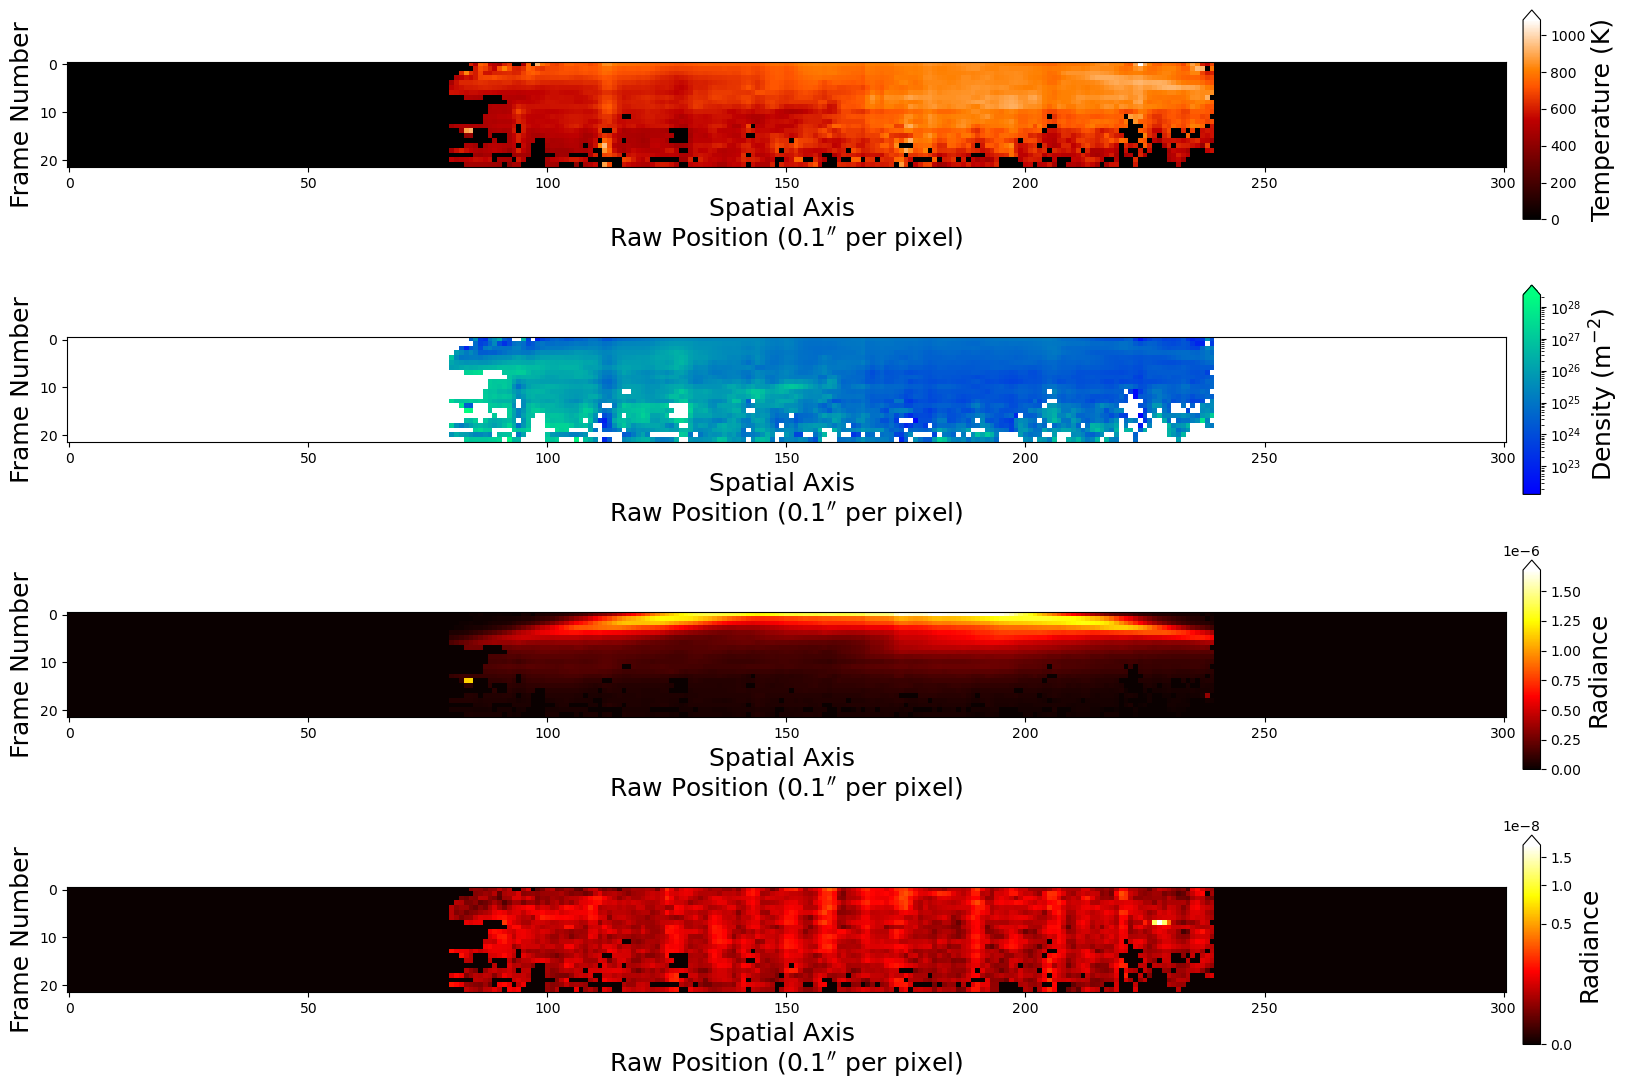

In [19]:
fig = plt.figure(figsize=(18, 11), tight_layout=True)

fig.add_subplot(411)
plt.imshow(h2_temperature_2, cmap="gist_heat", norm=colors.PowerNorm(gamma=1))
plt.xlabel("Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)", fontsize=18)
plt.ylabel("Frame Number", fontsize=18)
# plt.title('a) H$_3^{+}$ - tempensity', loc='left', fontsize=18)
plt.colorbar(extend="max", aspect=12, pad=0.01).set_label(label="Temperature (K)", size=18)

fig.add_subplot(412)
plt.imshow(h2_density_2, cmap="winter", norm=colors.LogNorm())
plt.xlabel("Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)", fontsize=18)
plt.ylabel("Frame Number", fontsize=18)
# plt.title('a) H$_3^{+}$ - tempensity', loc='left', fontsize=18)
plt.colorbar(extend="max", aspect=12, pad=0.01).set_label(label="Density (m$^{-2}$)", size=18)

fig.add_subplot(413)
plt.imshow(h2_radiance_2, cmap="hot", norm=colors.PowerNorm(gamma=1))
plt.xlabel("Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)", fontsize=18)
plt.ylabel("Frame Number", fontsize=18)
# plt.title('a) H$_3^{+}$ - tempensity', loc='left', fontsize=18)
plt.colorbar(extend="max", aspect=12, pad=0.01).set_label(label="Radiance", size=18)

fig.add_subplot(414)
plt.imshow(h2_radiance_errs_2, cmap="hot", norm=colors.PowerNorm(gamma=0.4))
plt.xlabel("Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)", fontsize=18)
plt.ylabel("Frame Number", fontsize=18)
# plt.title('a) H$_3^{+}$ - tempensity', loc='left', fontsize=18)
plt.colorbar(extend="max", aspect=12, pad=0.01).set_label(label="Radiance", size=18)

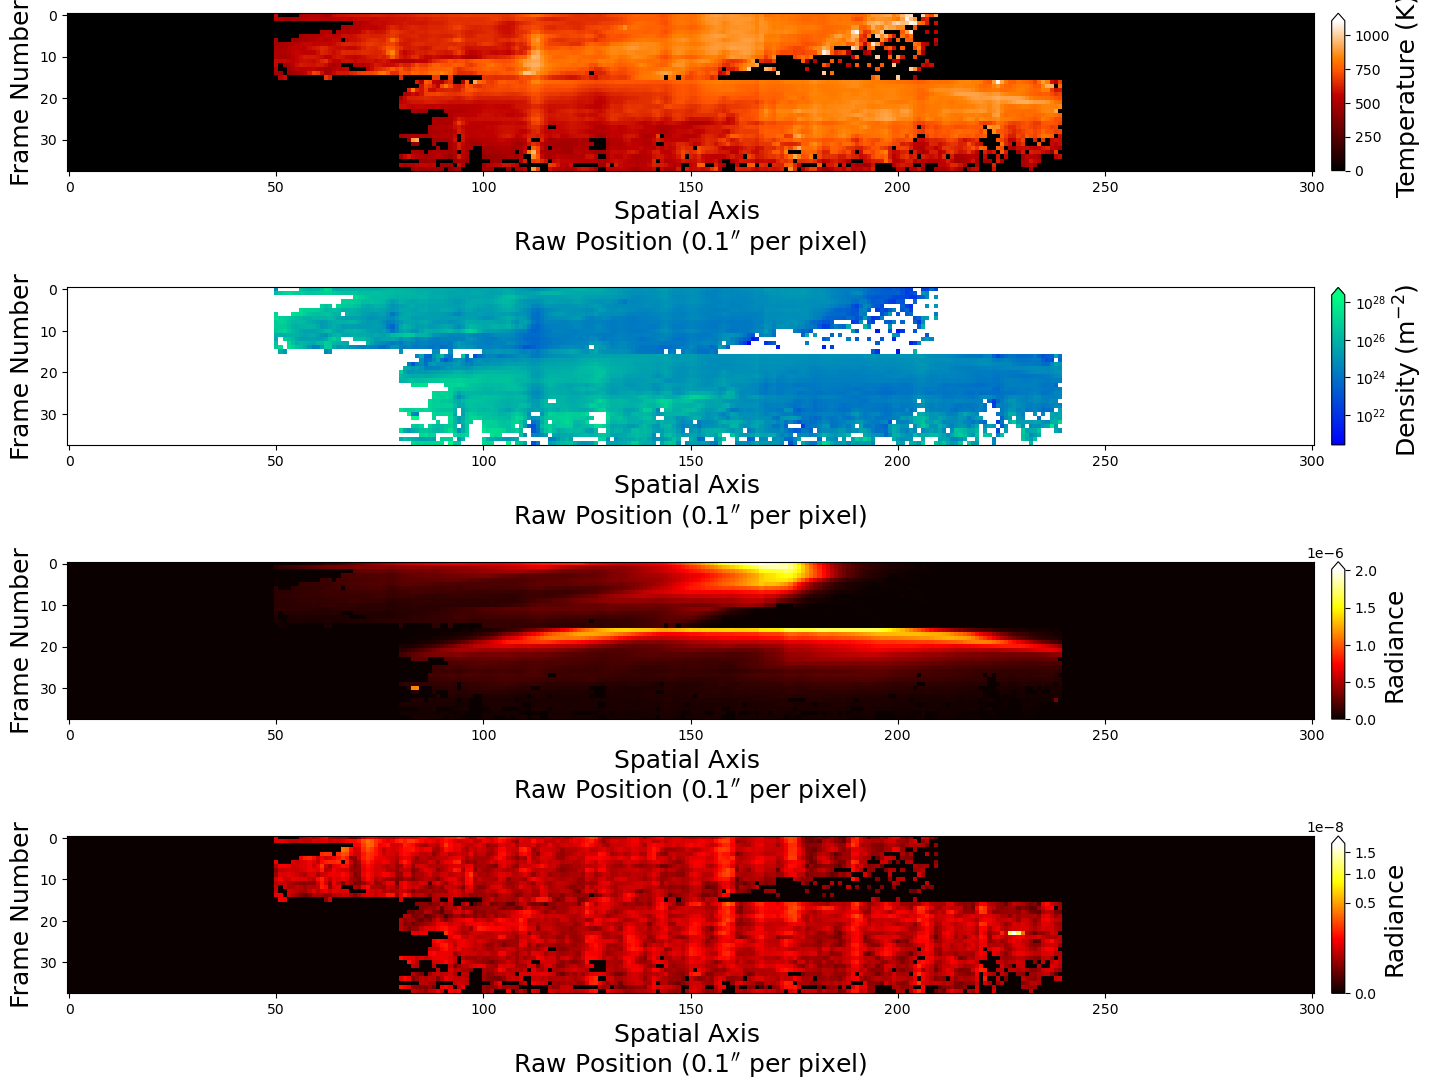

In [20]:
h2_temperature = np.vstack((h2_temperature_1, h2_temperature_2))
h2_density = np.vstack((h2_density_1, h2_density_2))
h2_radiance = np.vstack((h2_radiance_1, h2_radiance_2))
h2_temperature_errs = np.vstack((h2_temperature_errs_1, h2_temperature_errs_2))
h2_density_errs = np.vstack((h2_density_errs_1, h2_density_errs_2))
h2_radiance_errs = np.vstack((h2_radiance_errs_1, h2_radiance_errs_2))

fig = plt.figure(figsize=(18, 11), tight_layout=True)

fig.add_subplot(411)
plt.imshow(h2_temperature, cmap="gist_heat", norm=colors.PowerNorm(gamma=1))
plt.xlabel("Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)", fontsize=18)
plt.ylabel("Frame Number", fontsize=18)
# plt.title('a) H$_3^{+}$ - tempensity', loc='left', fontsize=18)
plt.colorbar(extend="max", aspect=12, pad=0.01).set_label(label="Temperature (K)", size=18)

fig.add_subplot(412)
plt.imshow(h2_density, cmap="winter", norm=colors.LogNorm())
plt.xlabel("Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)", fontsize=18)
plt.ylabel("Frame Number", fontsize=18)
# plt.title('a) H$_3^{+}$ - tempensity', loc='left', fontsize=18)
plt.colorbar(extend="max", aspect=12, pad=0.01).set_label(label="Density (m$^{-2}$)", size=18)

fig.add_subplot(413)
plt.imshow(h2_radiance, cmap="hot", norm=colors.PowerNorm(gamma=1))
plt.xlabel("Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)", fontsize=18)
plt.ylabel("Frame Number", fontsize=18)
# plt.title('a) H$_3^{+}$ - tempensity', loc='left', fontsize=18)
plt.colorbar(extend="max", aspect=12, pad=0.01).set_label(label="Radiance", size=18)

fig.add_subplot(414)
plt.imshow(h2_radiance_errs, cmap="hot", norm=colors.PowerNorm(gamma=0.4))
plt.xlabel("Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)", fontsize=18)
plt.ylabel("Frame Number", fontsize=18)
# plt.title('a) H$_3^{+}$ - tempensity', loc='left', fontsize=18)
plt.colorbar(extend="max", aspect=12, pad=0.01).set_label(label="Radiance", size=18)

In [21]:
h2_dens = h2_density.copy()
h2_dens_errs = h2_density_errs.copy()

h2_temp = h2_temperature.copy()
h2_temp_errs = h2_temperature_errs.copy()

h2_rad = h2_radiance.copy()
h2_rad_errs = h2_radiance_errs.copy()

# h2 dens
h2_dens1 = np.roll(h2_dens[:6], 23, axis=1)
h2_dens2 = np.roll(h2_dens[6:11], 22, axis=1)
h2_dens3 = np.roll(h2_dens[11:16], 30, axis=1)
h2_dens4 = np.roll(h2_dens[16:27], -14, axis=1)
h2_dens5 = np.roll(h2_dens[27:], -14, axis=1)

h2_dens_shifted = np.vstack((h2_dens1, h2_dens2, h2_dens3, h2_dens4, h2_dens5))

for i in range(16):
    h2_dens_shifted[i, :] = scipy.ndimage.shift(h2_dens_shifted[i, :], i * 6, order=5)

h2_dens_flipped = np.flip(h2_dens_shifted, axis=1)

# h2 dens errs
h2_dens_errs1 = np.roll(h2_dens_errs[:6], 23, axis=1)
h2_dens_errs2 = np.roll(h2_dens_errs[6:11], 22, axis=1)
h2_dens_errs3 = np.roll(h2_dens_errs[11:16], 30, axis=1)
h2_dens_errs4 = np.roll(h2_dens_errs[16:27], -14, axis=1)
h2_dens_errs5 = np.roll(h2_dens_errs[27:], -14, axis=1)

h2_dens_errs_shifted = np.vstack((h2_dens_errs1, h2_dens_errs2, h2_dens_errs3, h2_dens_errs4, h2_dens_errs5))

for i in range(16):
    h2_dens_errs_shifted[i, :] = scipy.ndimage.shift(h2_dens_errs_shifted[i, :], i * 6, order=5)

h2_dens_errs_flipped = np.flip(h2_dens_errs_shifted, axis=1)

# h2 temp
h2_temp1 = np.roll(h2_temp[:6], 23, axis=1)
h2_temp2 = np.roll(h2_temp[6:11], 22, axis=1)
h2_temp3 = np.roll(h2_temp[11:16], 30, axis=1)
h2_temp4 = np.roll(h2_temp[16:27], -14, axis=1)
h2_temp5 = np.roll(h2_temp[27:], -14, axis=1)

h2_temp_shifted = np.vstack((h2_temp1, h2_temp2, h2_temp3, h2_temp4, h2_temp5))

for i in range(16):
    h2_temp_shifted[i, :] = scipy.ndimage.shift(h2_temp_shifted[i, :], i * 6, order=5)

h2_temp_flipped = np.flip(h2_temp_shifted, axis=1)

# h2 temp errs
h2_temp_errs1 = np.roll(h2_temp_errs[:6], 23, axis=1)
h2_temp_errs2 = np.roll(h2_temp_errs[6:11], 22, axis=1)
h2_temp_errs3 = np.roll(h2_temp_errs[11:16], 30, axis=1)
h2_temp_errs4 = np.roll(h2_temp_errs[16:27], -14, axis=1)
h2_temp_errs5 = np.roll(h2_temp_errs[27:], -14, axis=1)

h2_temp_errs_shifted = np.vstack((h2_temp_errs1, h2_temp_errs2, h2_temp_errs3, h2_temp_errs4, h2_temp_errs5))

for i in range(16):
    h2_temp_errs_shifted[i, :] = scipy.ndimage.shift(h2_temp_errs_shifted[i, :], i * 6, order=5)

h2_temp_errs_flipped = np.flip(h2_temp_errs_shifted, axis=1)

# h2 rad
h2_rad1 = np.roll(h2_rad[:6], 23, axis=1)
h2_rad2 = np.roll(h2_rad[6:11], 22, axis=1)
h2_rad3 = np.roll(h2_rad[11:16], 30, axis=1)
h2_rad4 = np.roll(h2_rad[16:27], -14, axis=1)
h2_rad5 = np.roll(h2_rad[27:], -14, axis=1)

h2_rad_shifted = np.vstack((h2_rad1, h2_rad2, h2_rad3, h2_rad4, h2_rad5))

for i in range(16):
    h2_rad_shifted[i, :] = scipy.ndimage.shift(h2_rad_shifted[i, :], i * 6, order=5)

h2_rad_flipped = np.flip(h2_rad_shifted, axis=1)

# h2 rad errs
h2_rad_errs1 = np.roll(h2_rad_errs[:6], 23, axis=1)
h2_rad_errs2 = np.roll(h2_rad_errs[6:11], 22, axis=1)
h2_rad_errs3 = np.roll(h2_rad_errs[11:16], 30, axis=1)
h2_rad_errs4 = np.roll(h2_rad_errs[16:27], -14, axis=1)
h2_rad_errs5 = np.roll(h2_rad_errs[27:], -14, axis=1)

h2_rad_errs_shifted = np.vstack((h2_rad_errs1, h2_rad_errs2, h2_rad_errs3, h2_rad_errs4, h2_rad_errs5))

for i in range(16):
    h2_rad_errs_shifted[i, :] = scipy.ndimage.shift(h2_rad_errs_shifted[i, :], i * 6, order=5)

h2_rad_errs_flipped = np.flip(h2_rad_errs_shifted, axis=1)


h2_dens_errs_flipped[h2_dens_errs_flipped > 1e28] = np.nan
h2_dens_errs_flipped[h2_dens_errs_flipped < 1e20] = np.nan
h2_dens_flipped[np.isnan(h2_dens_errs_flipped)] = np.nan

h2_temp_errs_flipped[h2_temp_errs_flipped > 400] = np.nan
h2_temp_errs_flipped[h2_temp_errs_flipped < 1] = np.nan
h2_temp_flipped[np.isnan(h2_temp_errs_flipped)] = np.nan

h2_rad_errs_flipped[h2_rad_errs_flipped > 1e-1] = np.nan
h2_rad_errs_flipped[h2_rad_errs_flipped < 1e-13] = np.nan
h2_rad_flipped[np.isnan(h2_rad_errs_flipped)] = np.nan

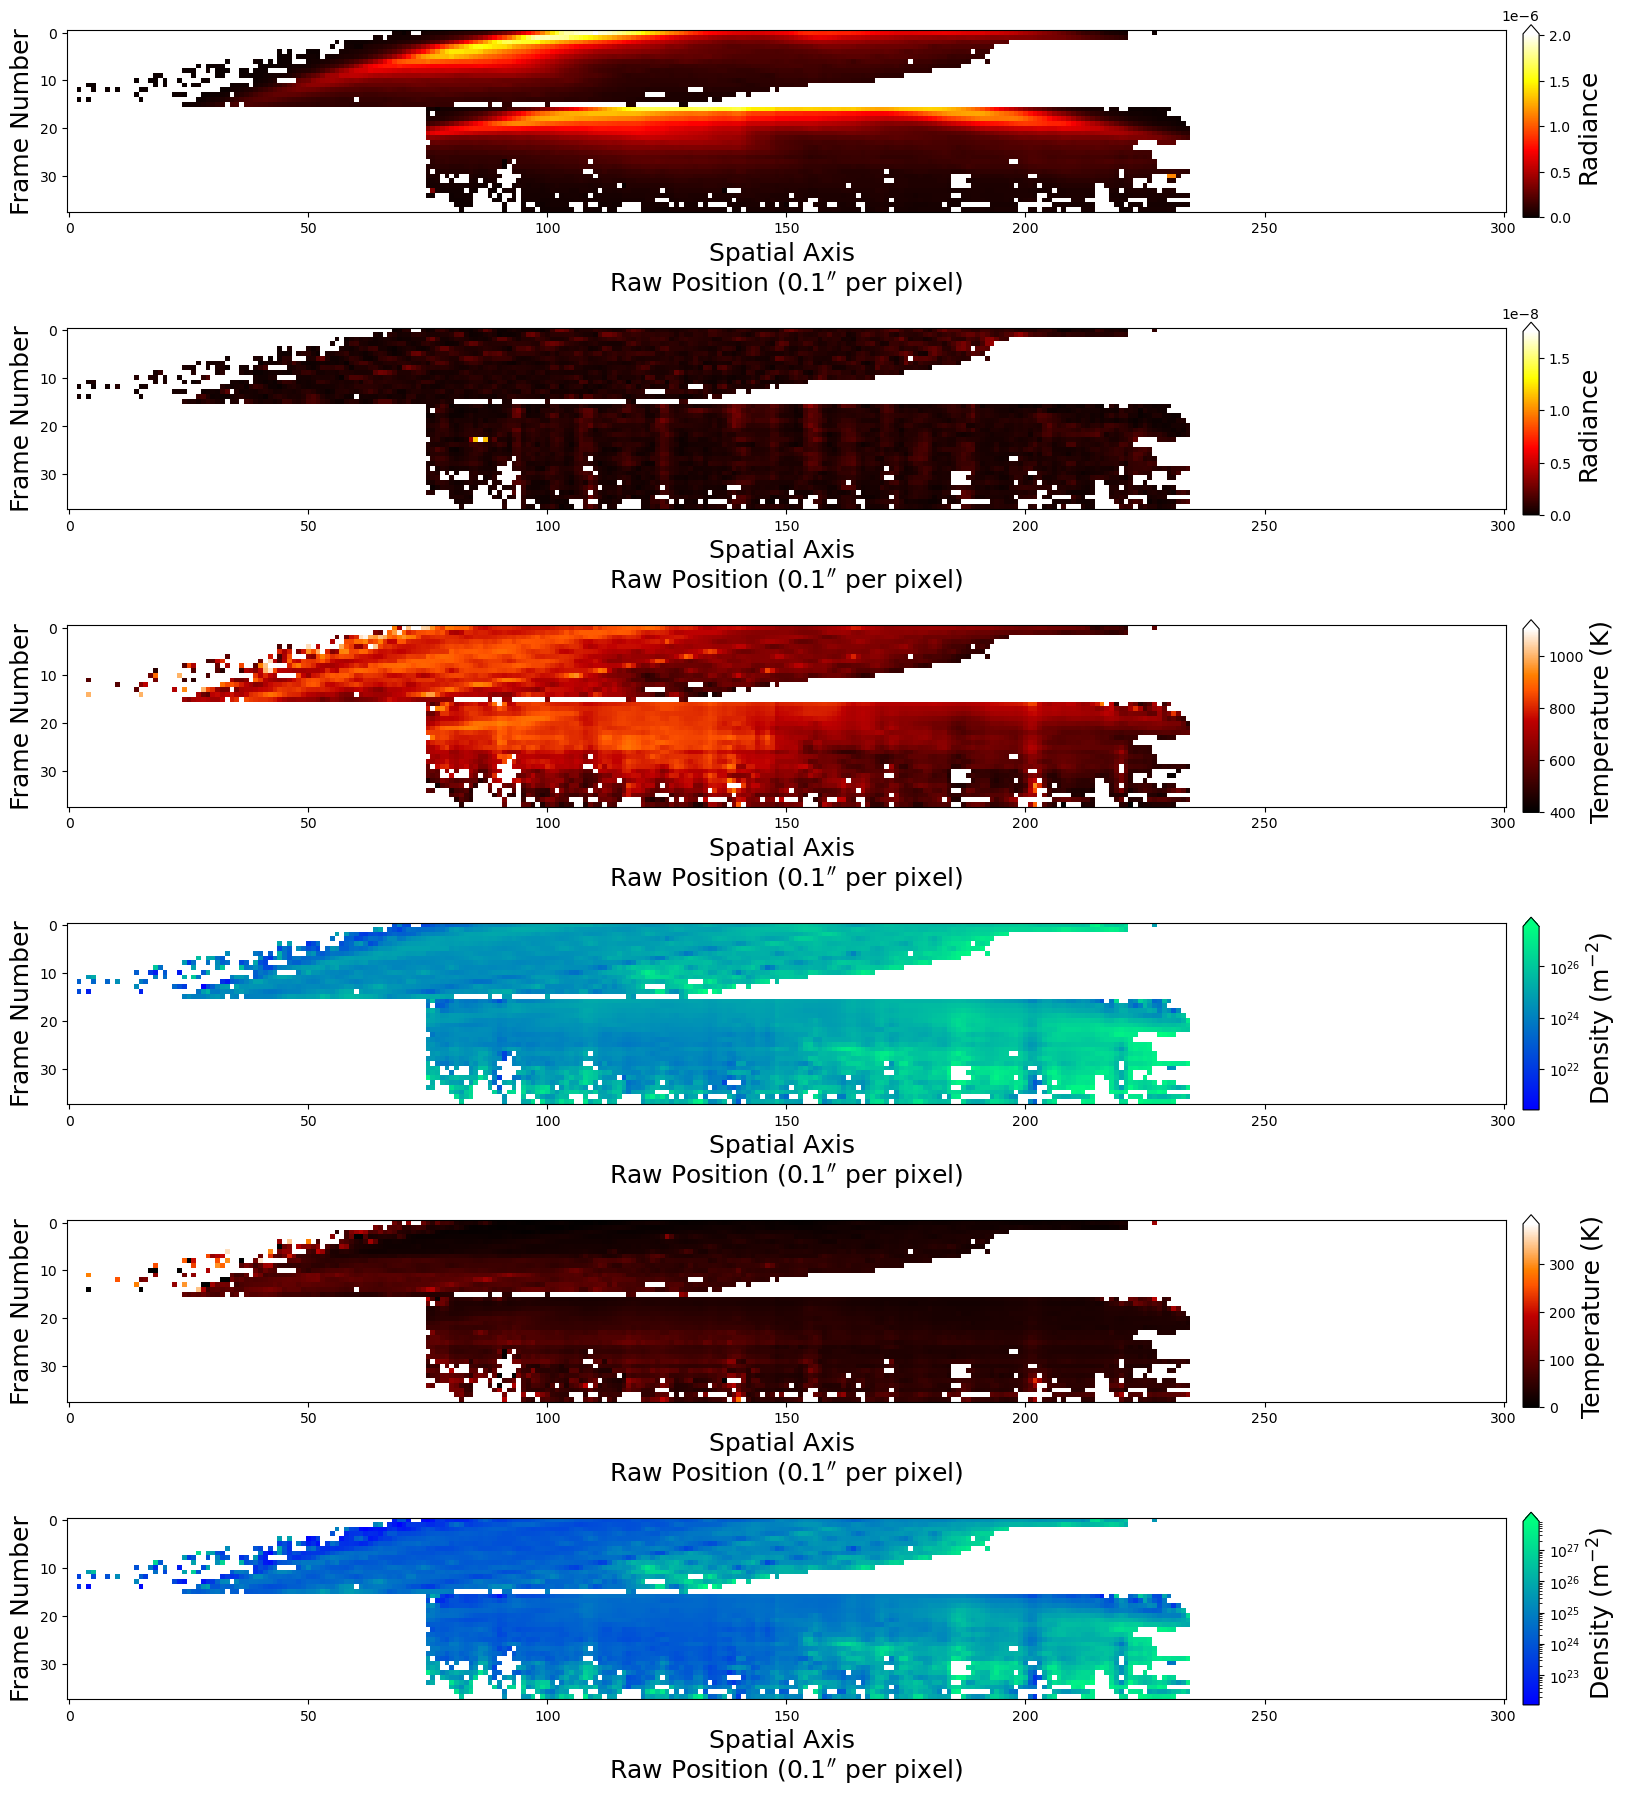

In [23]:
fig = plt.figure(figsize=(18, 18), tight_layout=True)

fig.add_subplot(611)
plt.imshow(h2_rad_flipped, cmap="hot", norm=colors.PowerNorm(gamma=1))
plt.xlabel("Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)", fontsize=18)
plt.ylabel("Frame Number", fontsize=18)
# plt.title('a) H$_3^{+}$ - tempensity', loc='left', fontsize=18)
plt.colorbar(extend="max", aspect=12, pad=0.01).set_label(label="Radiance", size=18)

fig.add_subplot(612)
plt.imshow(h2_rad_errs_flipped, cmap="hot", norm=colors.PowerNorm(gamma=1))
plt.xlabel("Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)", fontsize=18)
plt.ylabel("Frame Number", fontsize=18)
# plt.title('a) H$_3^{+}$ - tempensity', loc='left', fontsize=18)
plt.colorbar(extend="max", aspect=12, pad=0.01).set_label(label="Radiance", size=18)

fig.add_subplot(613)
plt.imshow(h2_temp_flipped, cmap="gist_heat", norm=colors.PowerNorm(gamma=1))
plt.xlabel("Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)", fontsize=18)
plt.ylabel("Frame Number", fontsize=18)
# plt.title('a) H$_3^{+}$ - tempensity', loc='left', fontsize=18)
plt.colorbar(extend="max", aspect=12, pad=0.01).set_label(label="Temperature (K)", size=18)

fig.add_subplot(614)
plt.imshow(h2_dens_flipped, cmap="winter", norm=colors.LogNorm())
plt.xlabel("Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)", fontsize=18)
plt.ylabel("Frame Number", fontsize=18)
# plt.title('a) H$_3^{+}$ - tempensity', loc='left', fontsize=18)
plt.colorbar(extend="max", aspect=12, pad=0.01).set_label(label="Density (m$^{-2}$)", size=18)

fig.add_subplot(615)
plt.imshow(h2_temp_errs_flipped, cmap="gist_heat", norm=colors.PowerNorm(gamma=1))
plt.xlabel("Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)", fontsize=18)
plt.ylabel("Frame Number", fontsize=18)
# plt.title('a) H$_3^{+}$ - tempensity', loc='left', fontsize=18)
plt.colorbar(extend="max", aspect=12, pad=0.01).set_label(label="Temperature (K)", size=18)

fig.add_subplot(616)
plt.imshow(h2_dens_errs_flipped, cmap="winter", norm=colors.LogNorm())
plt.xlabel("Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)", fontsize=18)
plt.ylabel("Frame Number", fontsize=18)
# plt.title('a) H$_3^{+}$ - tempensity', loc='left', fontsize=18)
plt.colorbar(extend="max", aspect=12, pad=0.01).set_label(label="Density (m$^{-2}$)", size=18)

In [26]:
hdu1 = fits.PrimaryHDU(h2_dens_flipped)
hdu1.writeto("h2_dens_v2.fits", overwrite=True)

hdu2 = fits.PrimaryHDU(h2_temp_flipped)
hdu2.writeto("h2_temp_v2.fits", overwrite=True)

hdu3 = fits.PrimaryHDU(h2_dens_errs_flipped)
hdu3.writeto("h2_dens_errs_v2.fits", overwrite=True)

hdu4 = fits.PrimaryHDU(h2_temp_errs_flipped)
hdu4.writeto("h2_temp_errs_v2.fits", overwrite=True)

hdu5 = fits.PrimaryHDU(h2_rad_flipped)
hdu5.writeto("h2_radiance_v2.fits", overwrite=True)

hdu6 = fits.PrimaryHDU(h2_rad_errs_flipped)
hdu6.writeto("h2_radiance_errs_v2.fits", overwrite=True)